In [1]:
import os
import copy
import numpy as np
import pandas as pd
import scipy
import seaborn as sns
import matplotlib.pyplot as plt 

from dekef.base_density import *


import matplotlib.gridspec as gridspec

# from IFlogdensity.contam_sm_de import *
# from IFlogdensity.influence_function_sm_de import *
# from IFlogdensity.calibrate import *

from IPython.display import Markdown as md

In [2]:
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')
true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)

# original data with 108.0 removed
data_waiting = (df[df != 108.0]).reshape(-1, 1)

base_density = BasedenGamma(data_waiting)

In [12]:
r1 = 1. 
r2 = 0.
c = 0.

basisn = 205
bw = 5.0
log_pen_param_ml = -12.0
contam_weight = 0.01
kernel_type = 'gaussian_poly2'
plot_domain = (1.0, 410.0)
plot_pts_cnt = 3000
step_size = 1.0
abstol = 0.015
seed = 0
grid_points_ml = np.arange(1., 411., 2).reshape(-1, 1)

contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)

In [56]:
save_dir_ml = (f'data/ConstrainedML-basisn={basisn}-bw={bw}-kernel={kernel_type}-' +
               f'loglambda={log_pen_param_ml}-contamweight={contam_weight}-plotdomain={plot_domain}-' + 
               f'plotcnts={plot_pts_cnt}-oriabstol={abstol}-oristepsize={step_size}-seed={seed}-start_t_val=10000.0')

save_dir_sm = (f'data/CalibratedSM-ConstrainedML-' +
               f'basisn={basisn}-bw={bw}-kernel={kernel_type}-' +
               f'loglambda={log_pen_param_ml}-contamweight={contam_weight}-plotdomain={plot_domain}-' +
               f'plotcnts={plot_pts_cnt}-oriabstol={abstol}-oristepsize={step_size}-seed={seed}')

supnorm_dict = {'bw': [bw] * len(contam_data_list), 
                'logpen_ml': [log_pen_param_ml] * len(contam_data_list), 
                'contam_data': contam_data_list.flatten(), 
                'infsup_ml': [], 
                'infsup_sm': []}

for contam_data in contam_data_list:     
    
    print('*' *50)
    print(contam_data)
    # read in the ML influence function values 
    inf_fun_ml = np.load(save_dir_ml + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    inf_fun_sm = np.load(save_dir_sm + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    
    supnorm_dict['infsup_ml'].append(np.max(np.abs(inf_fun_ml)))
    supnorm_dict['infsup_sm'].append(np.max(np.abs(inf_fun_sm)))

**************************************************
[2.]
**************************************************
[6.]
**************************************************
[10.]
**************************************************
[14.]
**************************************************
[18.]
**************************************************
[22.]
**************************************************
[26.]
**************************************************
[30.]
**************************************************
[34.]
**************************************************
[38.]
**************************************************
[42.]
**************************************************
[46.]
**************************************************
[50.]
**************************************************
[54.]
**************************************************
[58.]
**************************************************
[62.]
**************************************************
[66.]
*********************************

**************************************************
[2.]


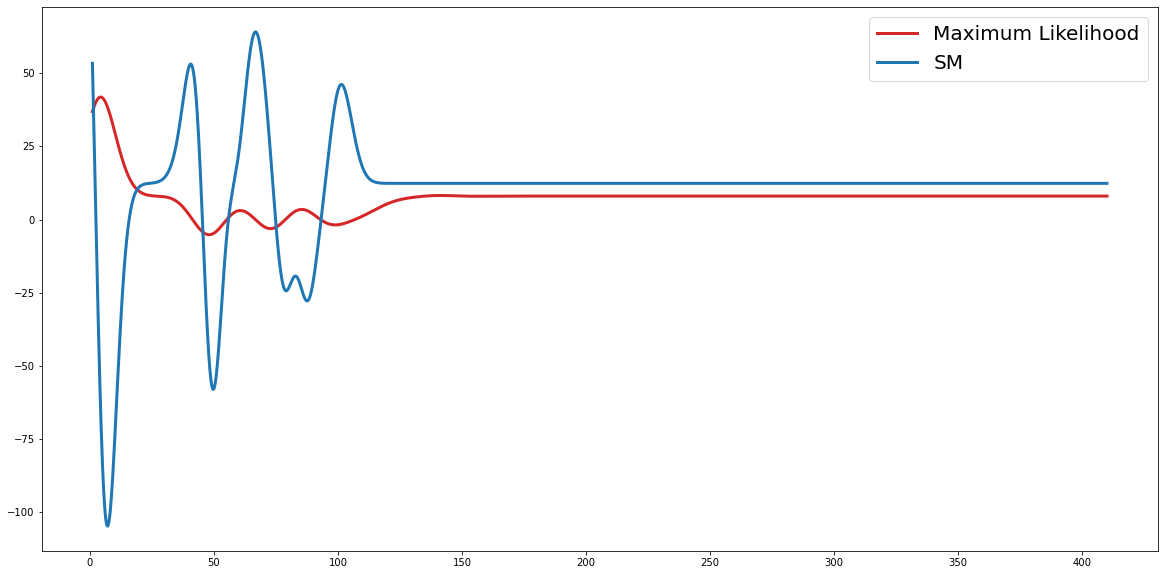

**************************************************
[6.]


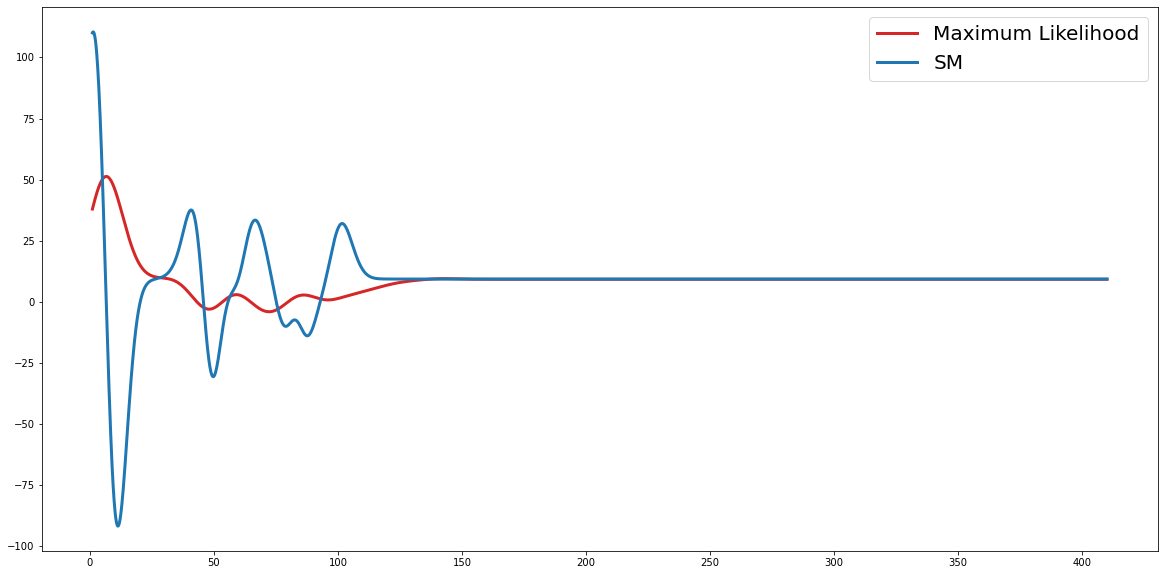

**************************************************
[10.]


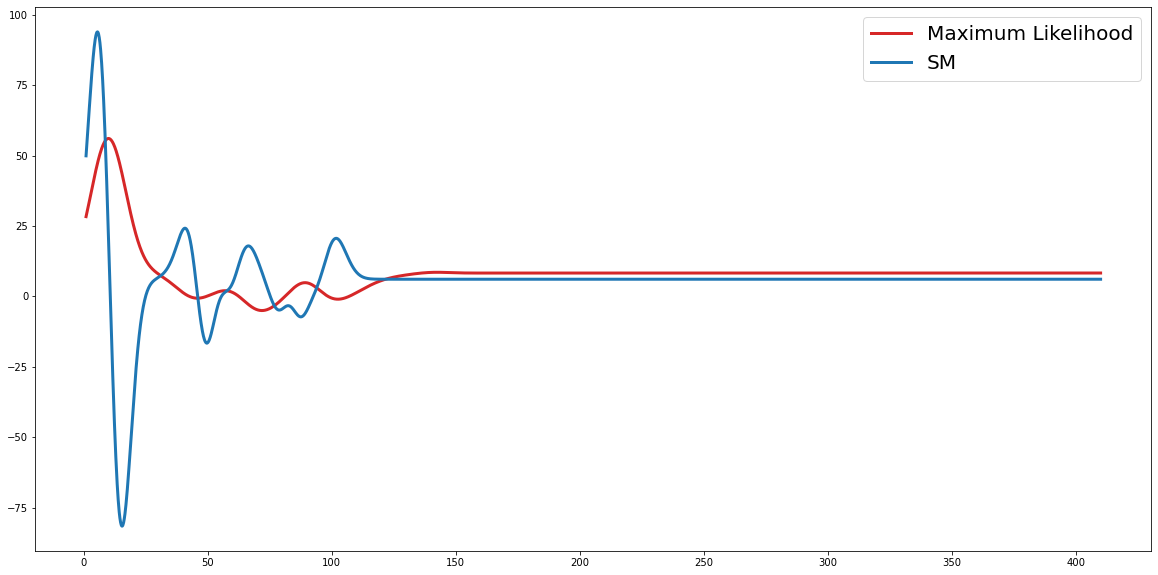

**************************************************
[14.]


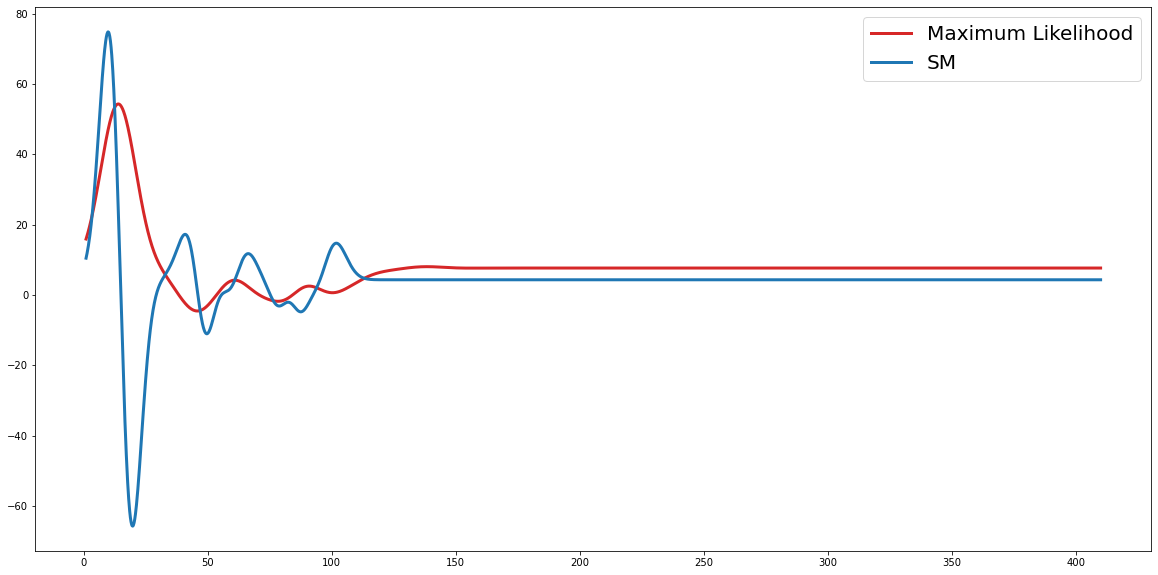

**************************************************
[18.]


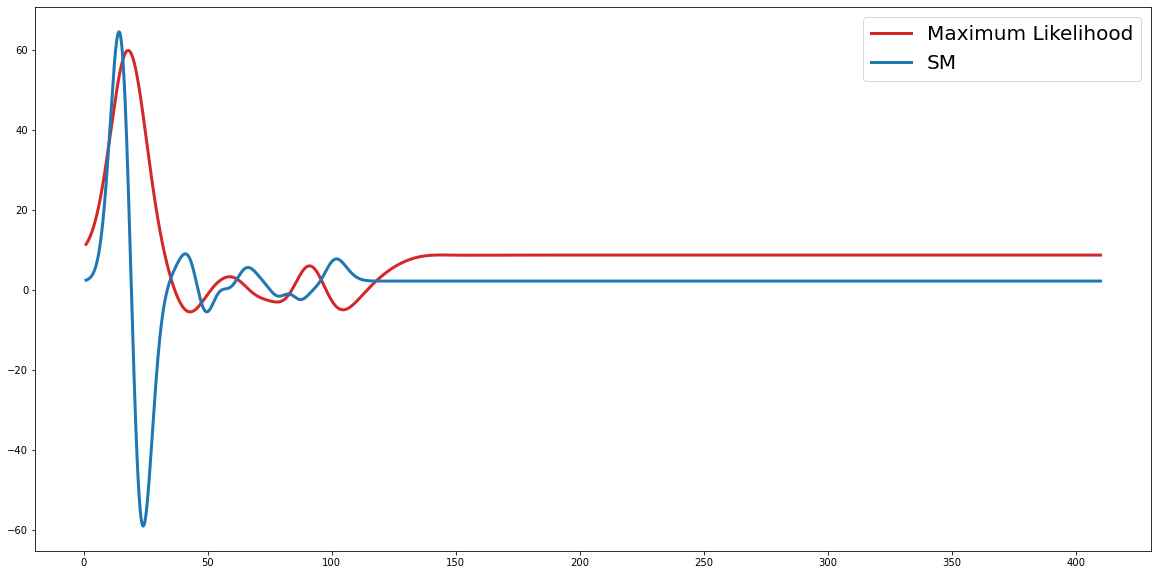

**************************************************
[22.]


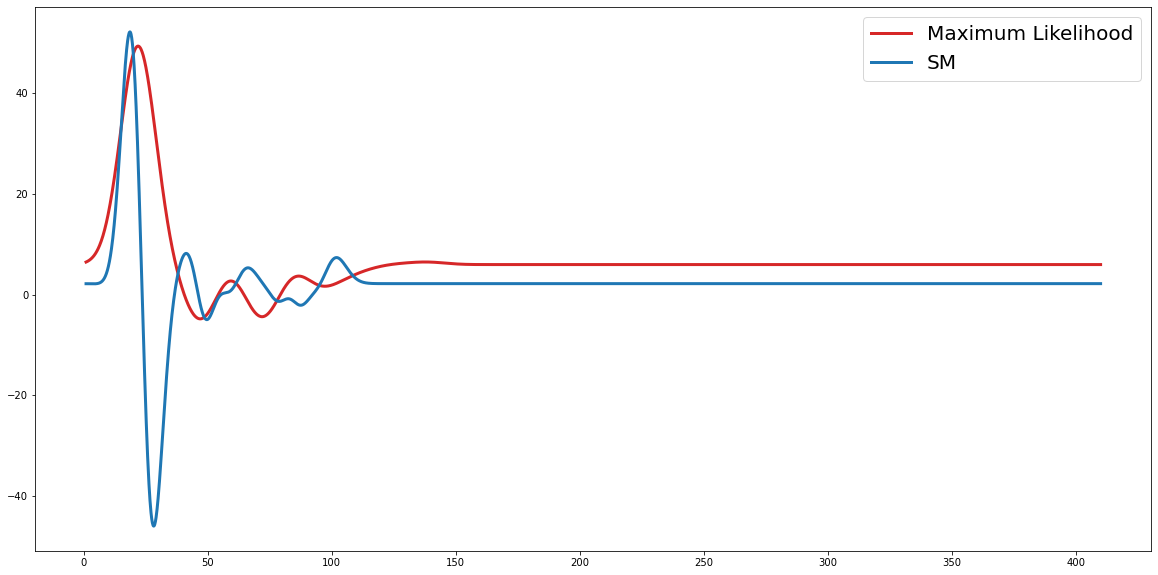

**************************************************
[26.]


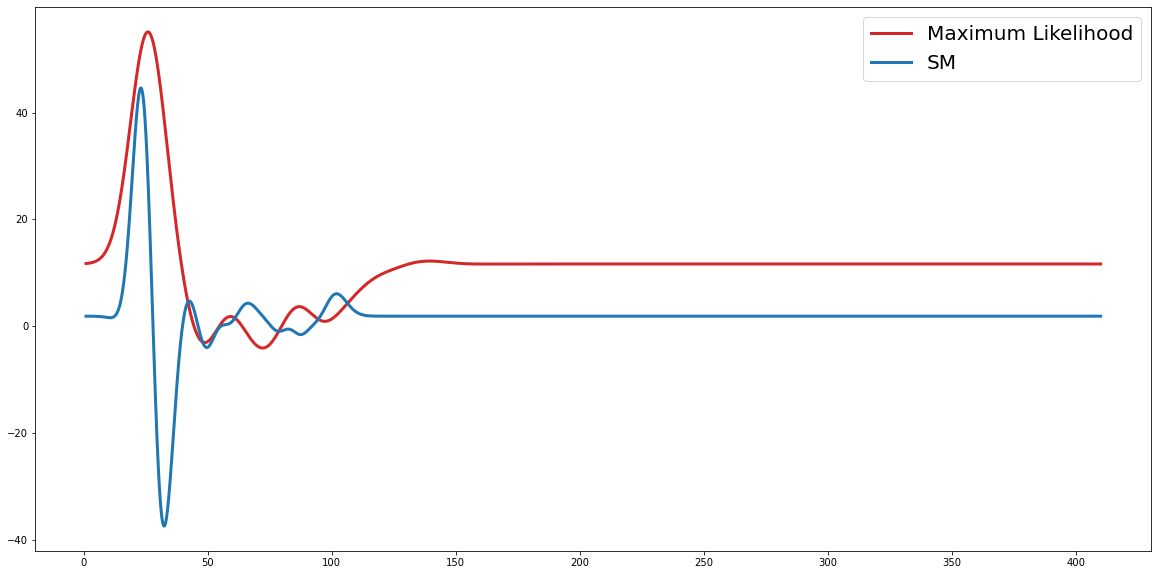

**************************************************
[30.]


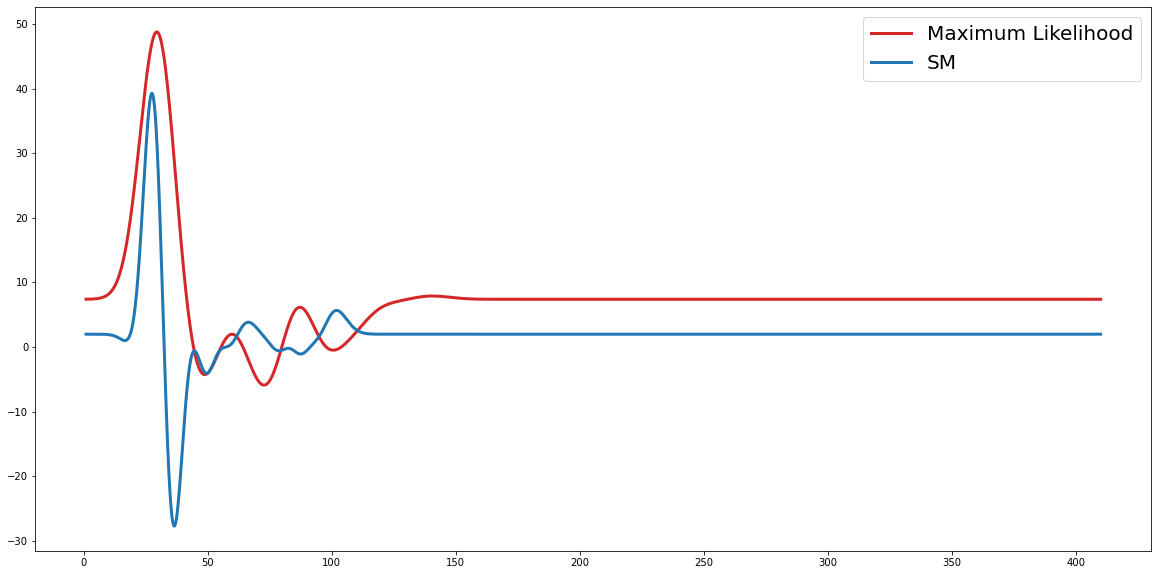

**************************************************
[34.]


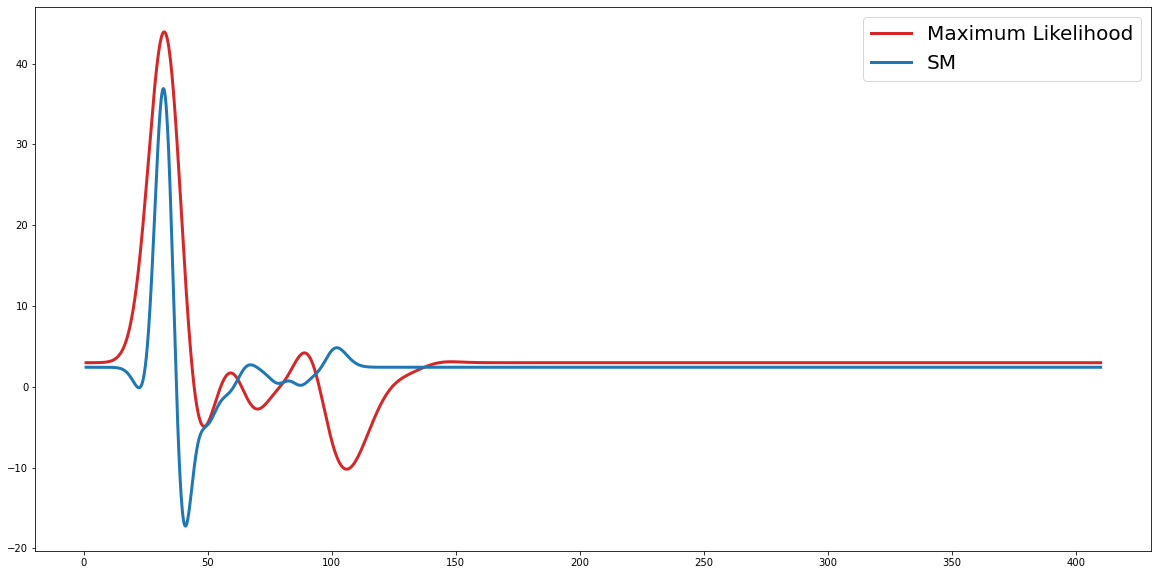

**************************************************
[38.]


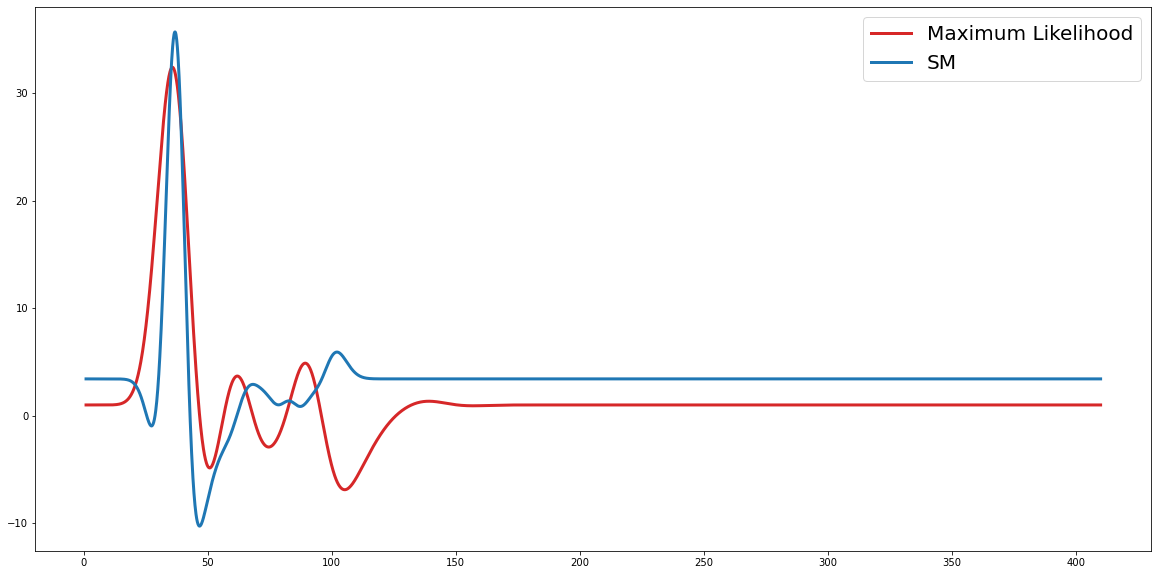

**************************************************
[42.]


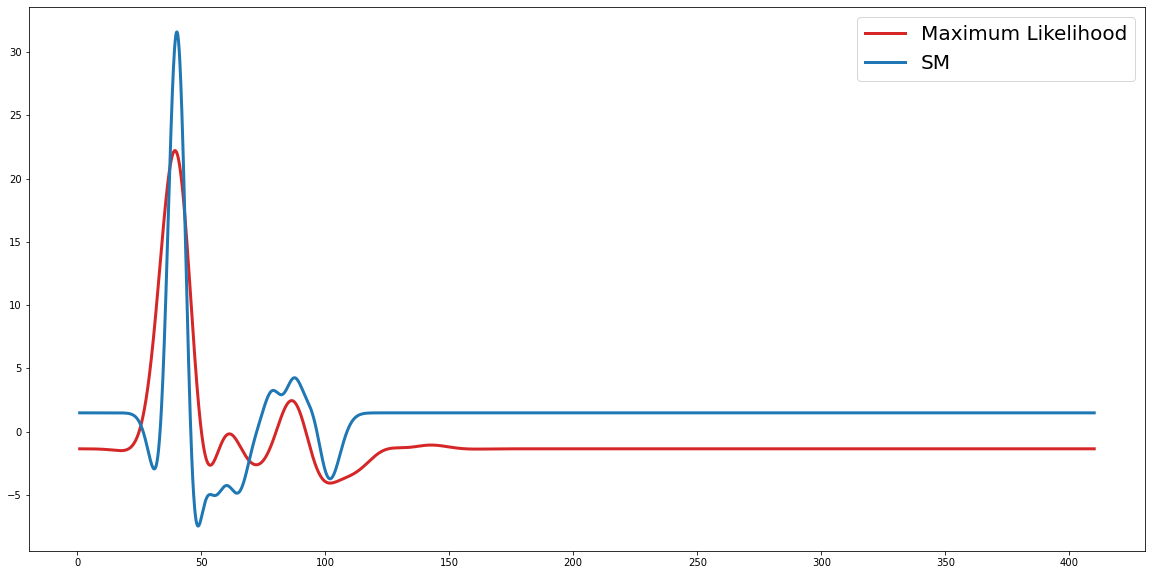

**************************************************
[46.]


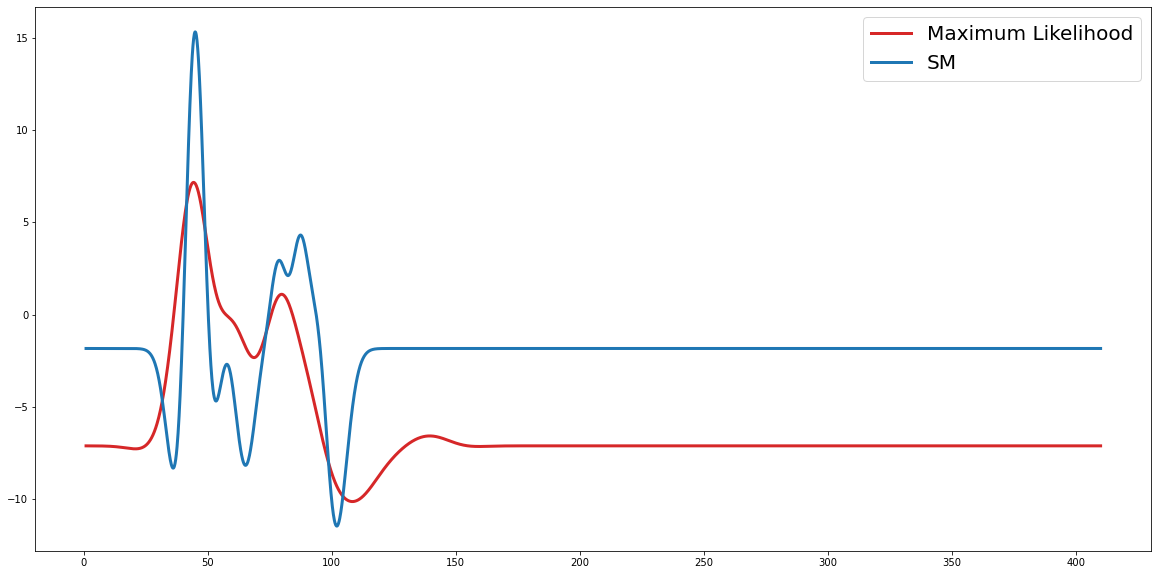

**************************************************
[50.]


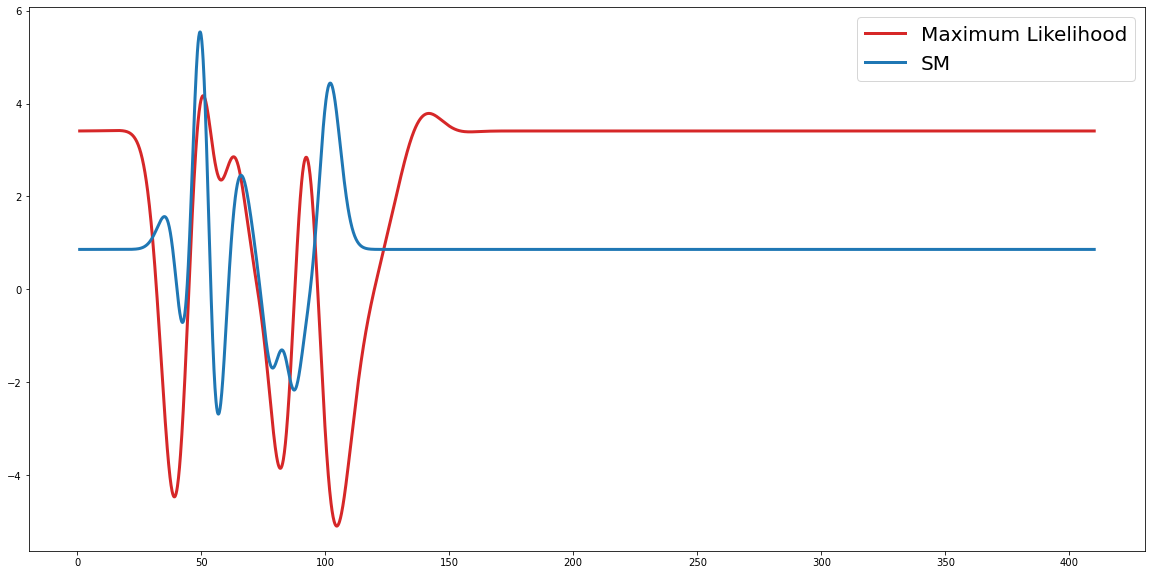

**************************************************
[54.]


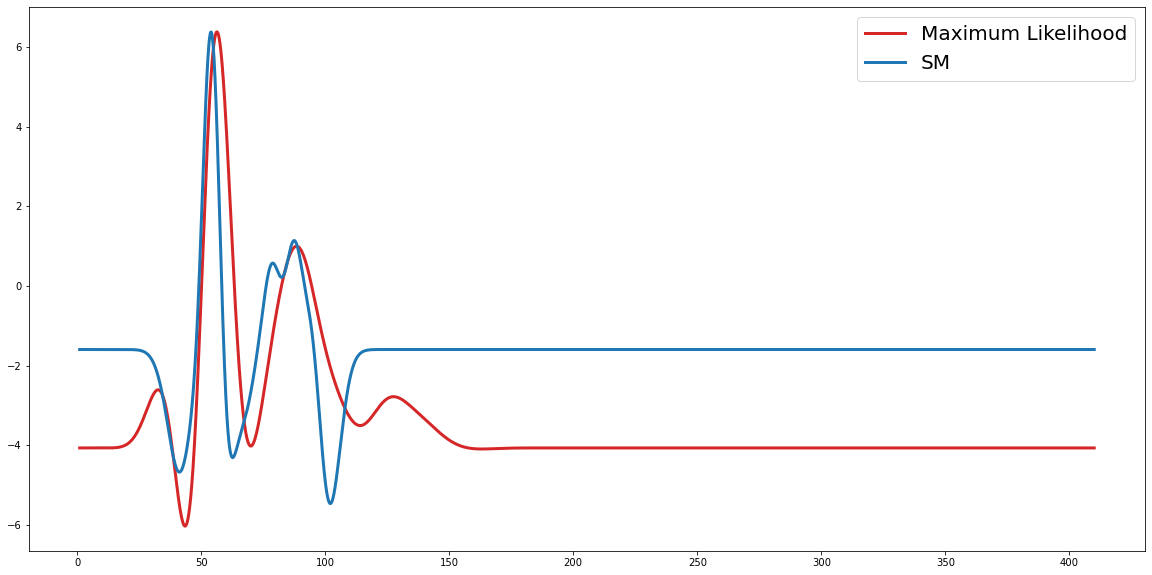

**************************************************
[58.]


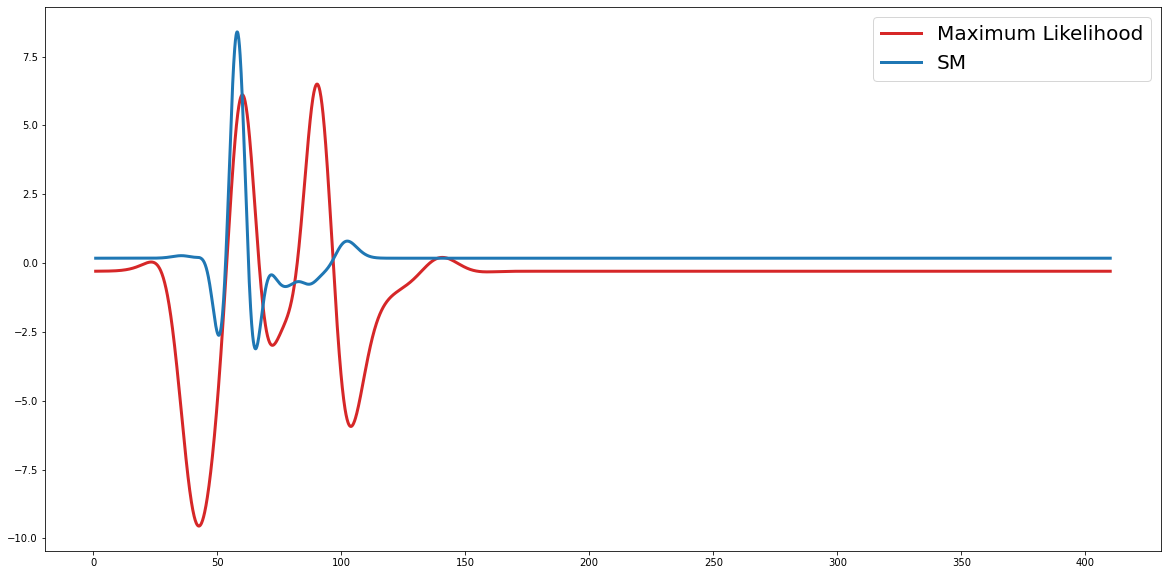

**************************************************
[62.]


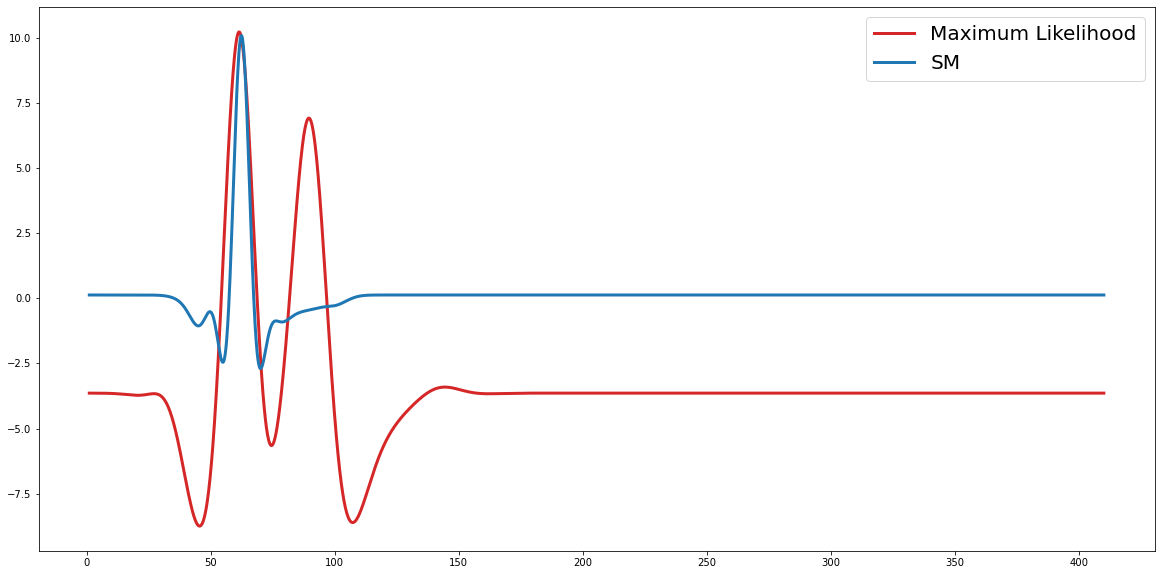

**************************************************
[66.]


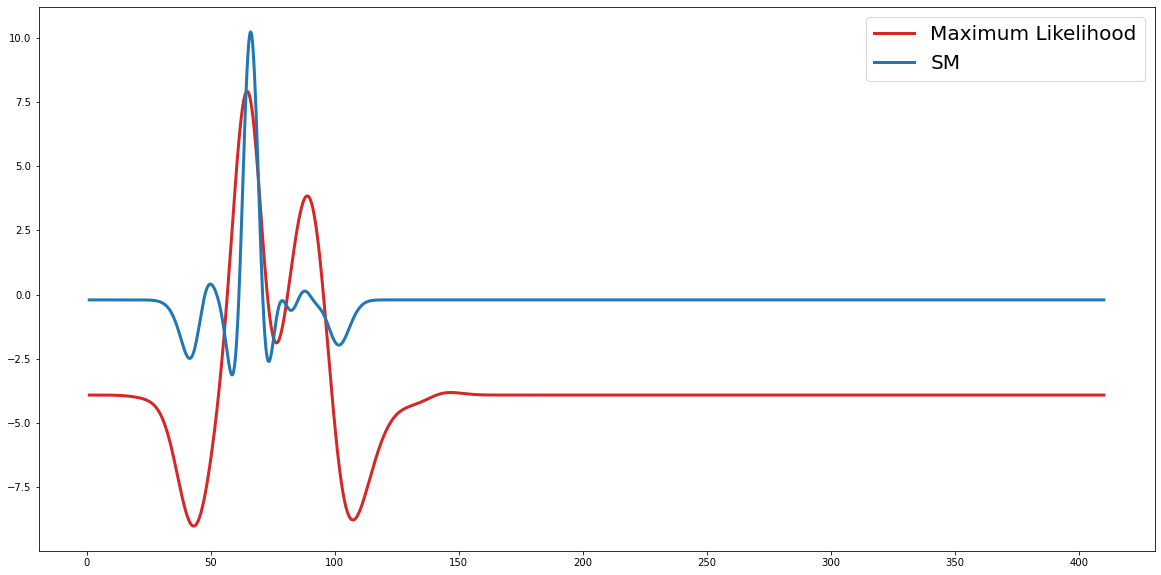

**************************************************
[70.]


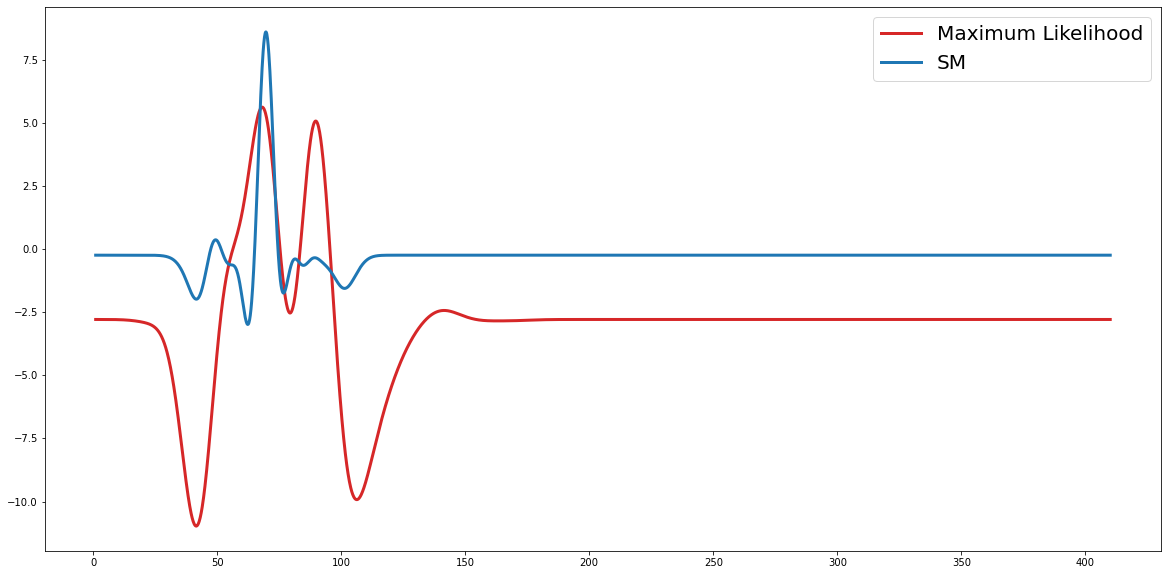

**************************************************
[74.]


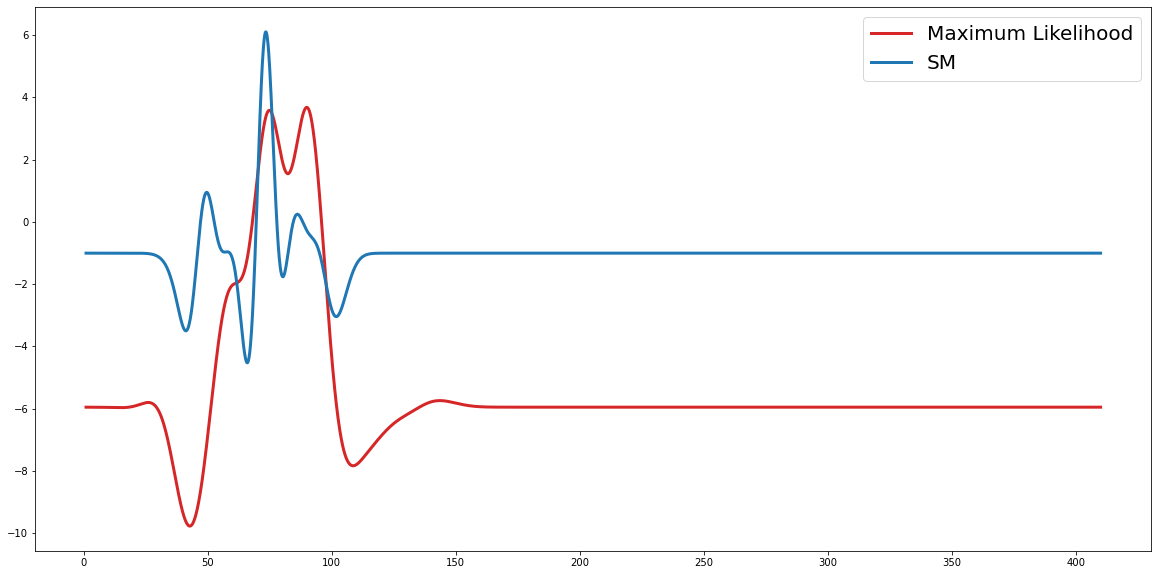

**************************************************
[78.]


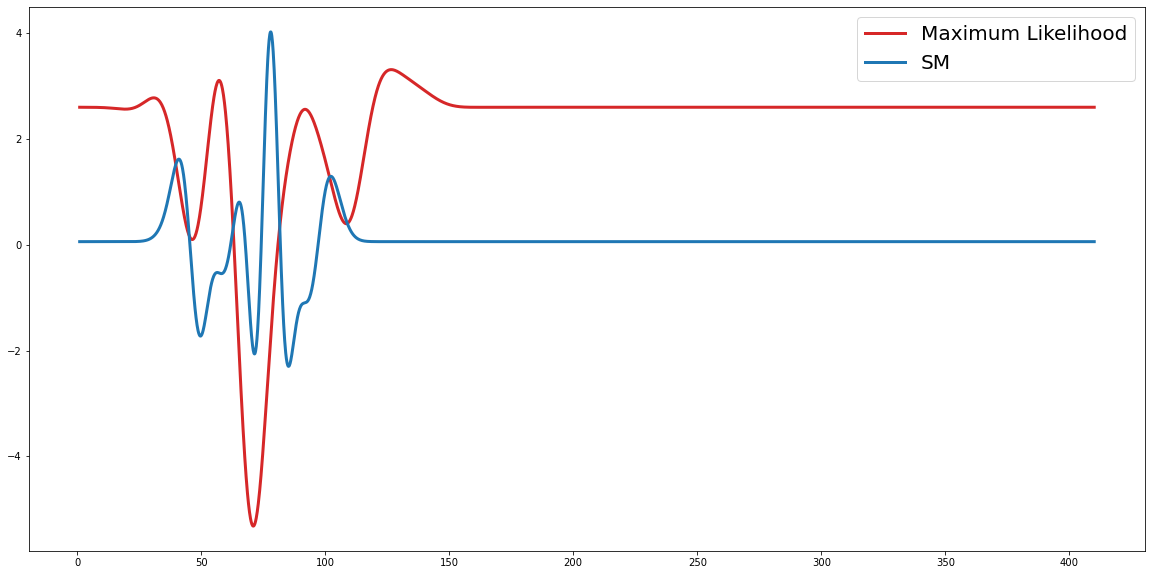

**************************************************
[82.]


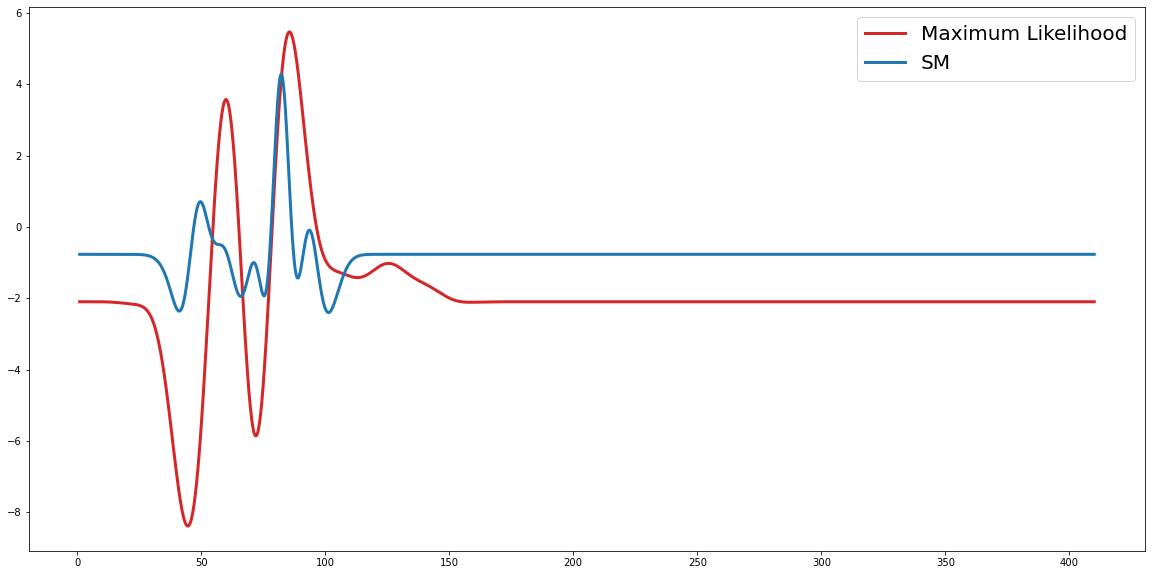

**************************************************
[86.]


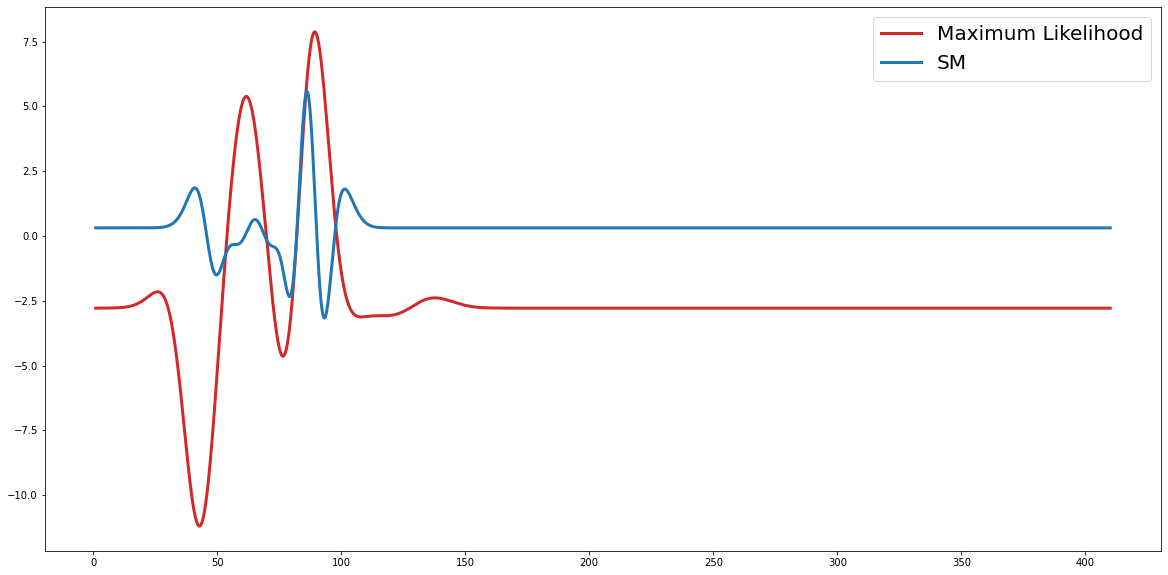

**************************************************
[90.]


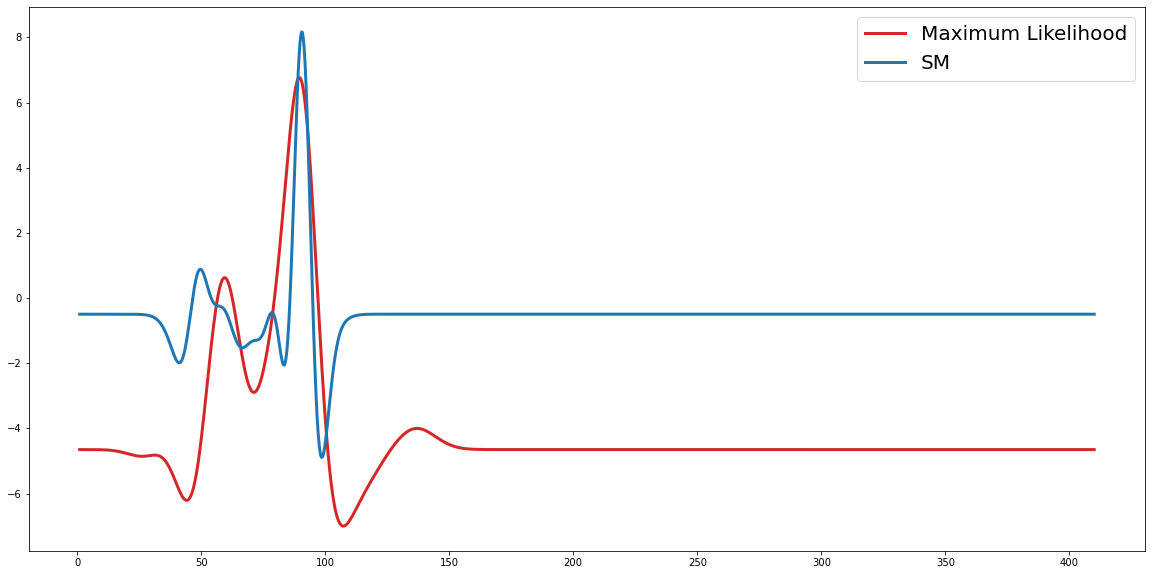

**************************************************
[94.]


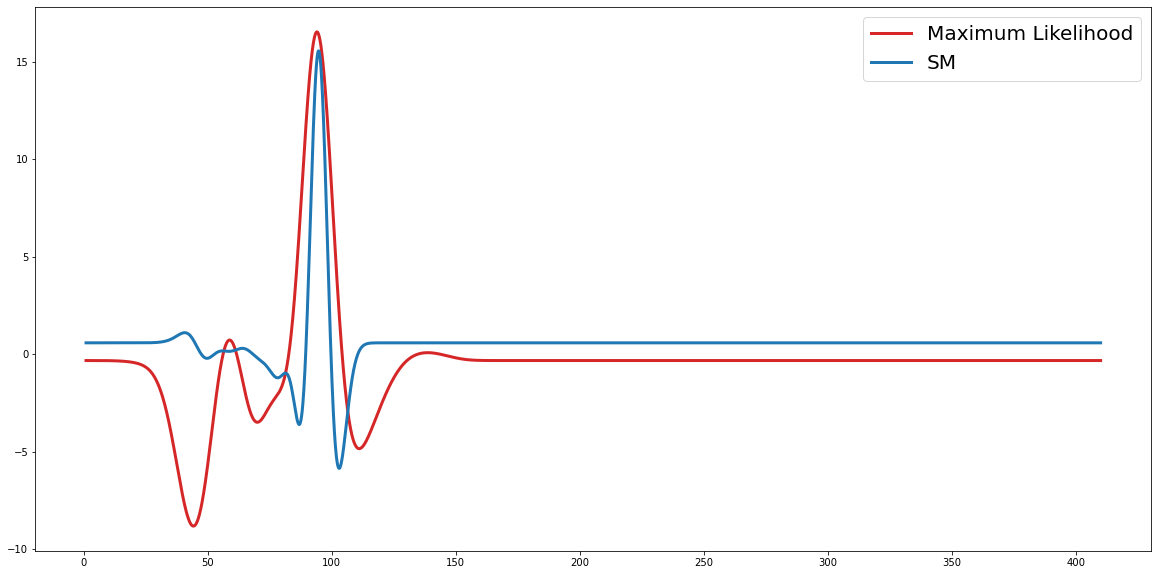

**************************************************
[98.]


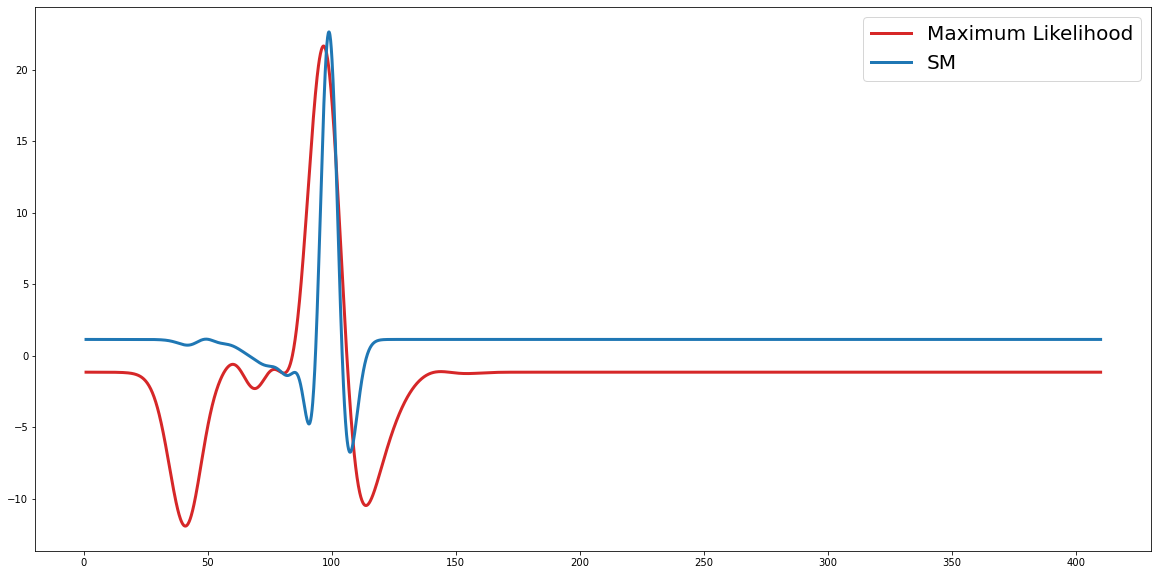

**************************************************
[102.]


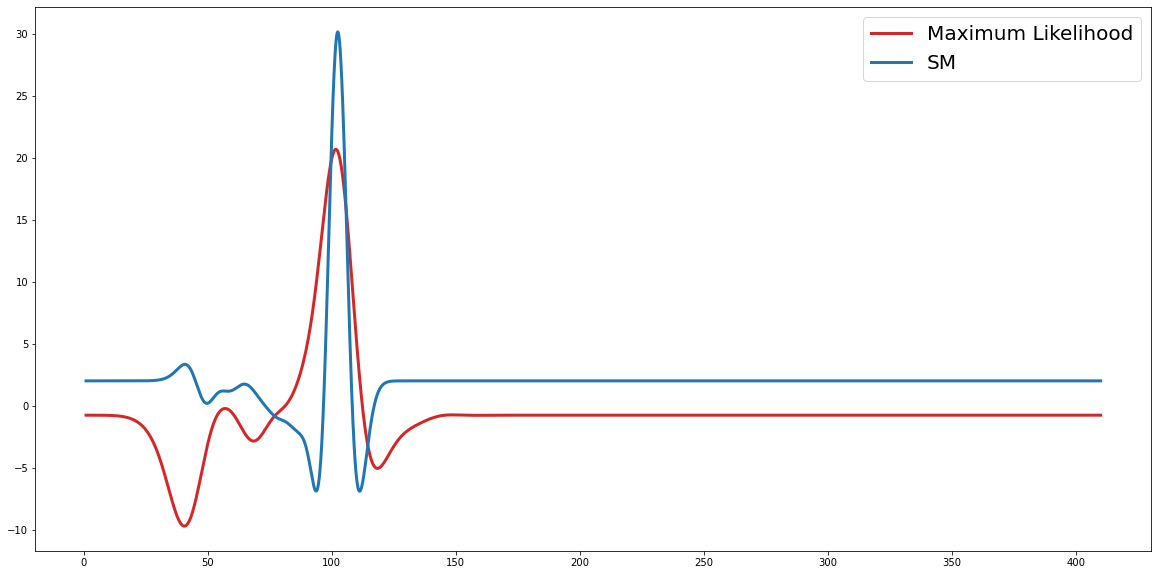

**************************************************
[106.]


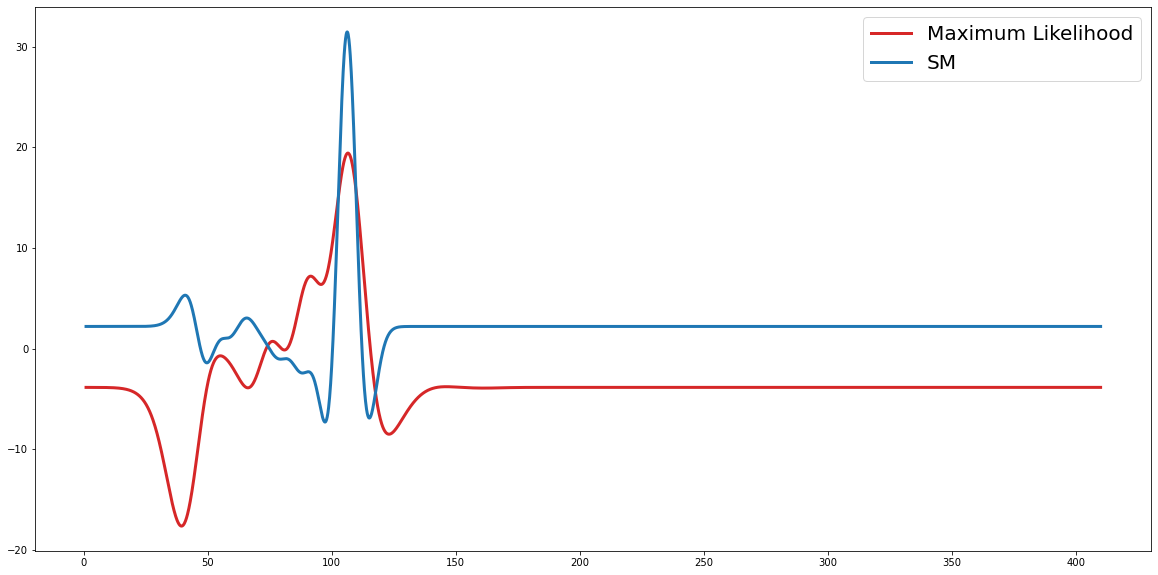

**************************************************
[110.]


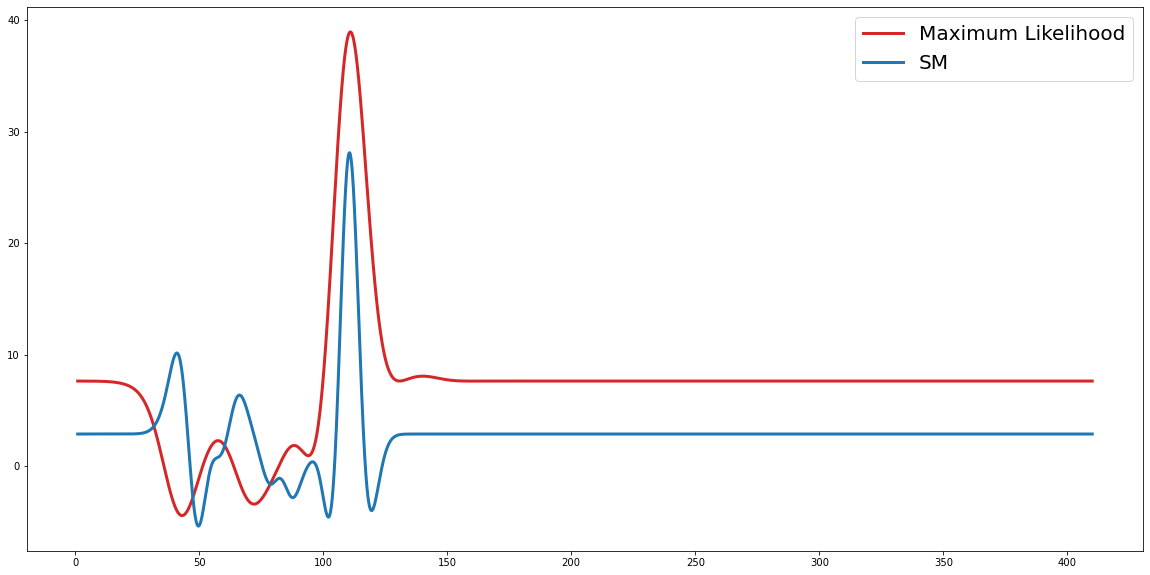

**************************************************
[114.]


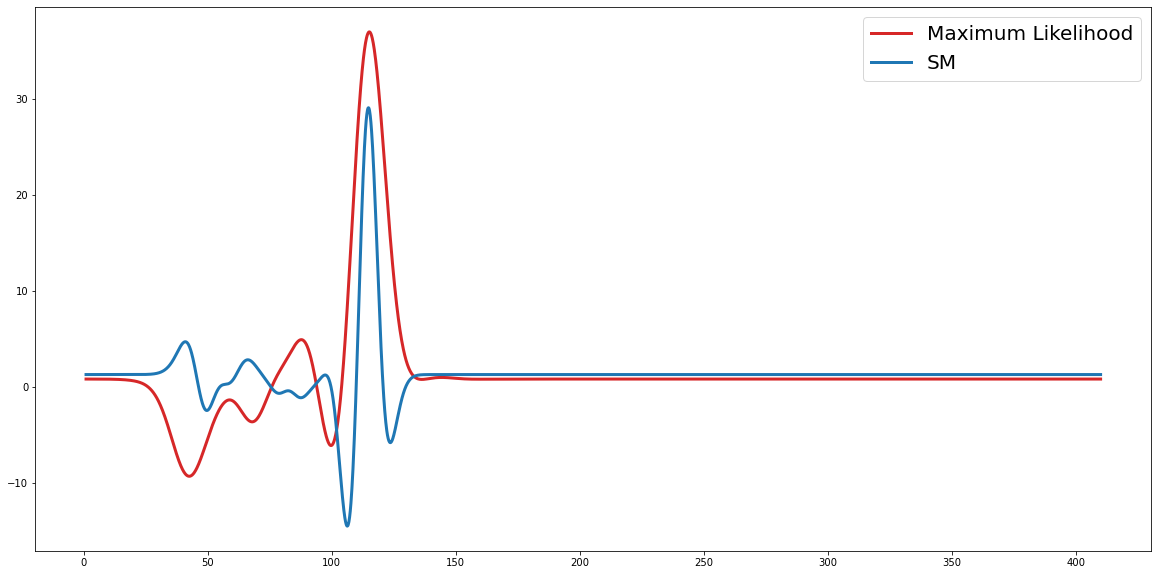

**************************************************
[118.]


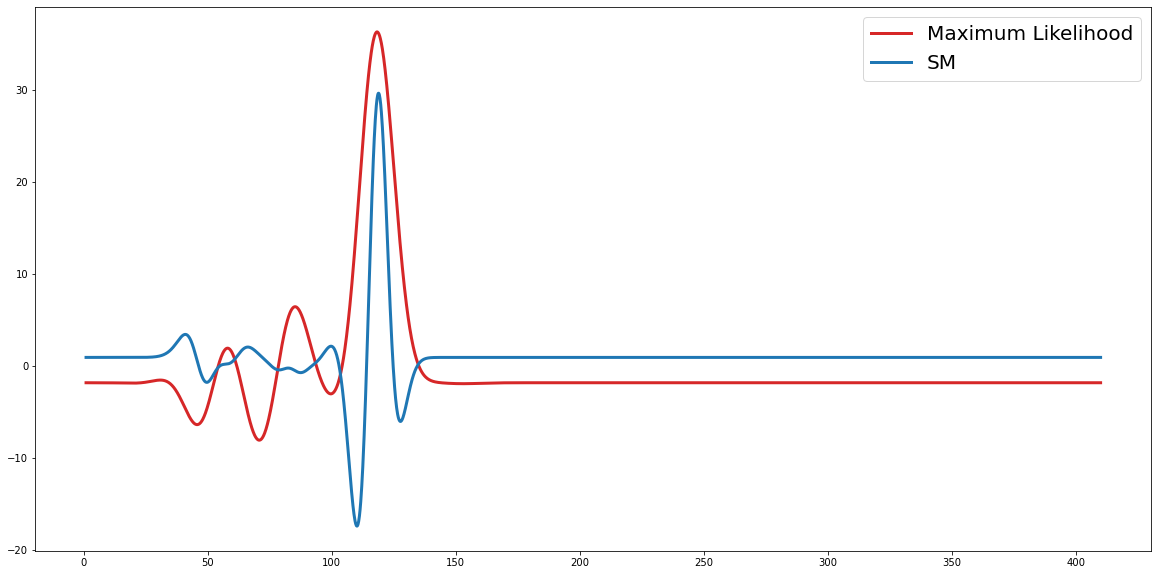

**************************************************
[122.]


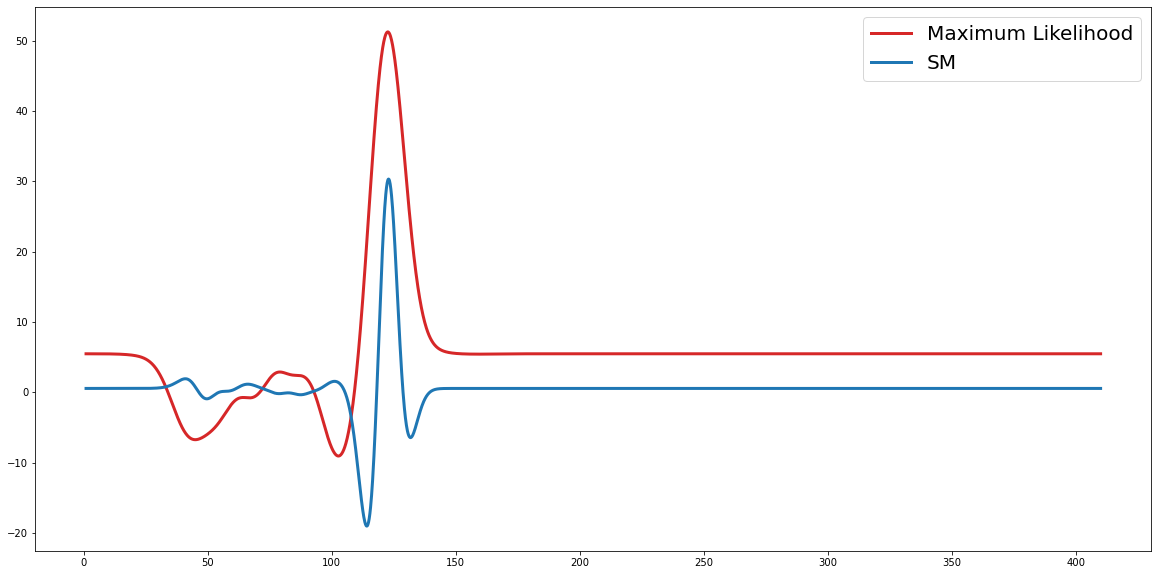

**************************************************
[126.]


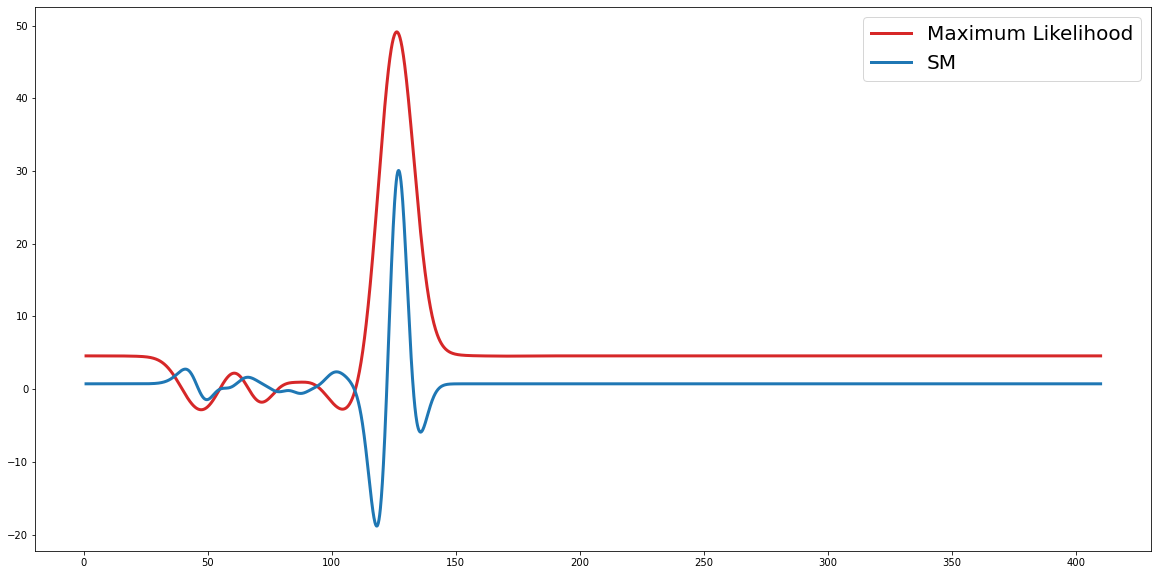

**************************************************
[130.]


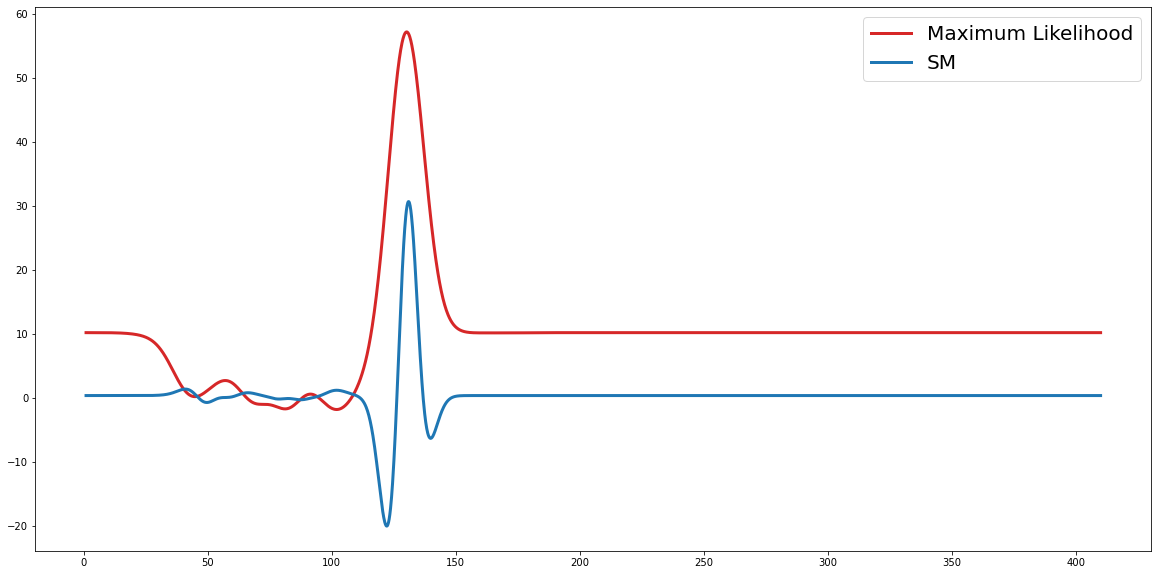

**************************************************
[134.]


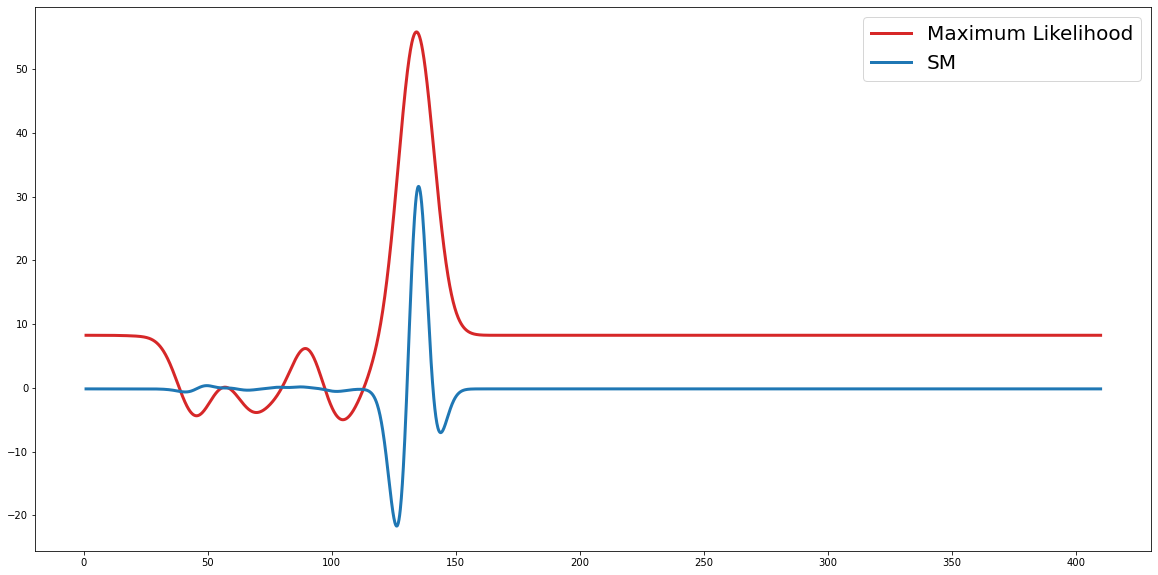

**************************************************
[138.]


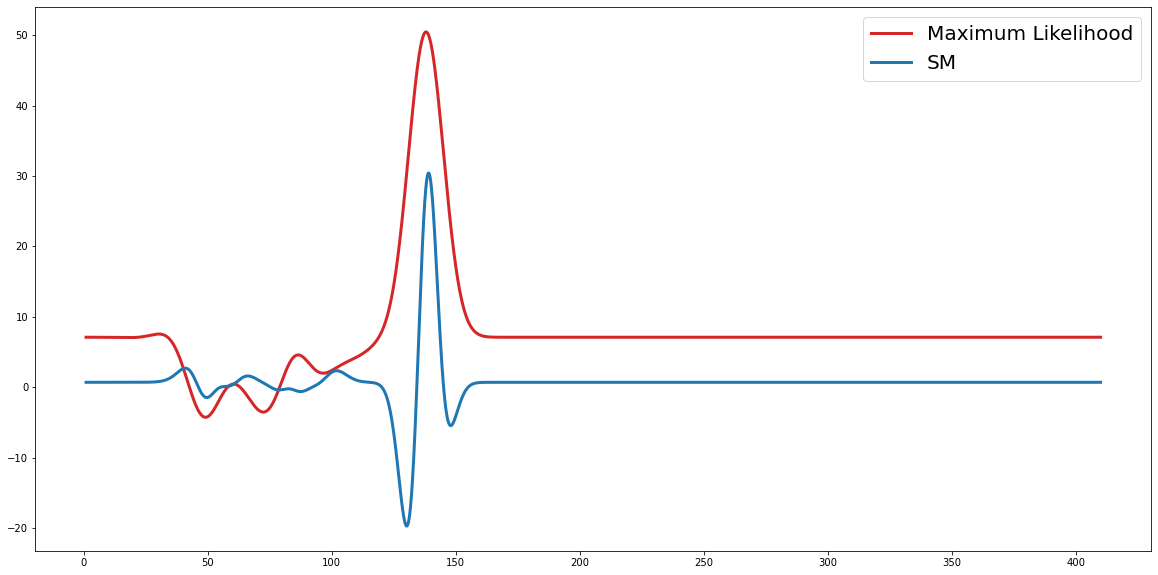

**************************************************
[142.]


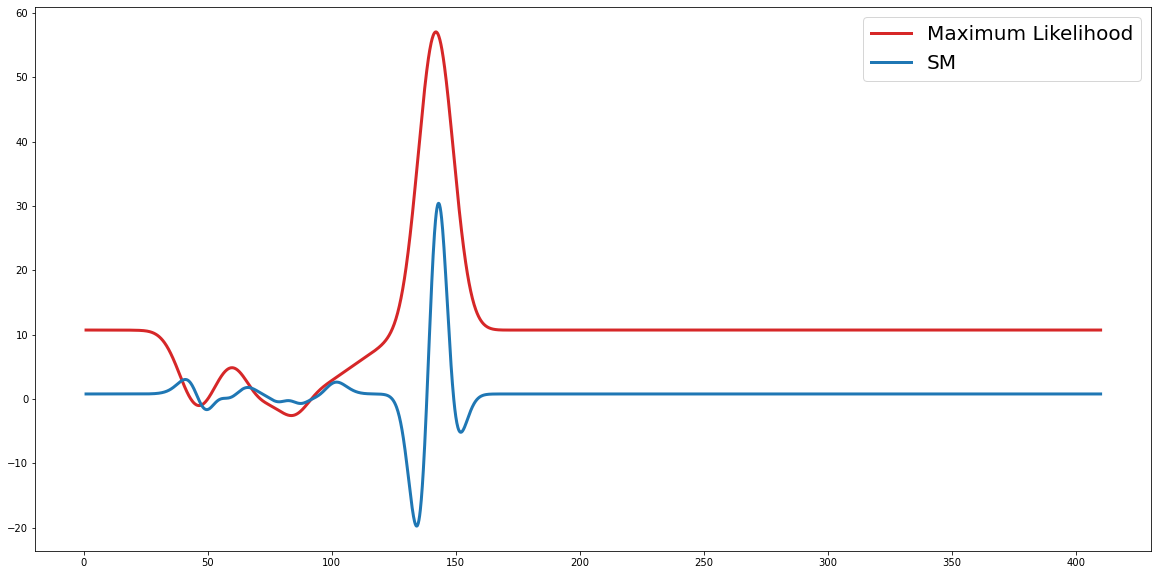

**************************************************
[146.]


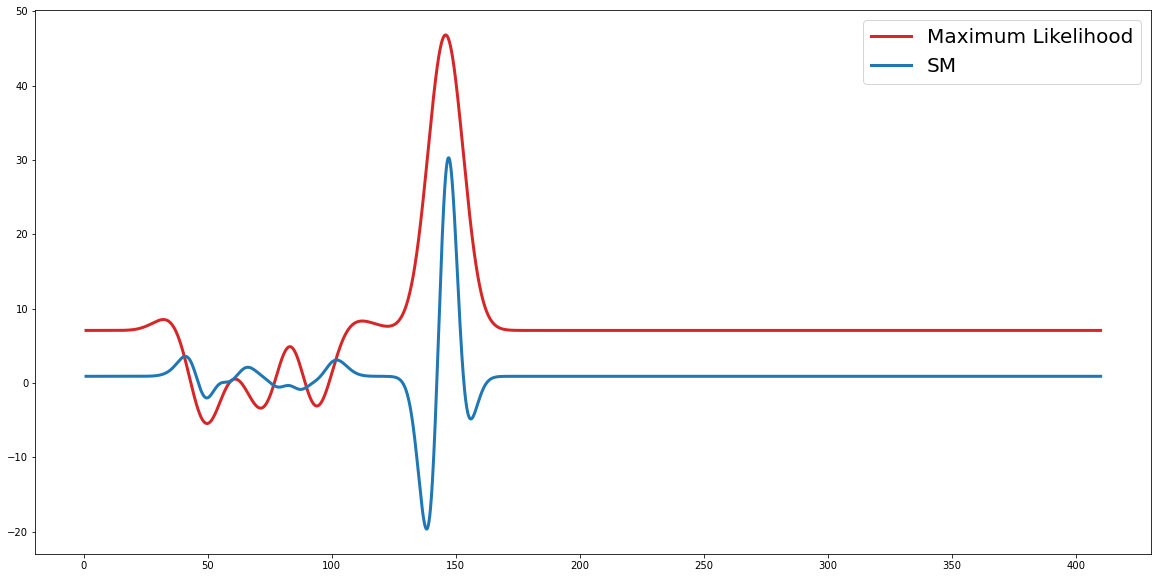

**************************************************
[150.]


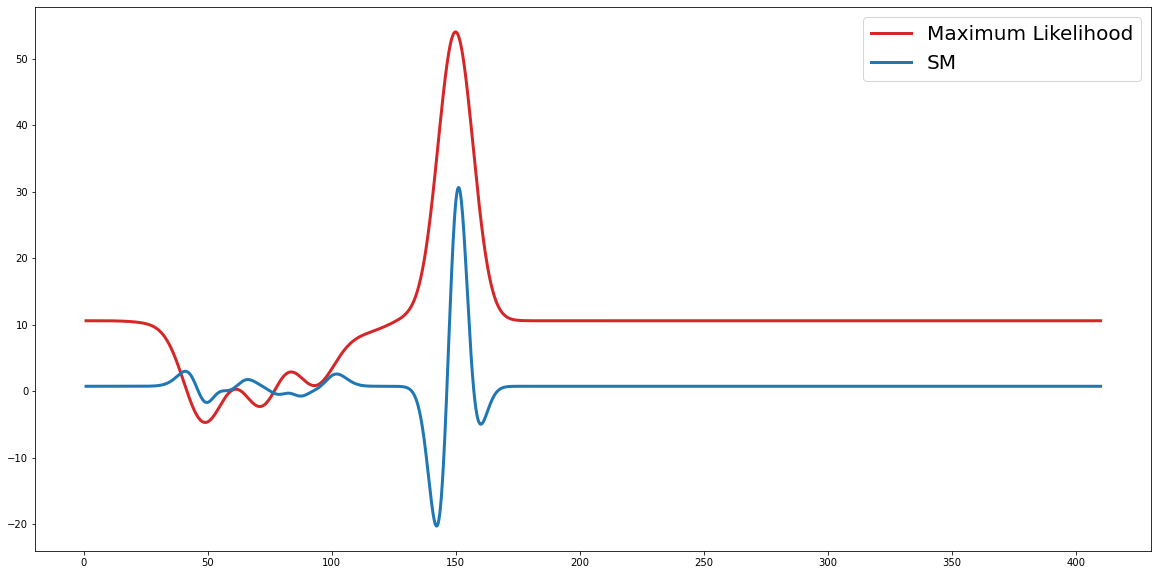

**************************************************
[154.]


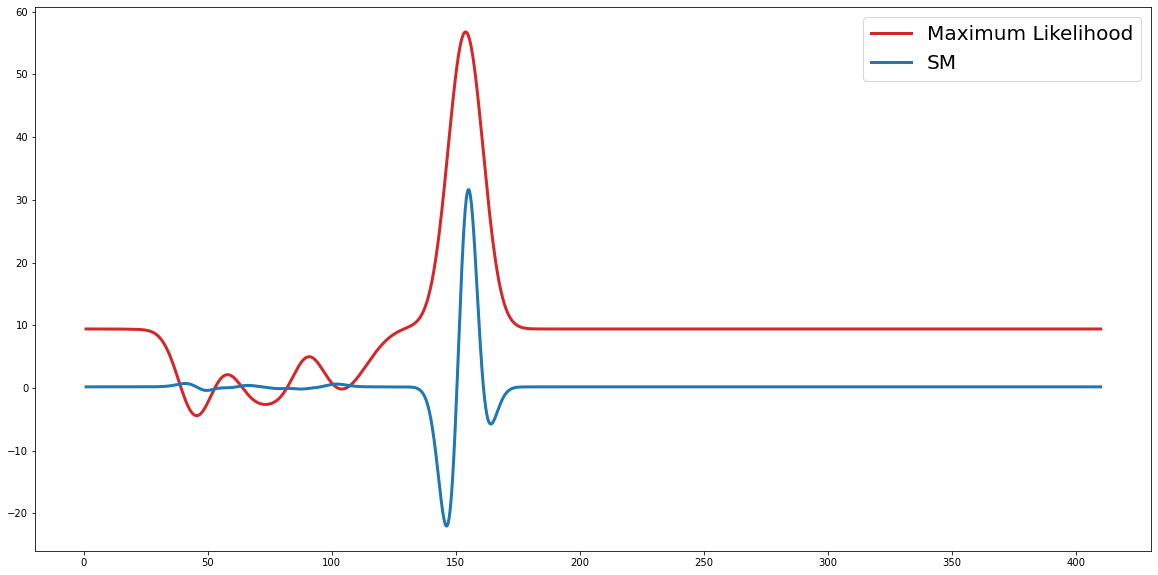

**************************************************
[158.]


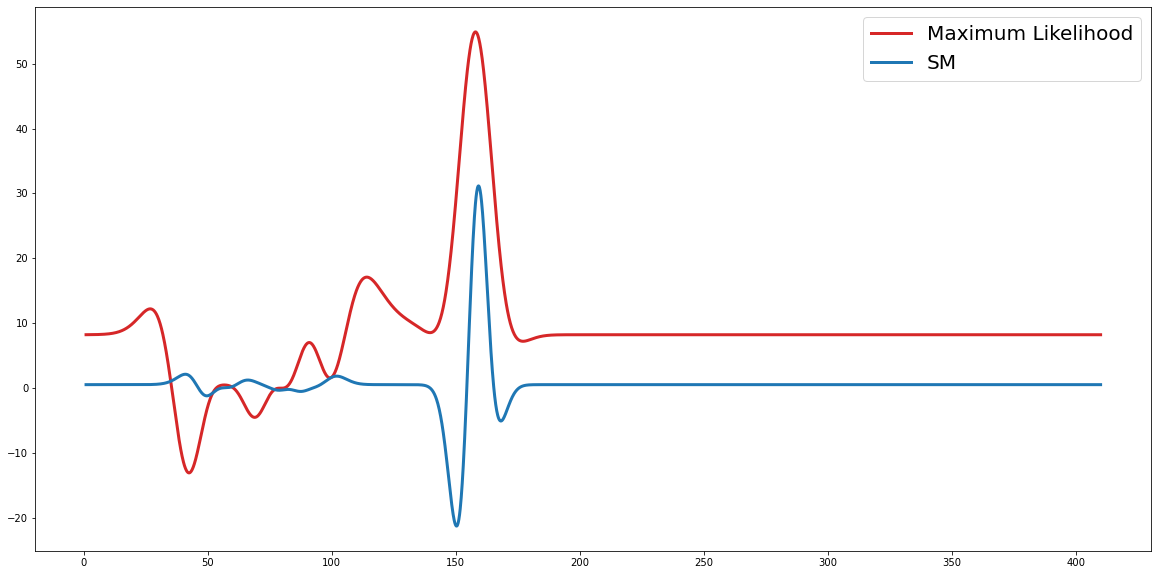

**************************************************
[162.]


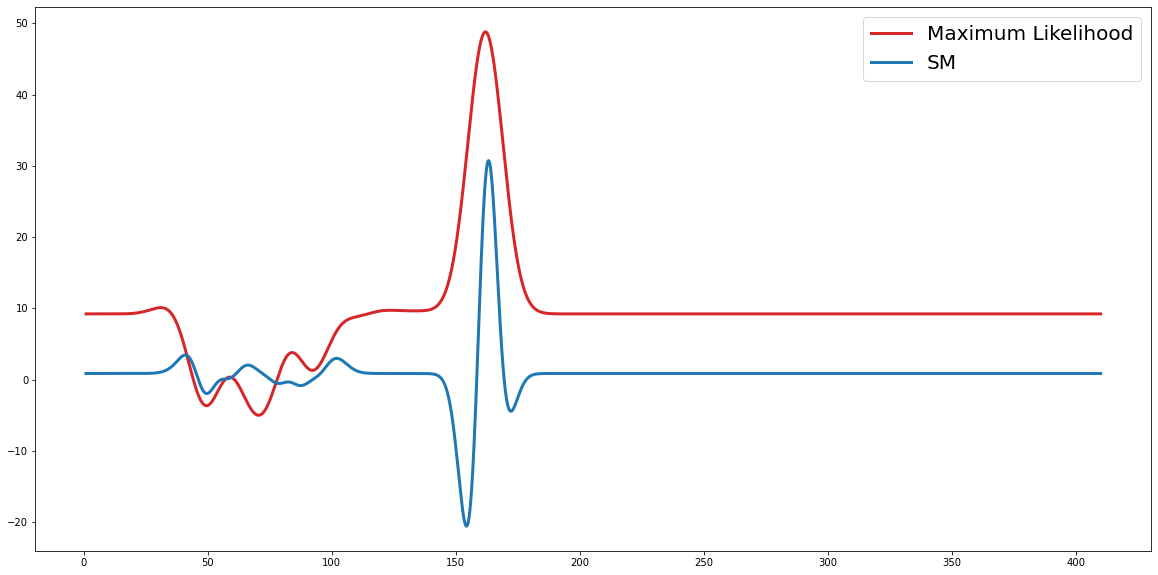

**************************************************
[166.]


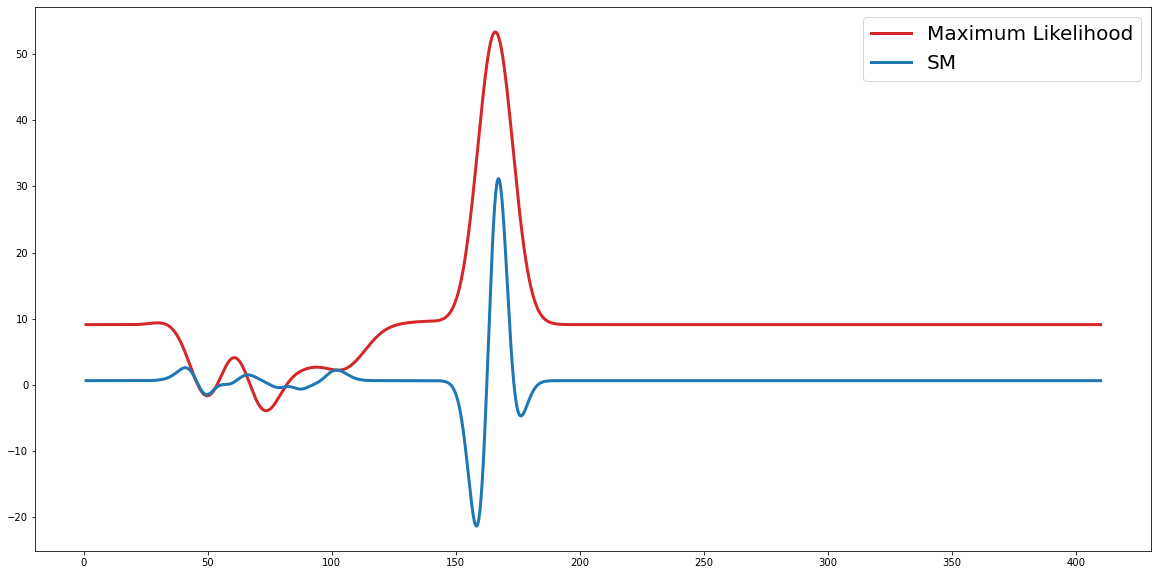

**************************************************
[170.]


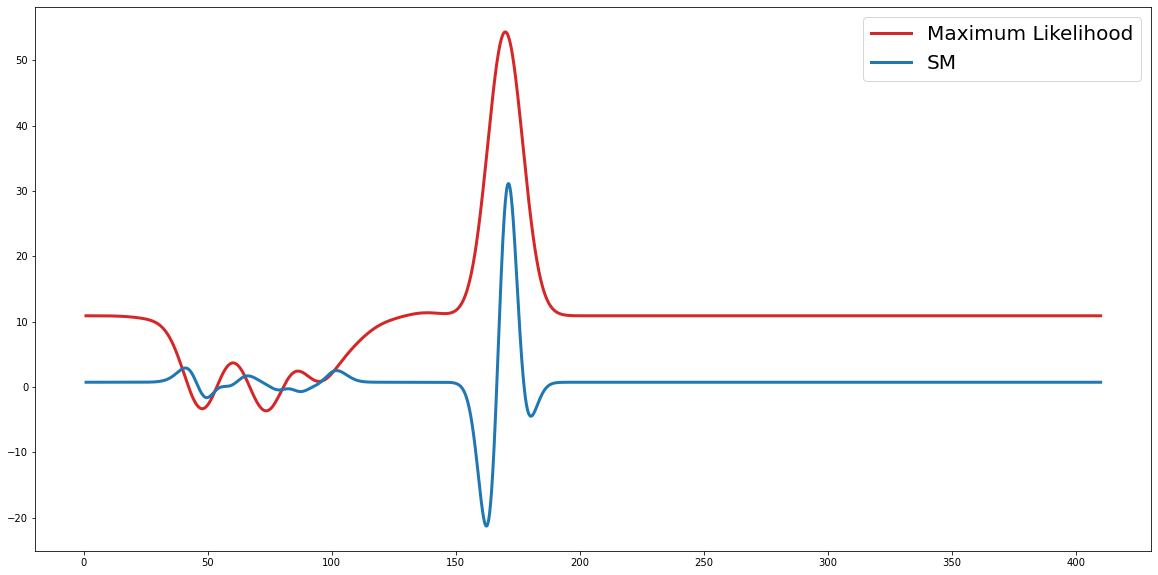

**************************************************
[174.]


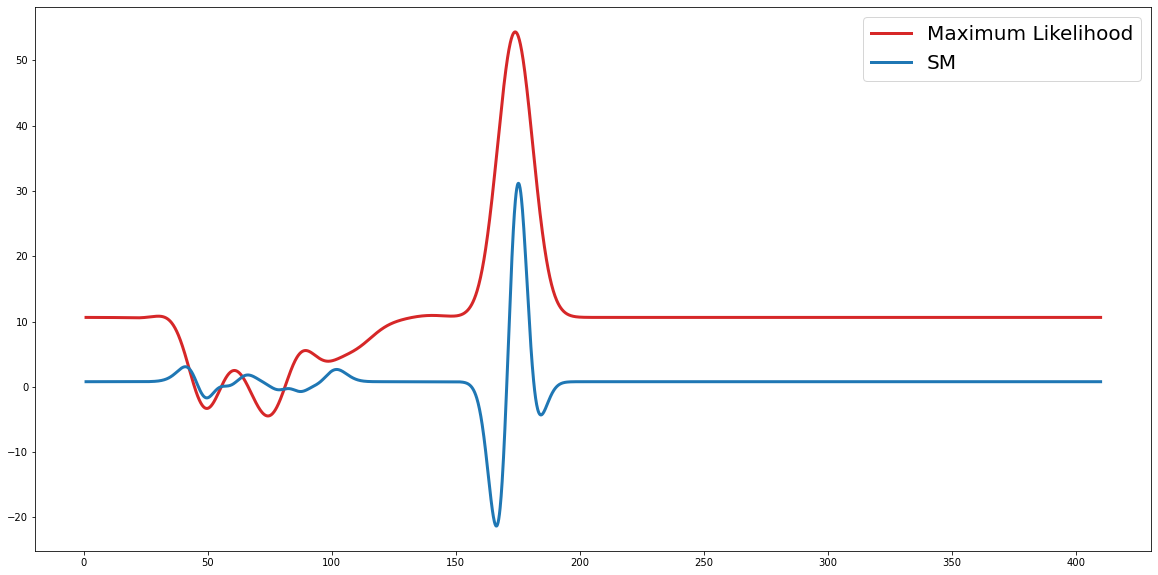

**************************************************
[178.]


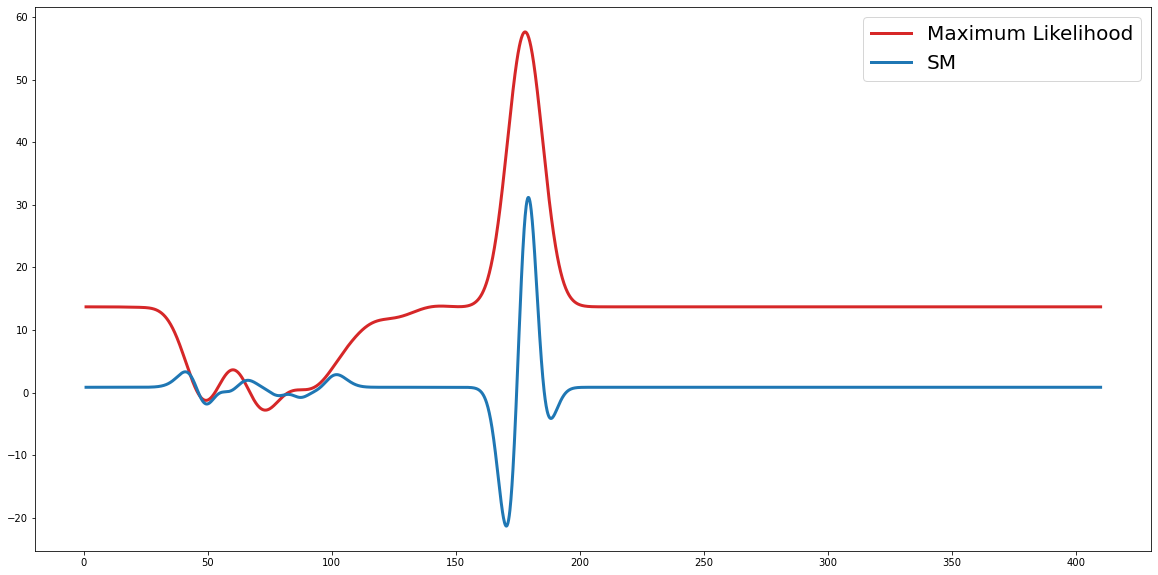

**************************************************
[182.]


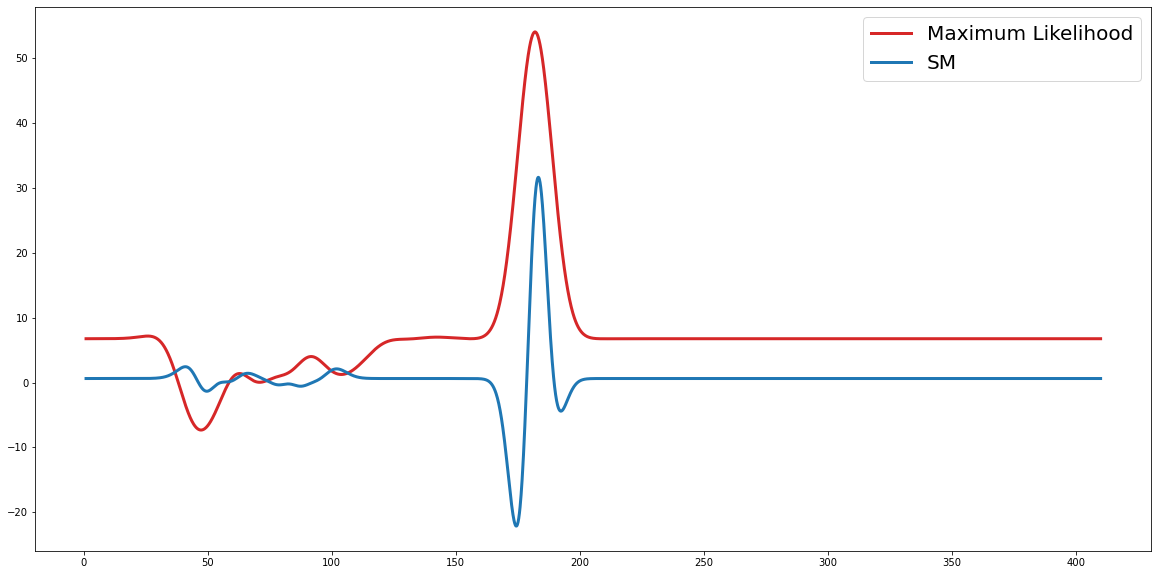

**************************************************
[186.]


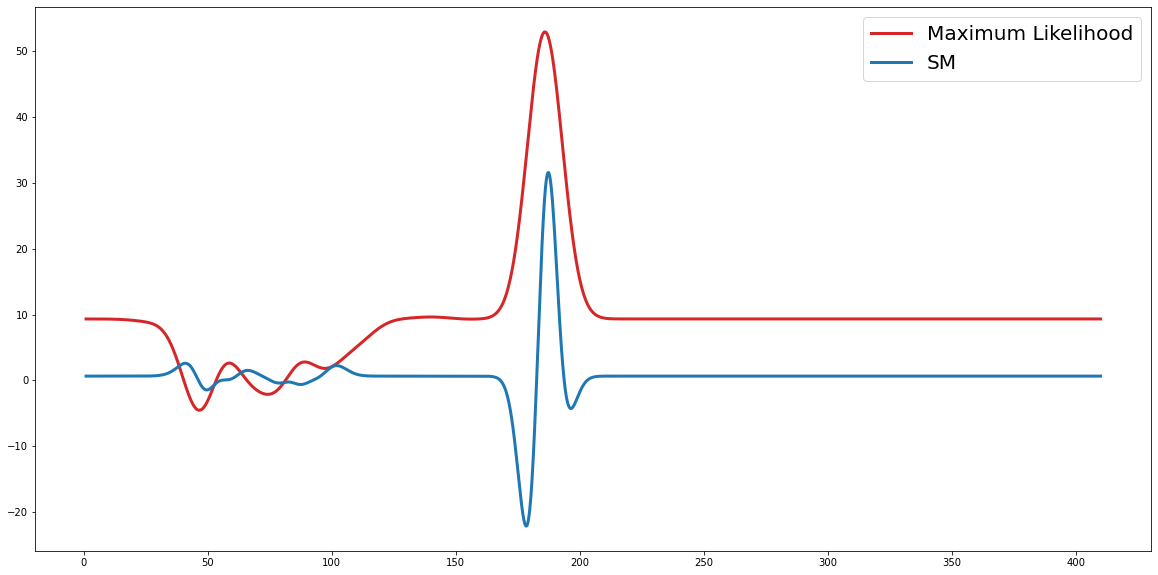

**************************************************
[190.]


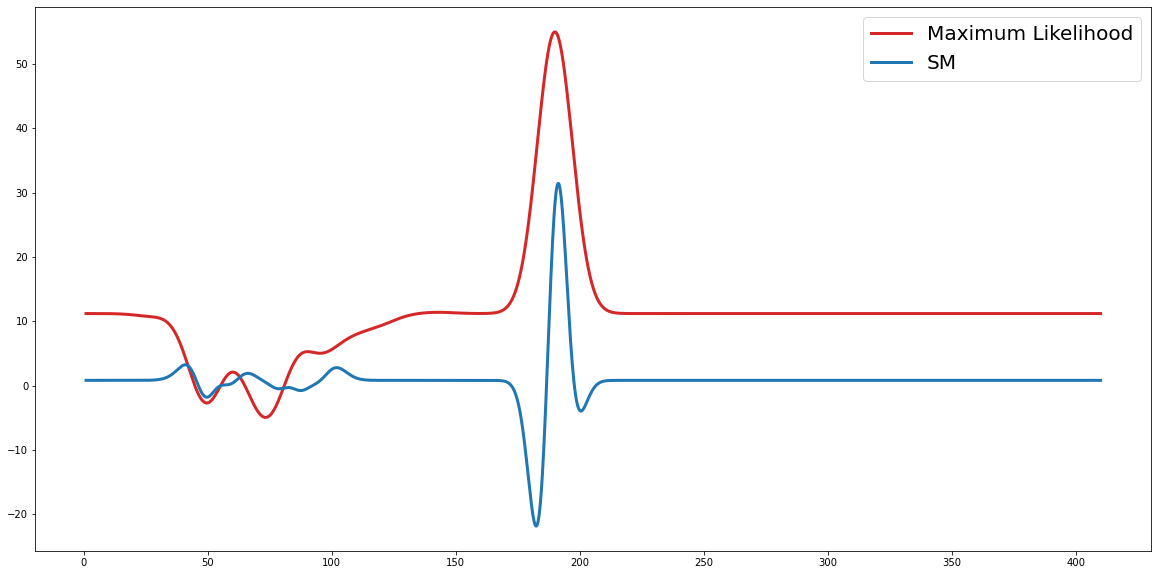

**************************************************
[194.]


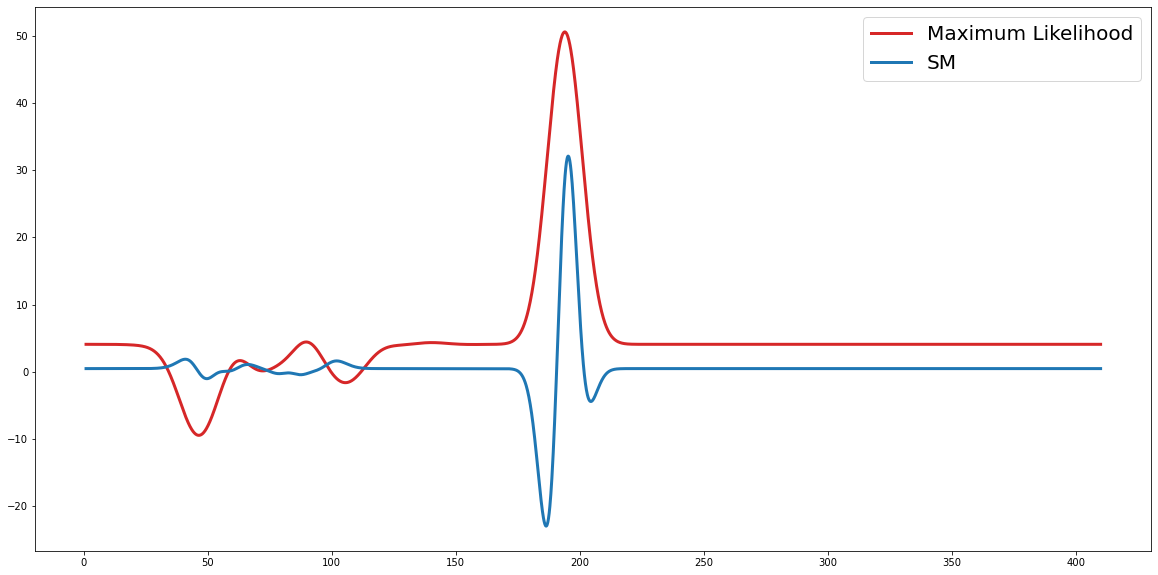

**************************************************
[198.]


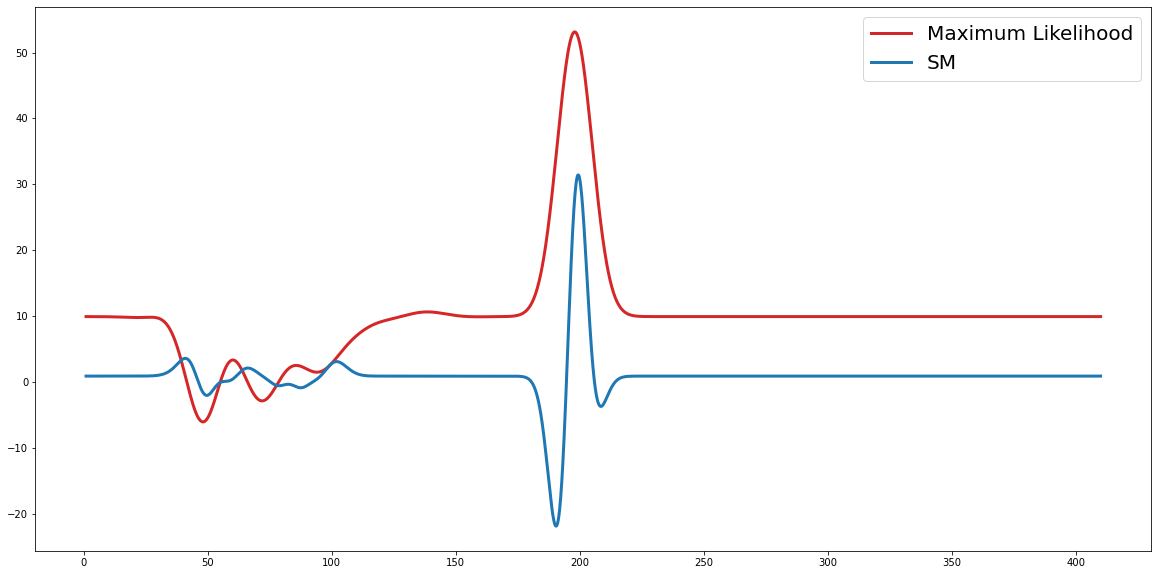

**************************************************
[202.]


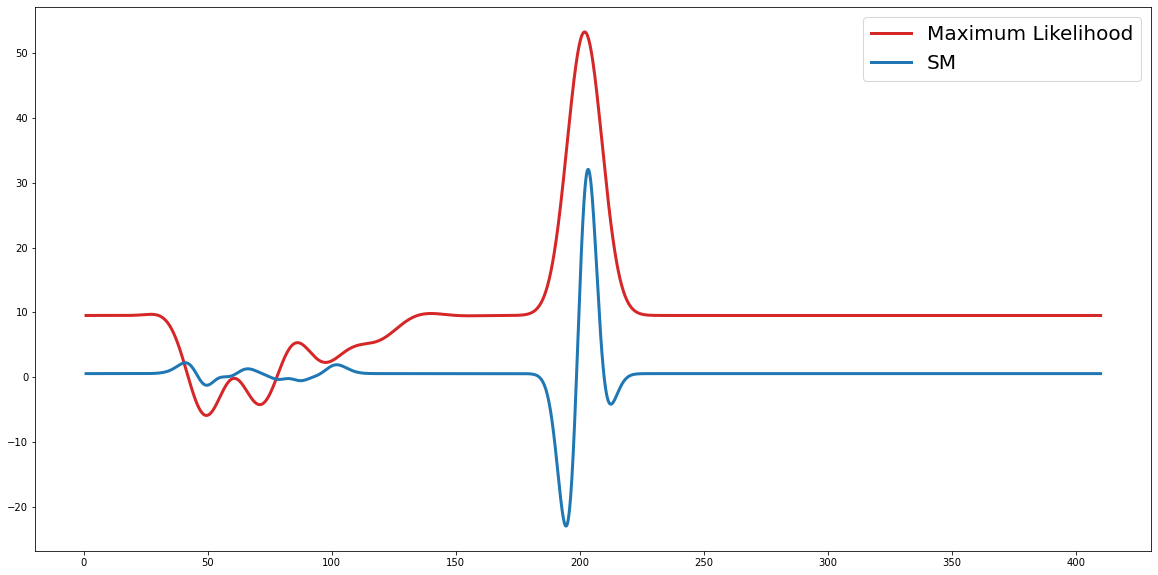

**************************************************
[206.]


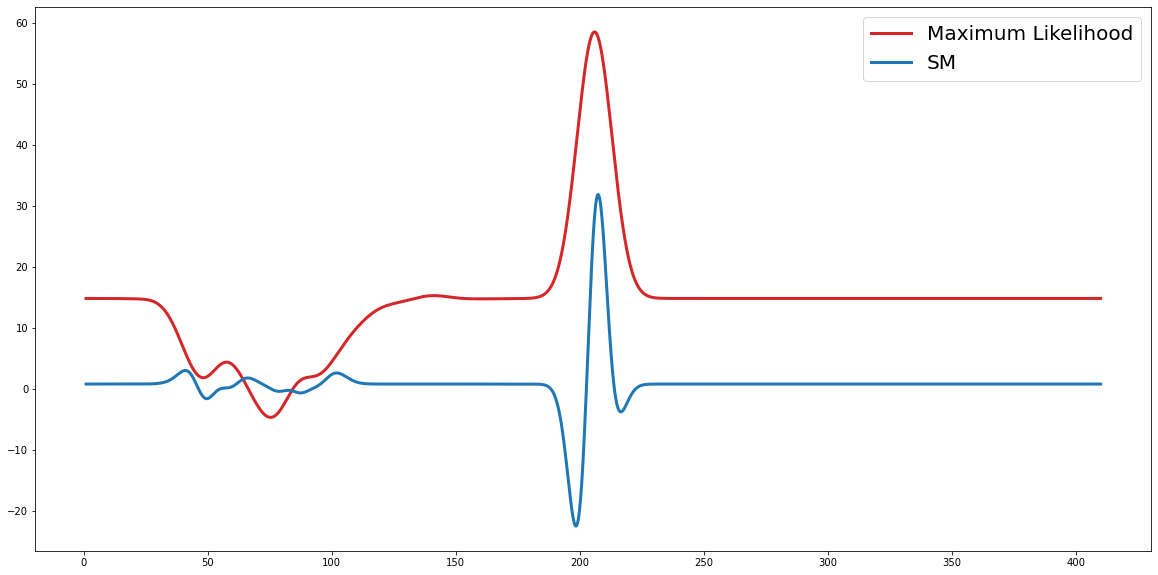

**************************************************
[210.]


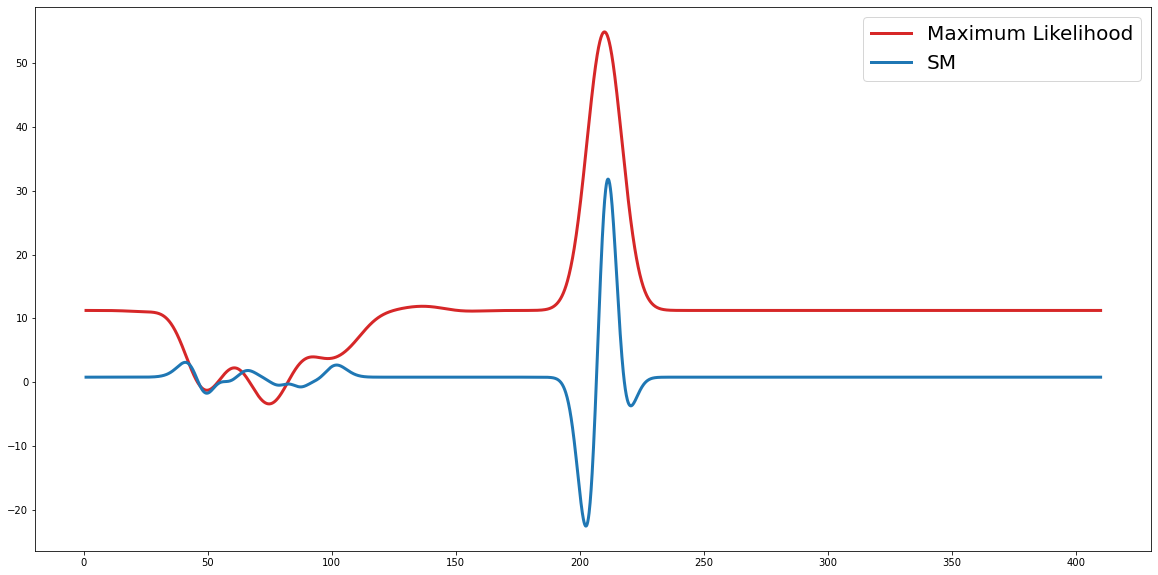

**************************************************
[214.]


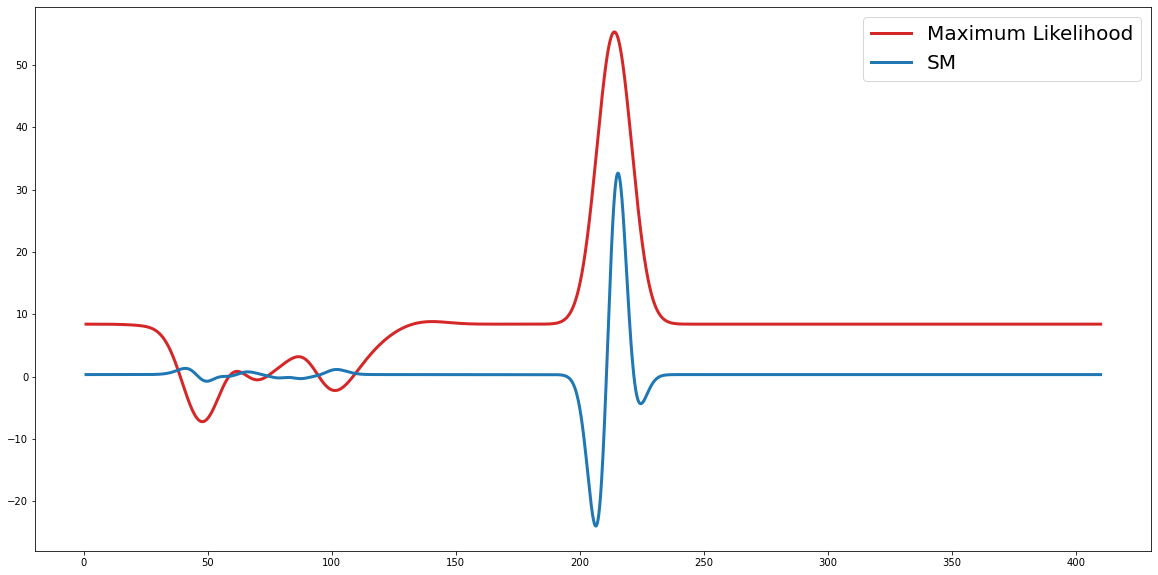

**************************************************
[218.]


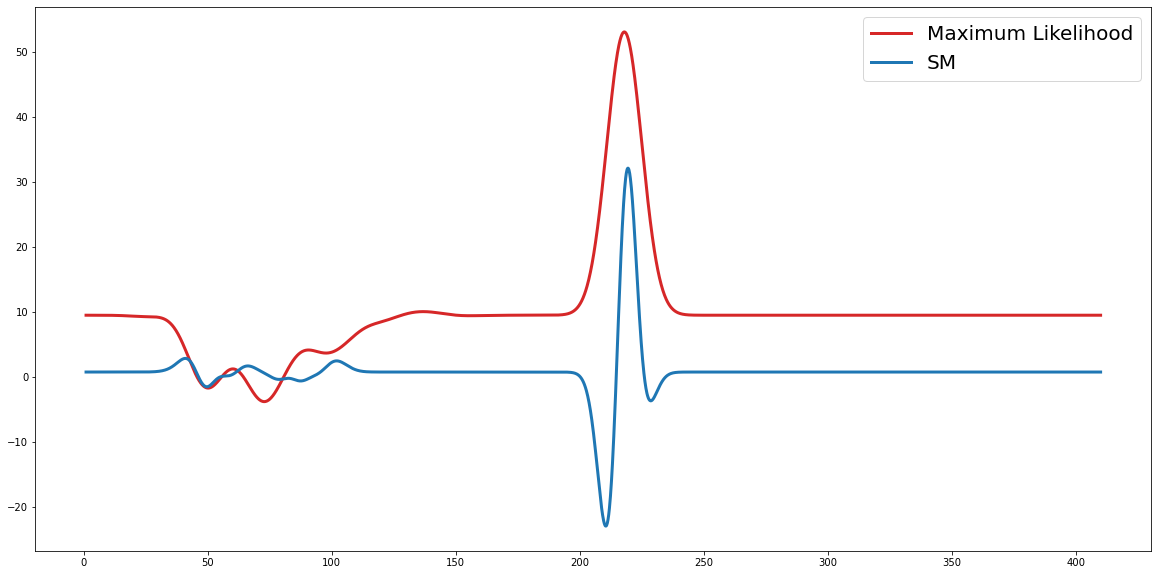

**************************************************
[222.]


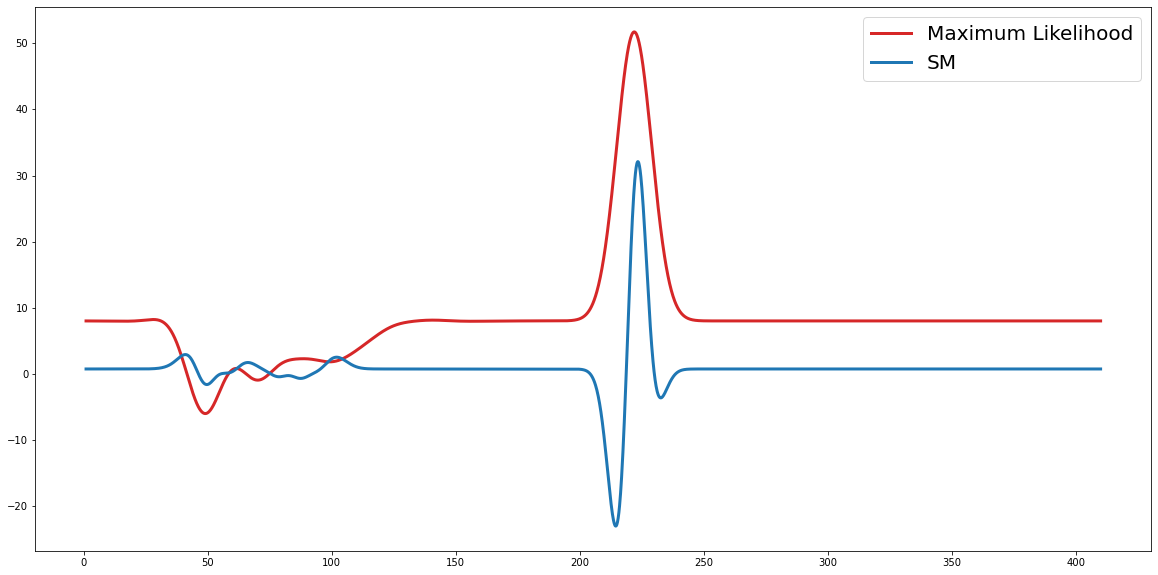

**************************************************
[226.]


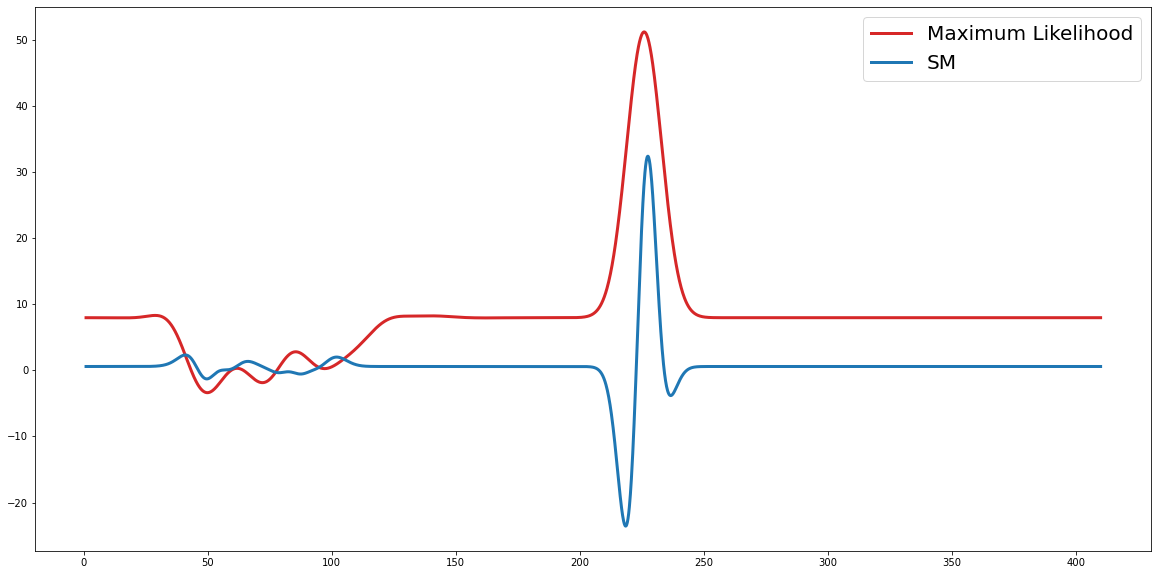

**************************************************
[230.]


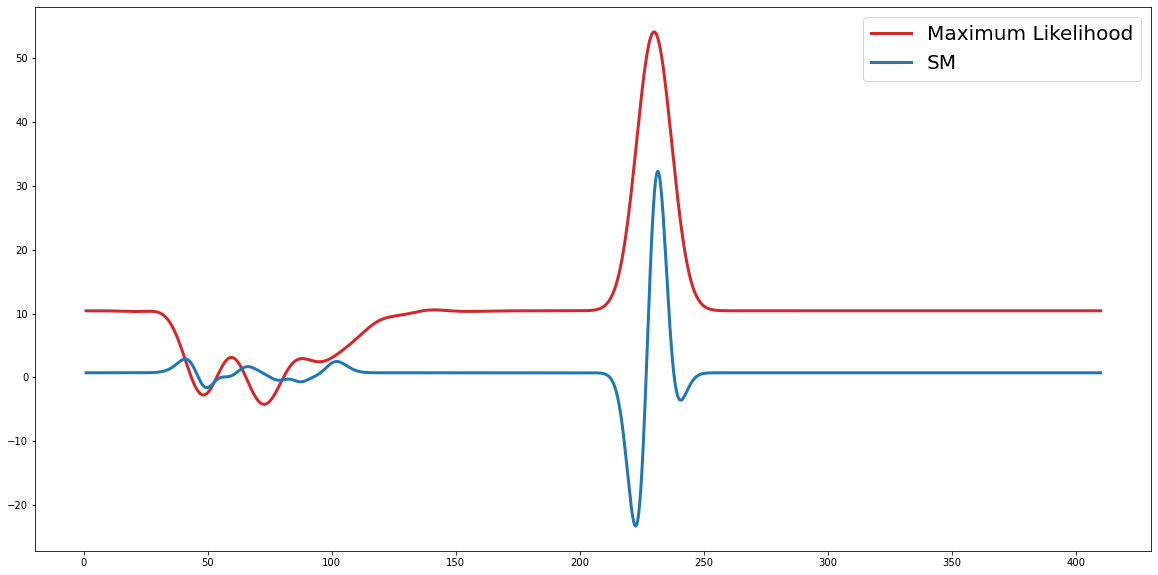

**************************************************
[234.]


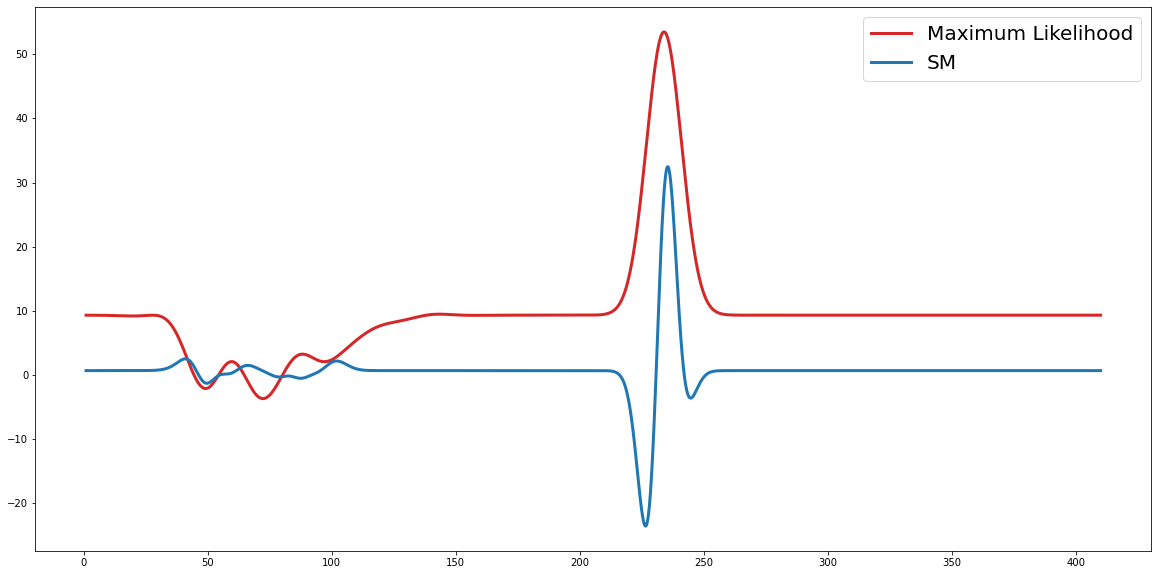

**************************************************
[238.]


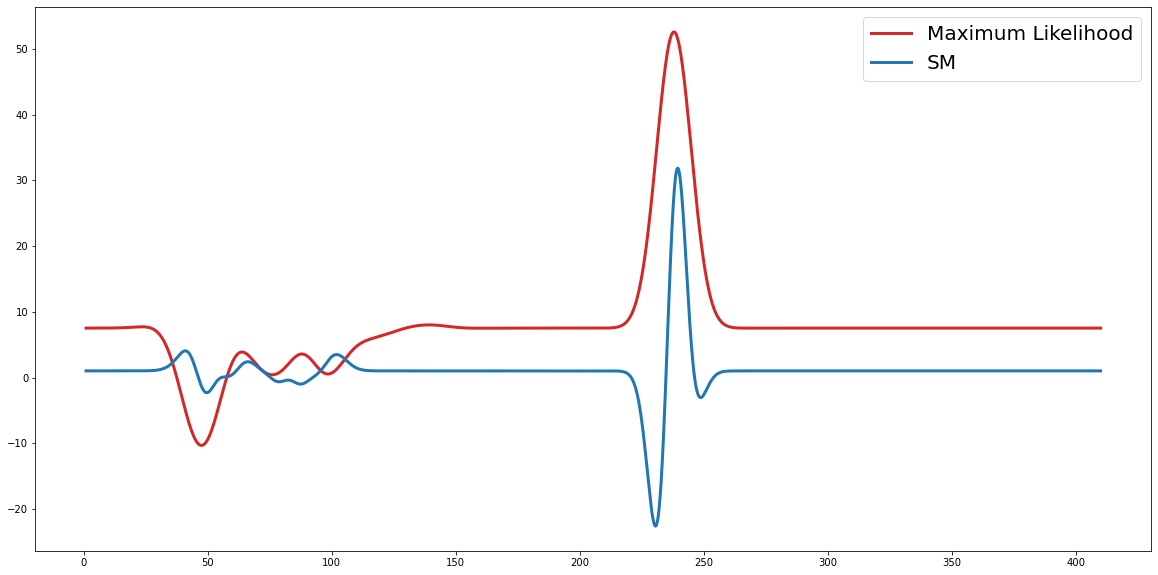

**************************************************
[242.]


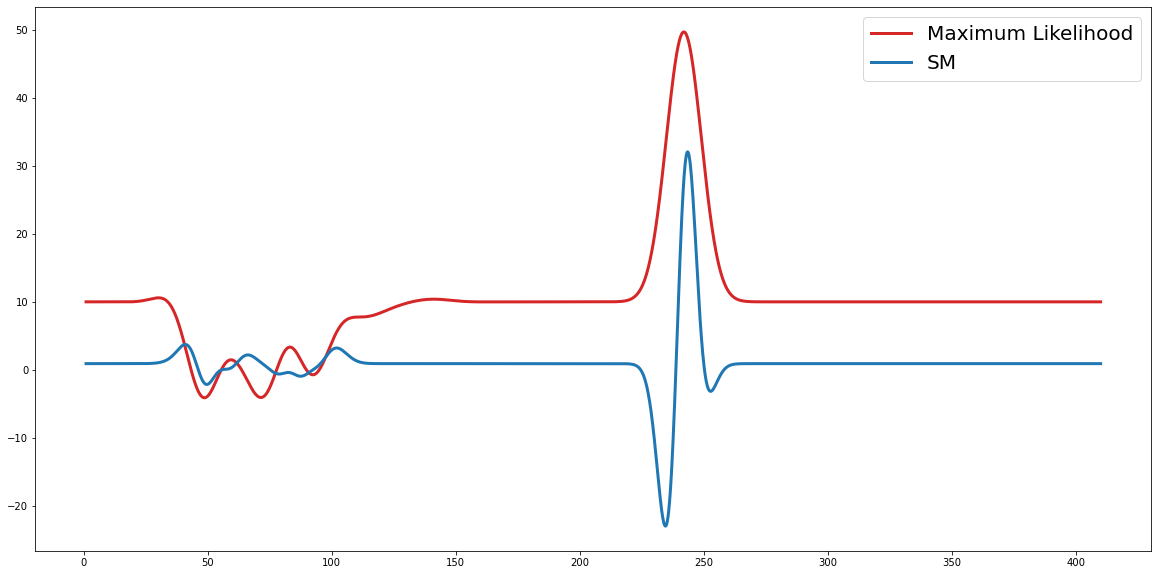

**************************************************
[246.]


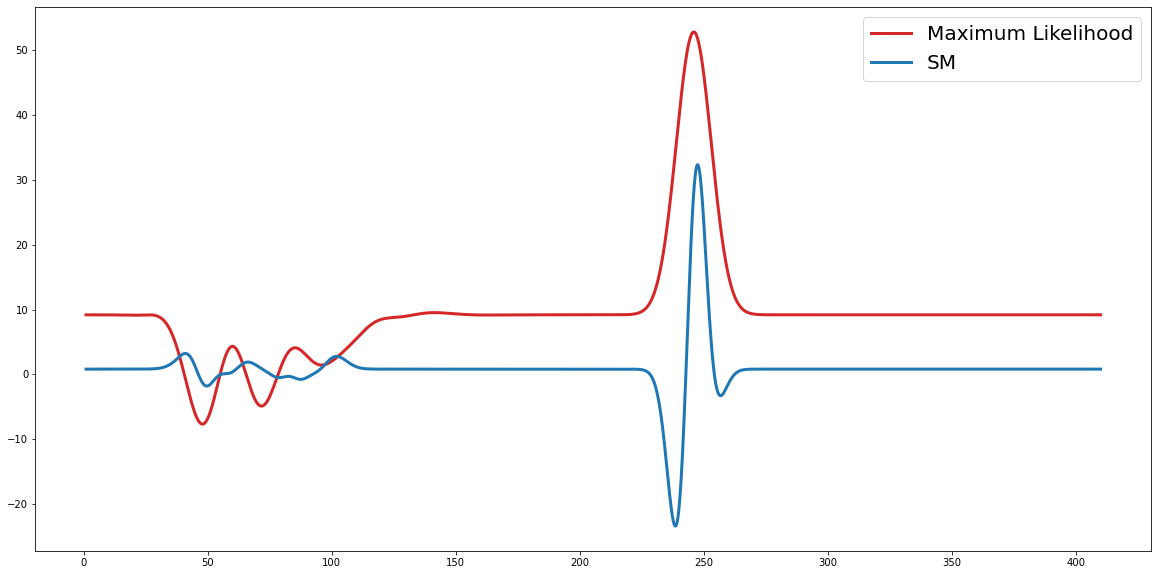

**************************************************
[250.]


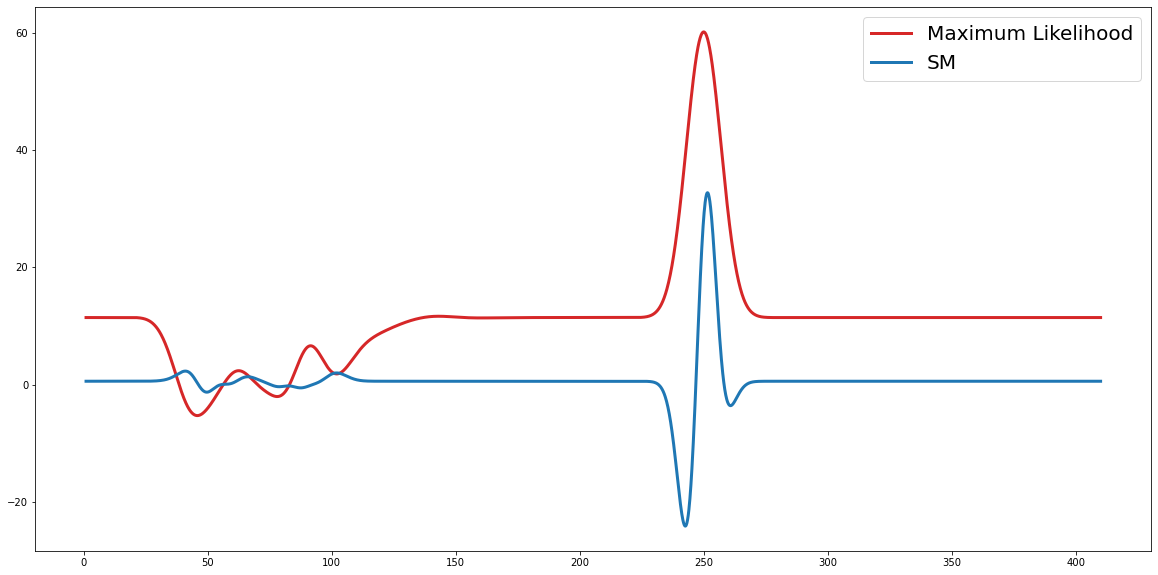

**************************************************
[254.]


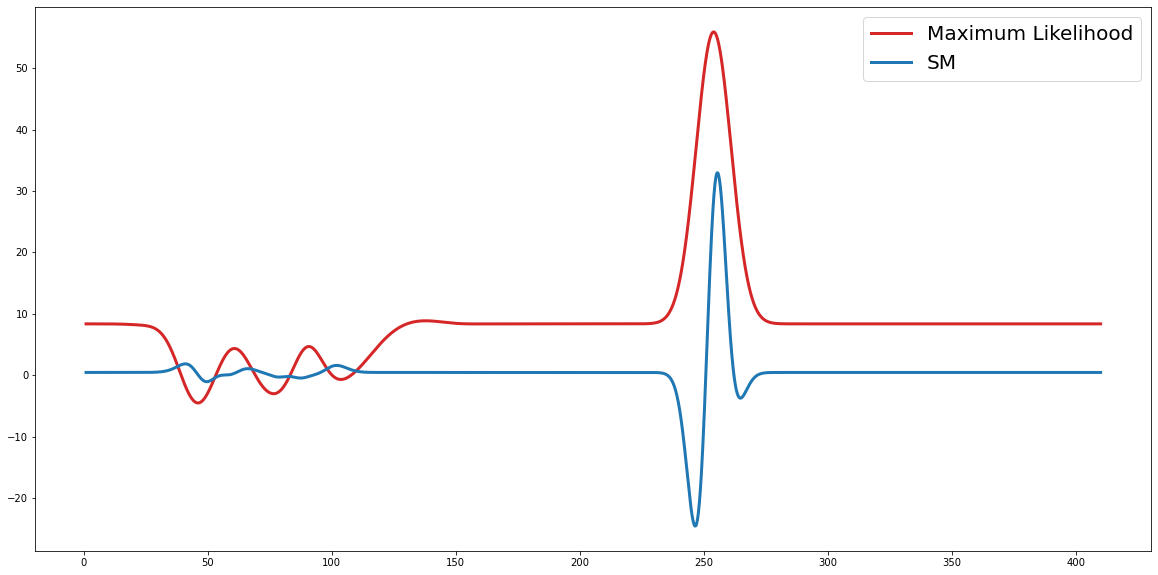

**************************************************
[258.]


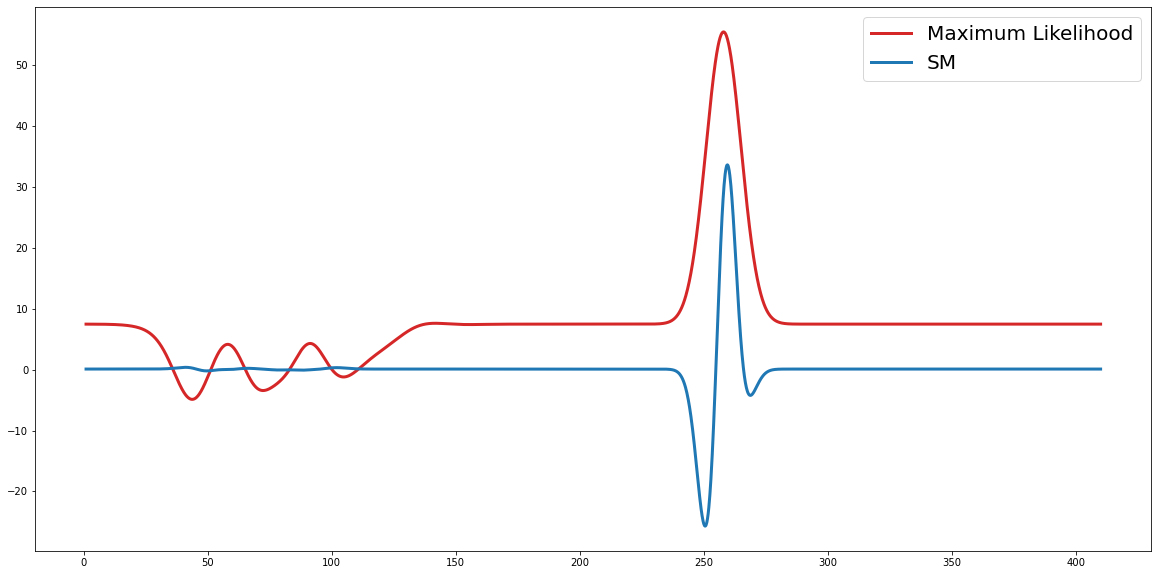

**************************************************
[262.]


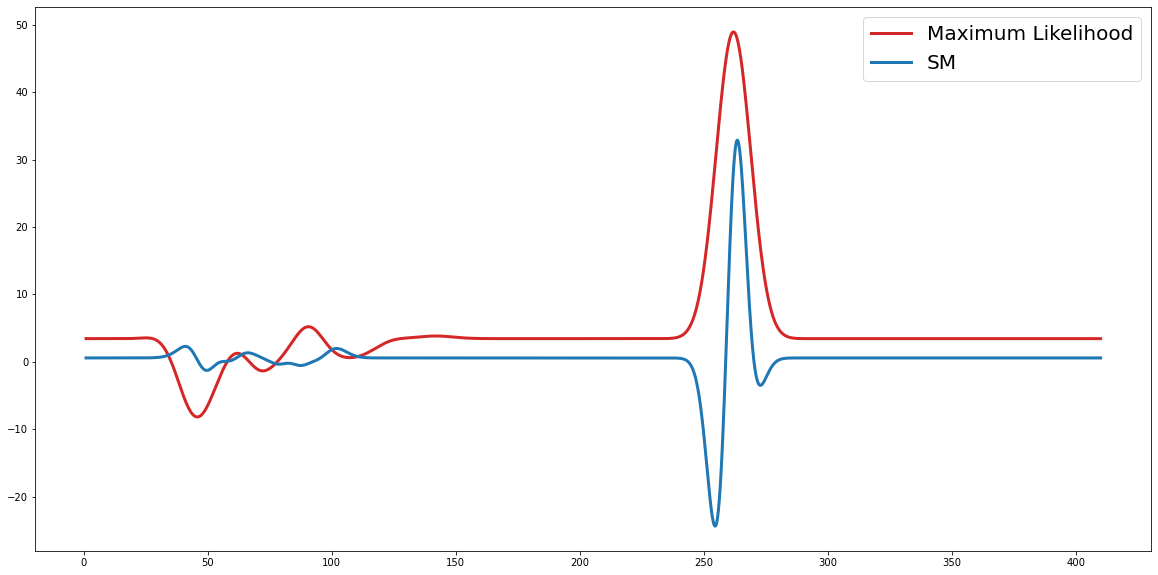

**************************************************
[266.]


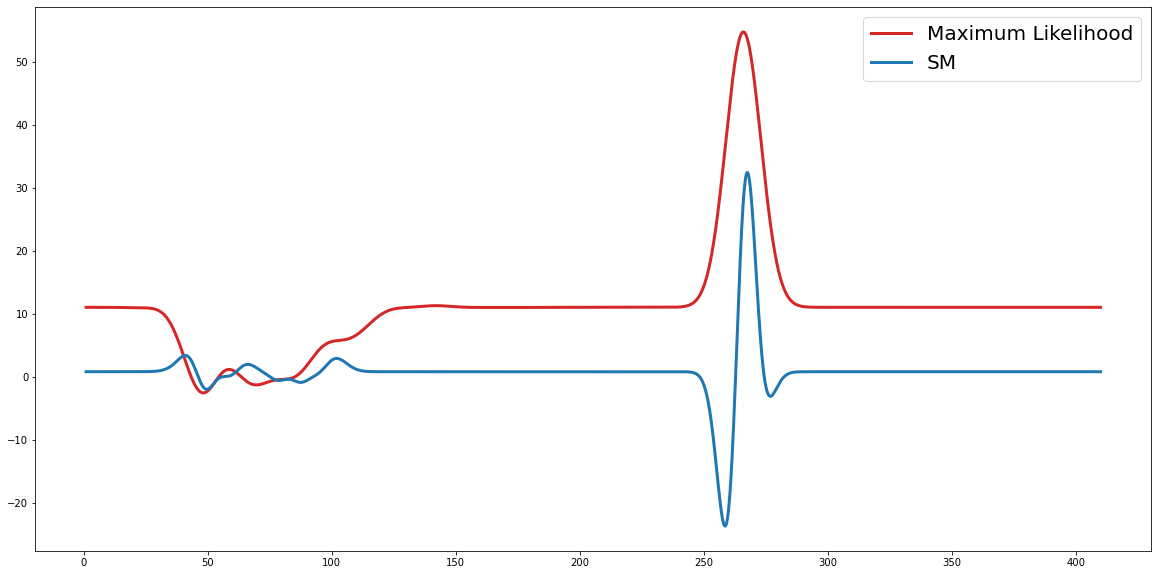

**************************************************
[270.]


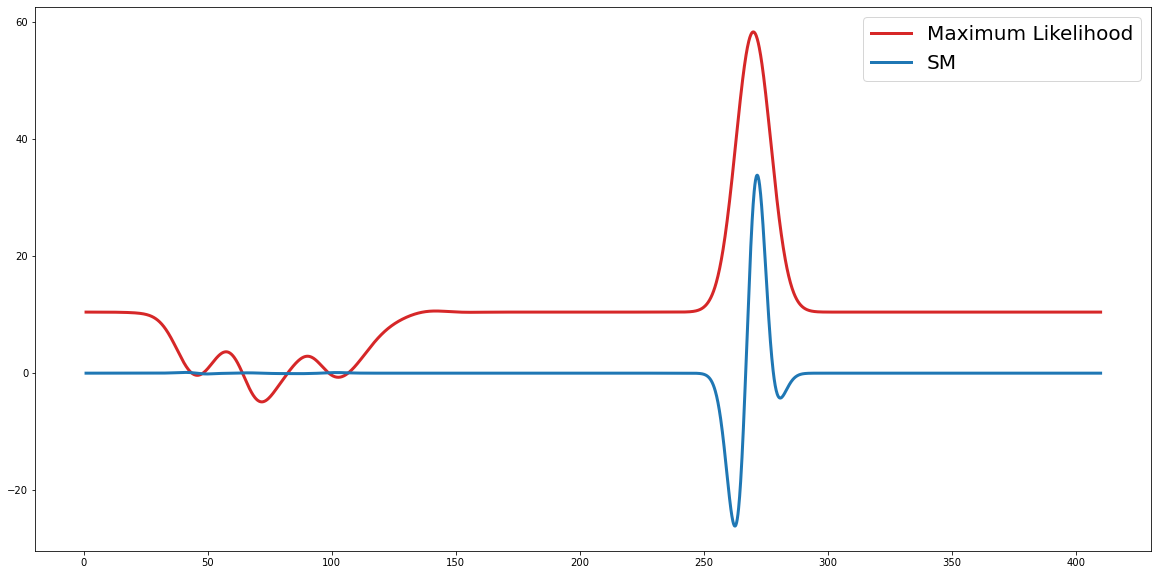

**************************************************
[274.]


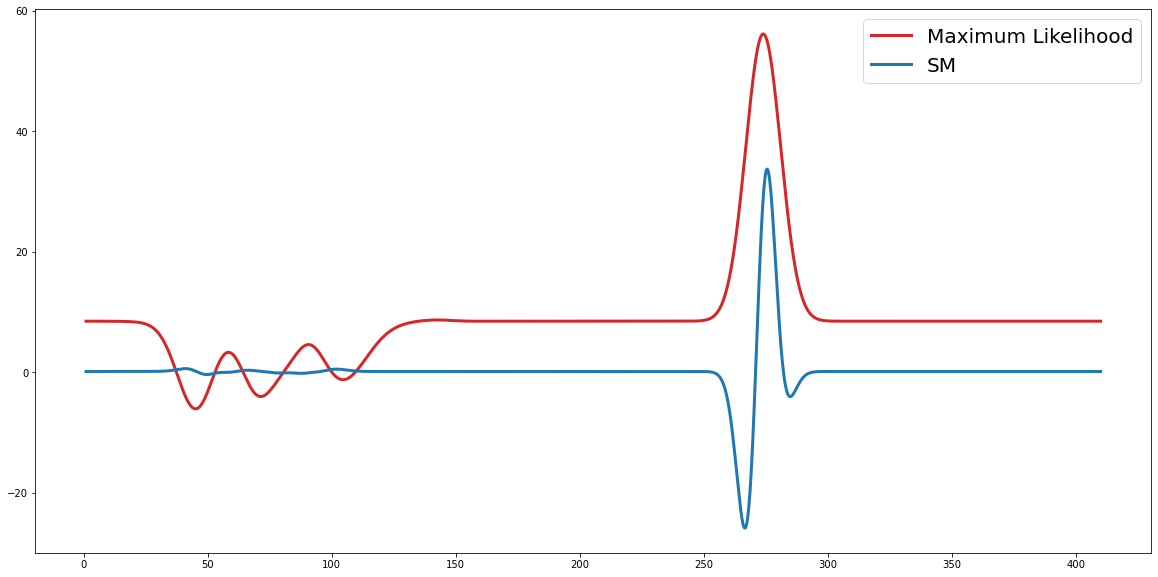

**************************************************
[278.]


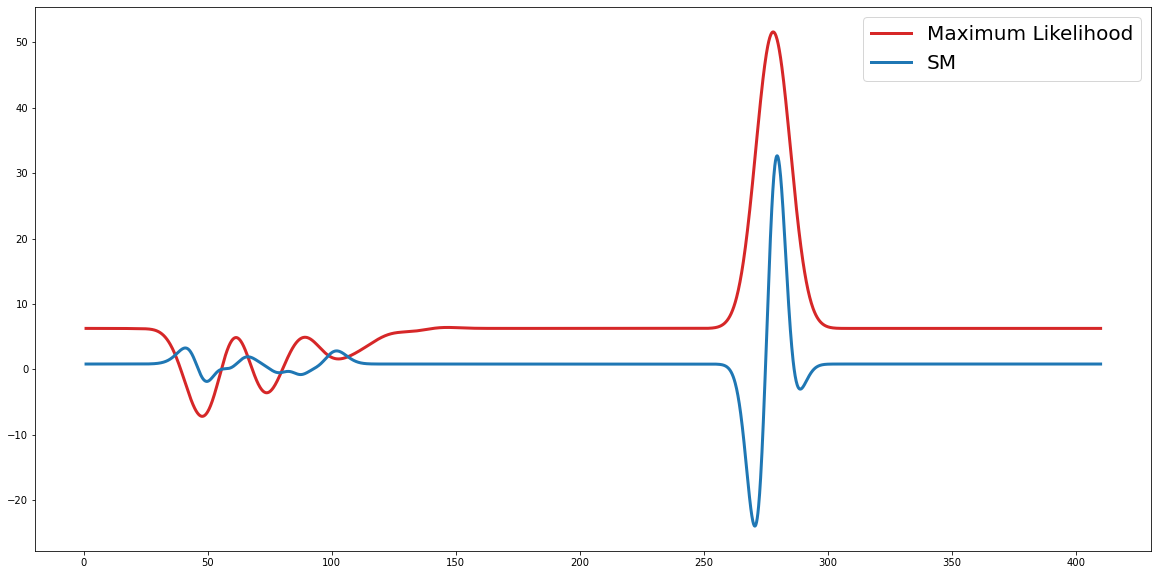

**************************************************
[282.]


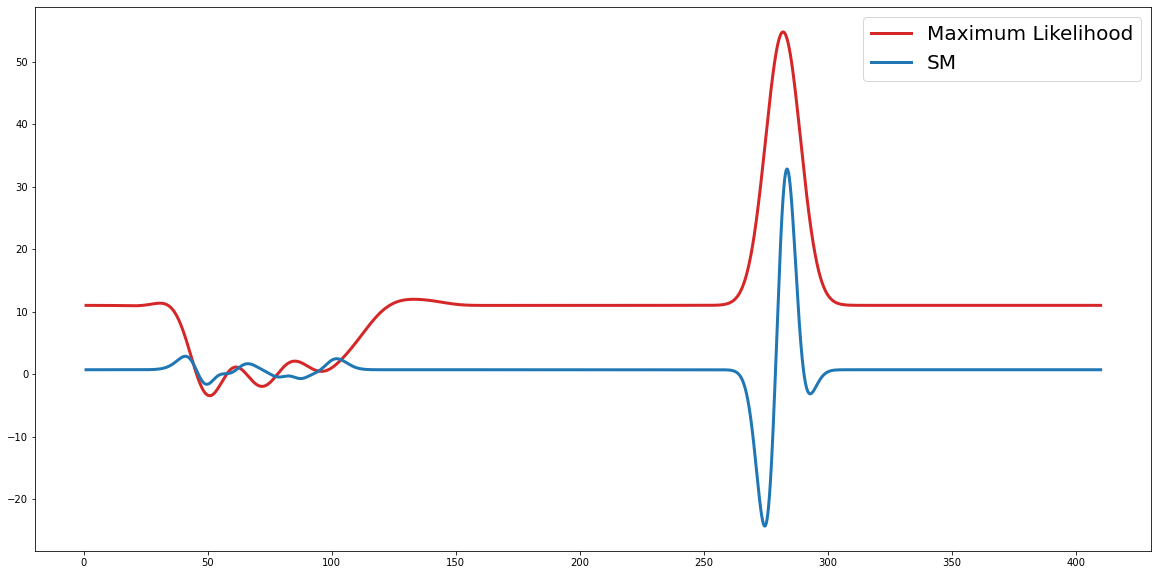

**************************************************
[286.]


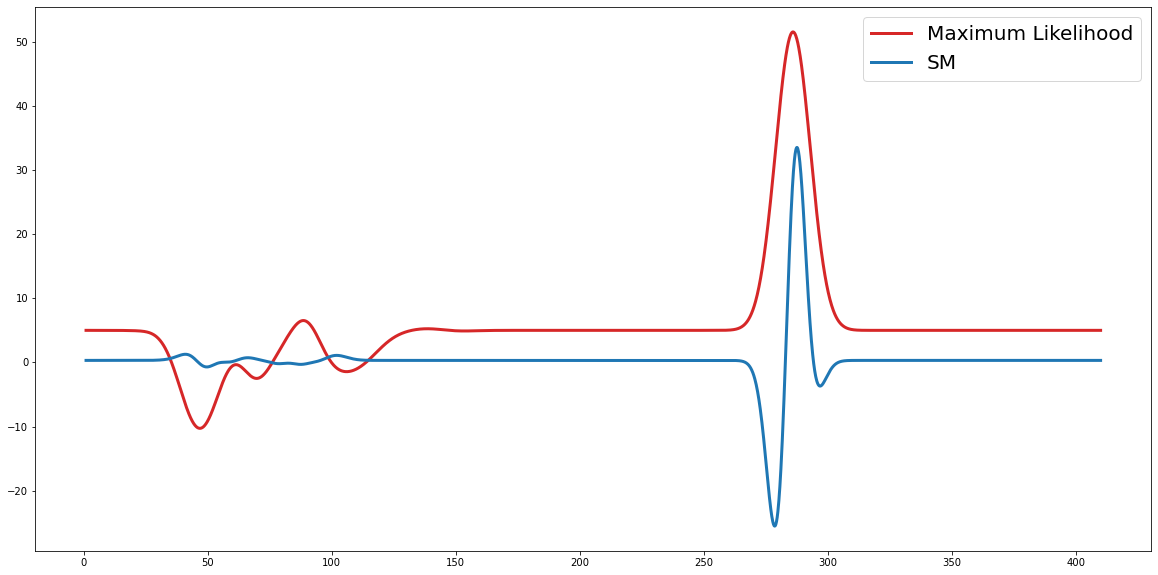

**************************************************
[290.]


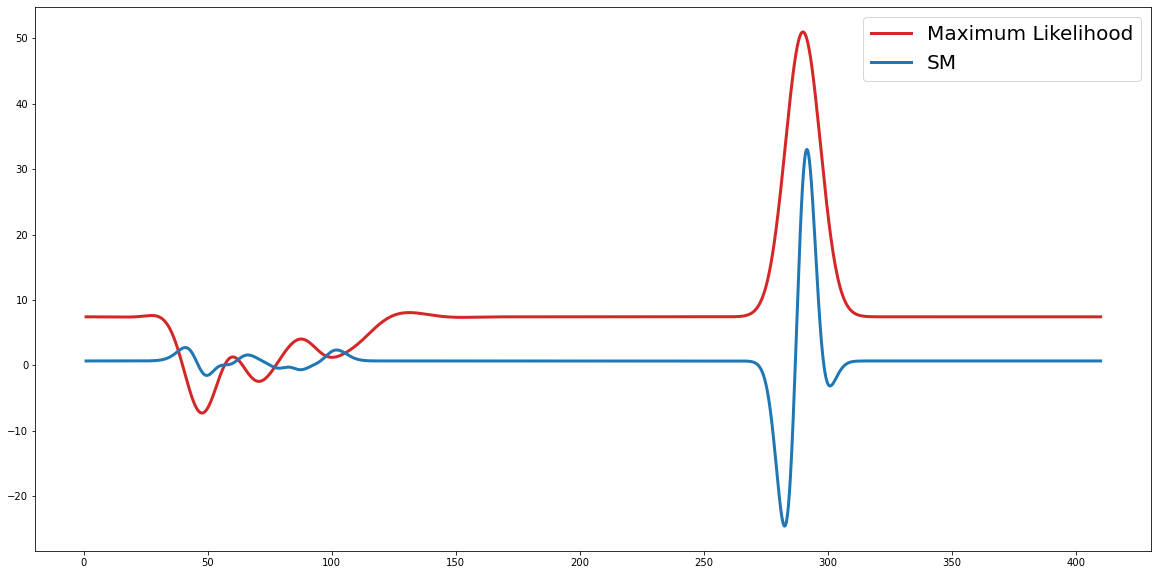

**************************************************
[294.]


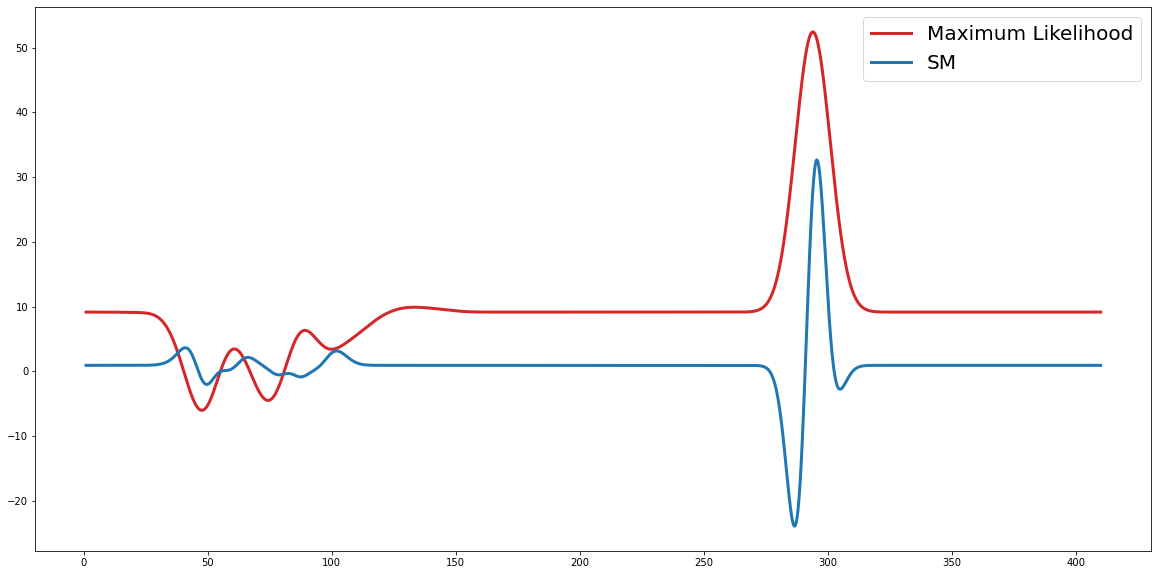

**************************************************
[298.]


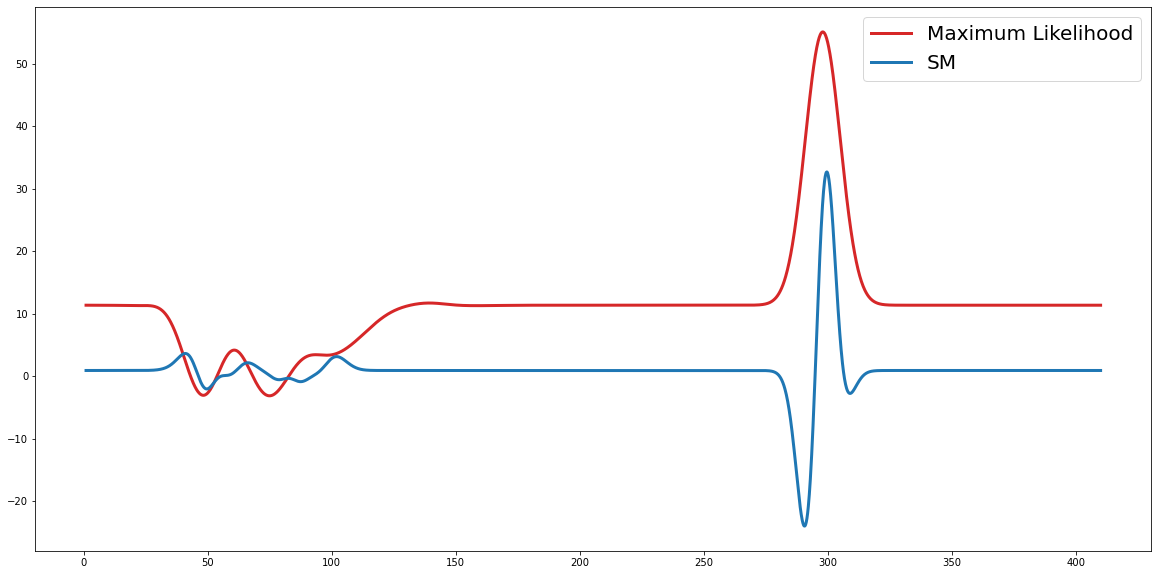

**************************************************
[302.]


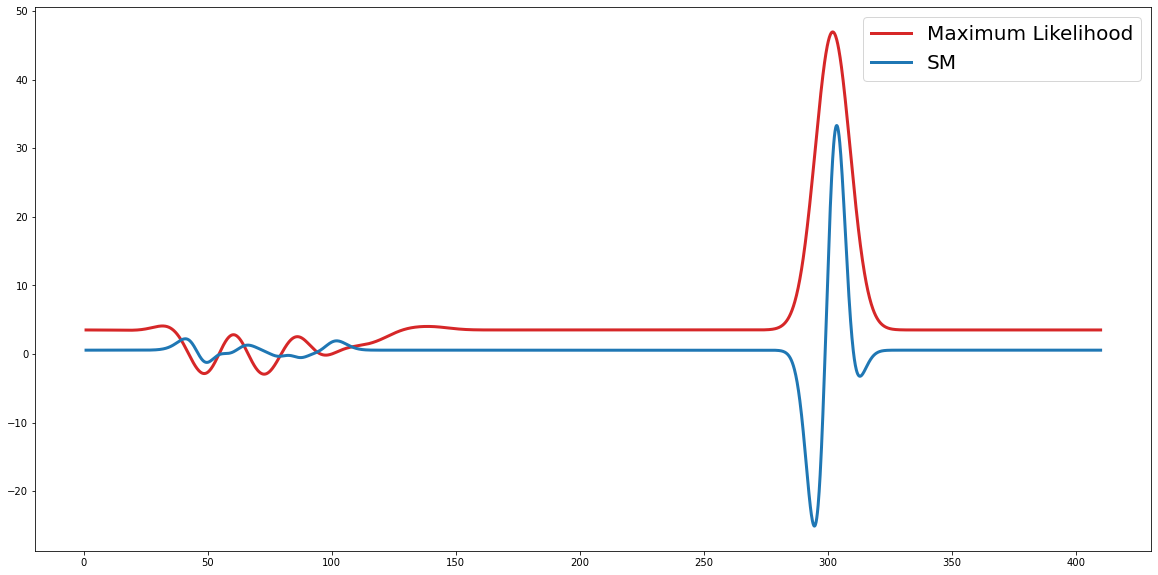

**************************************************
[306.]


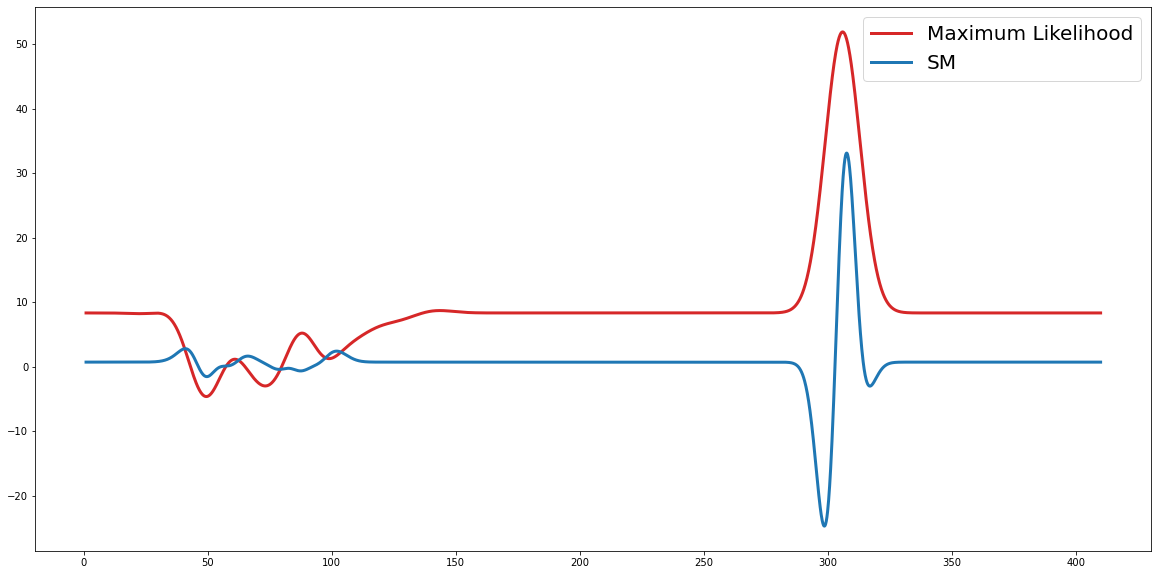

**************************************************
[310.]


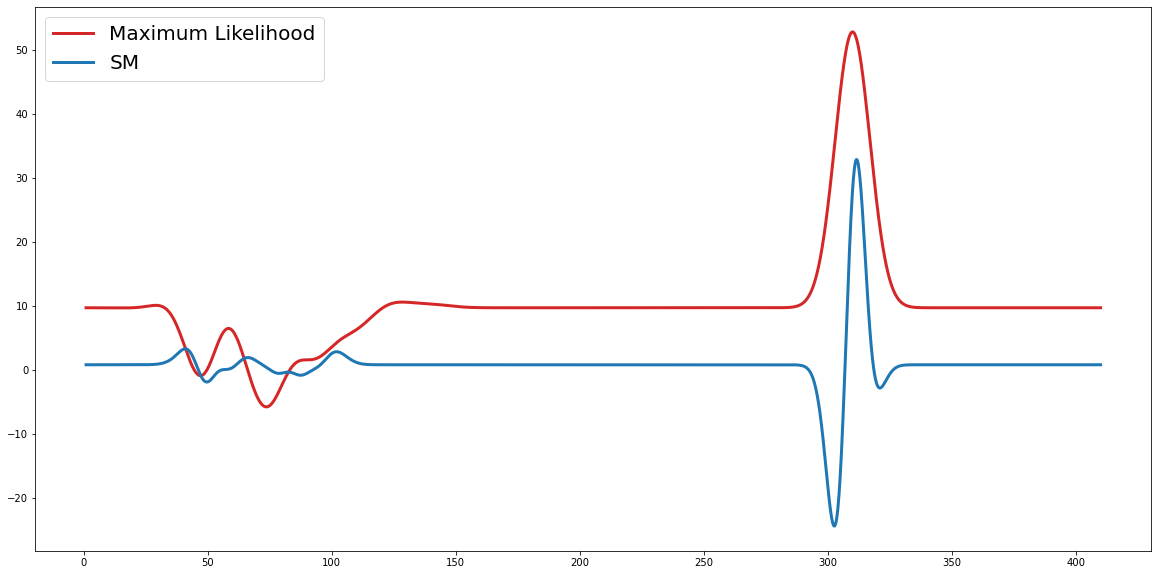

**************************************************
[314.]


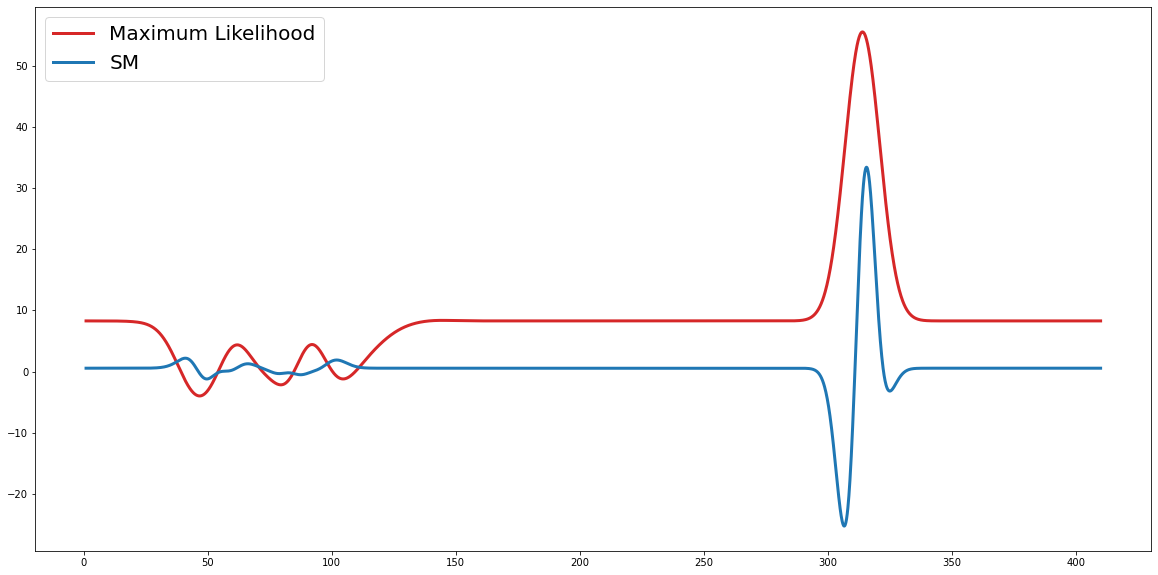

**************************************************
[318.]


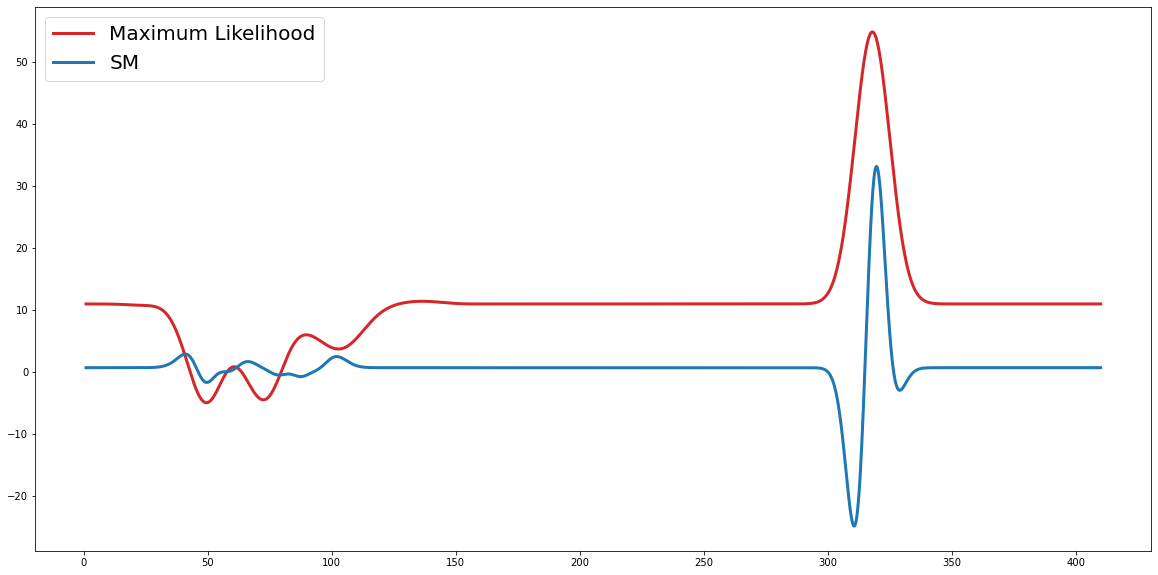

**************************************************
[322.]


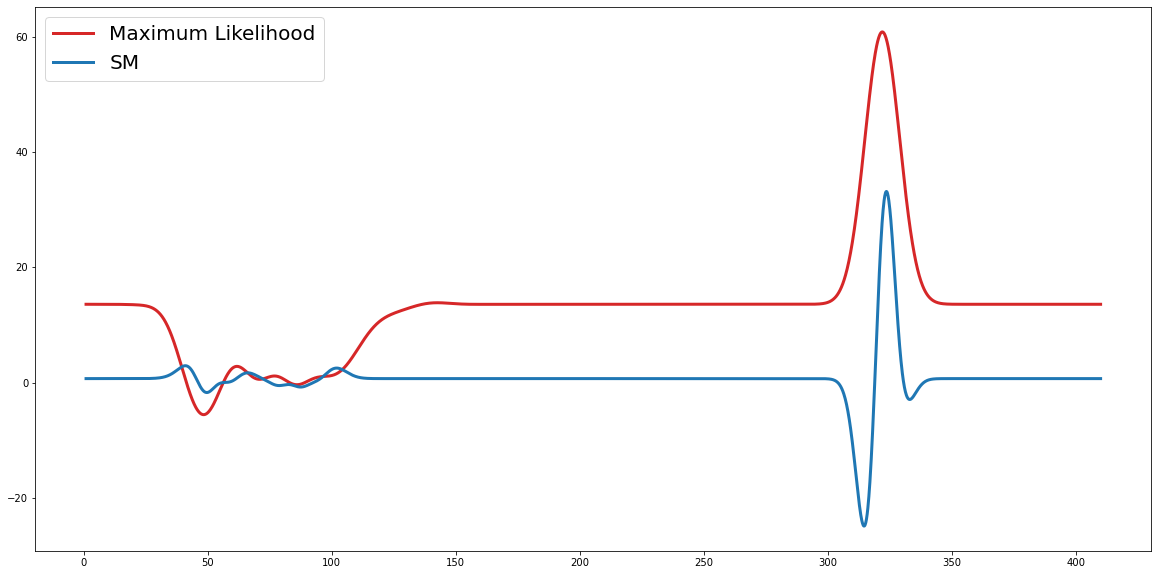

**************************************************
[326.]


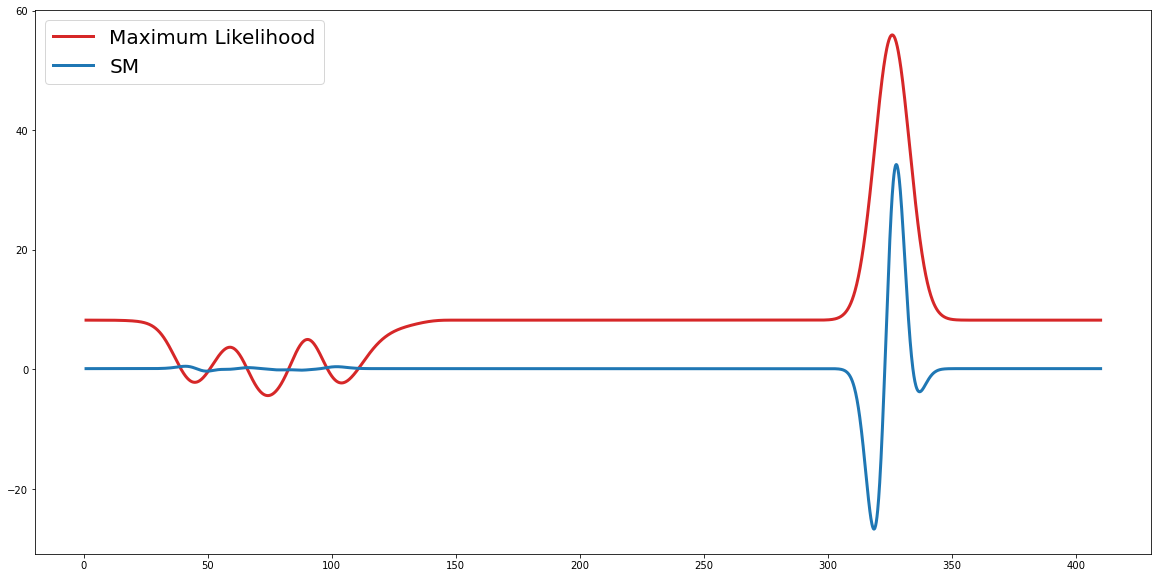

**************************************************
[330.]


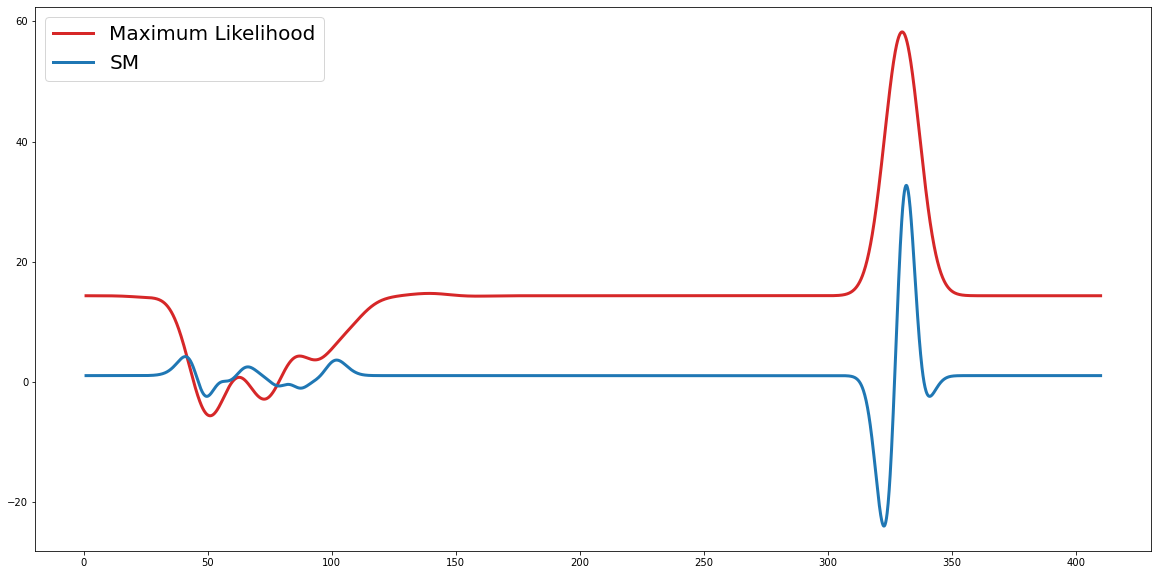

**************************************************
[334.]


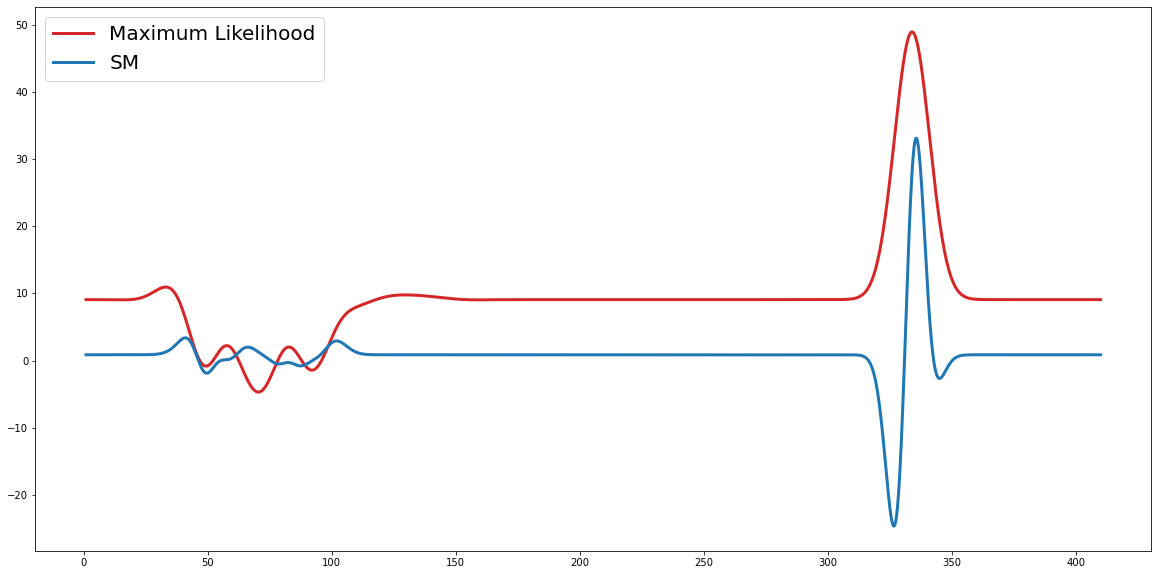

**************************************************
[338.]


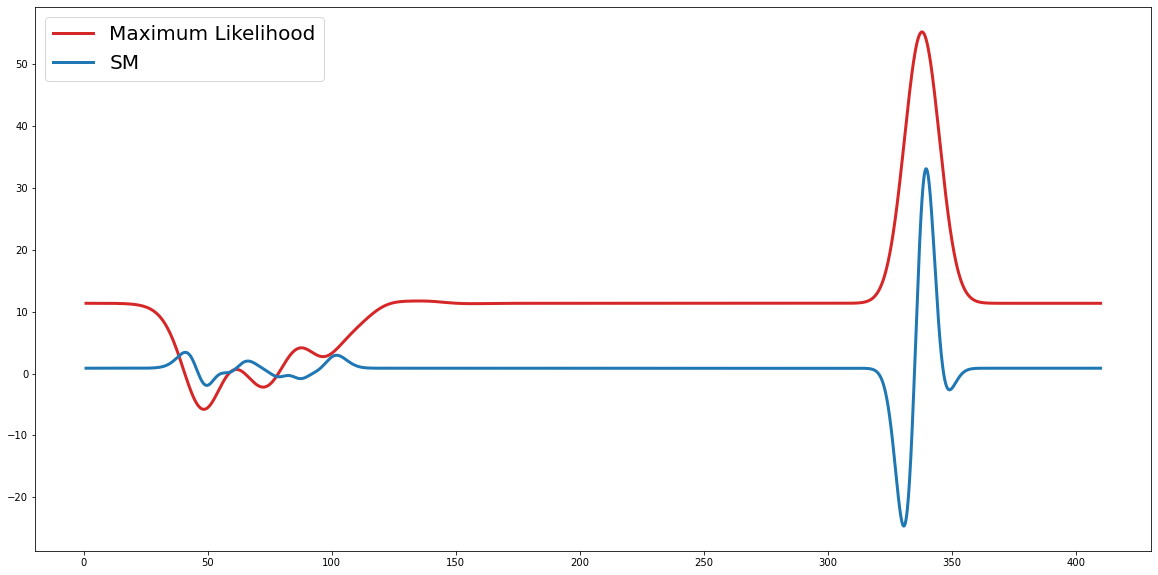

**************************************************
[342.]


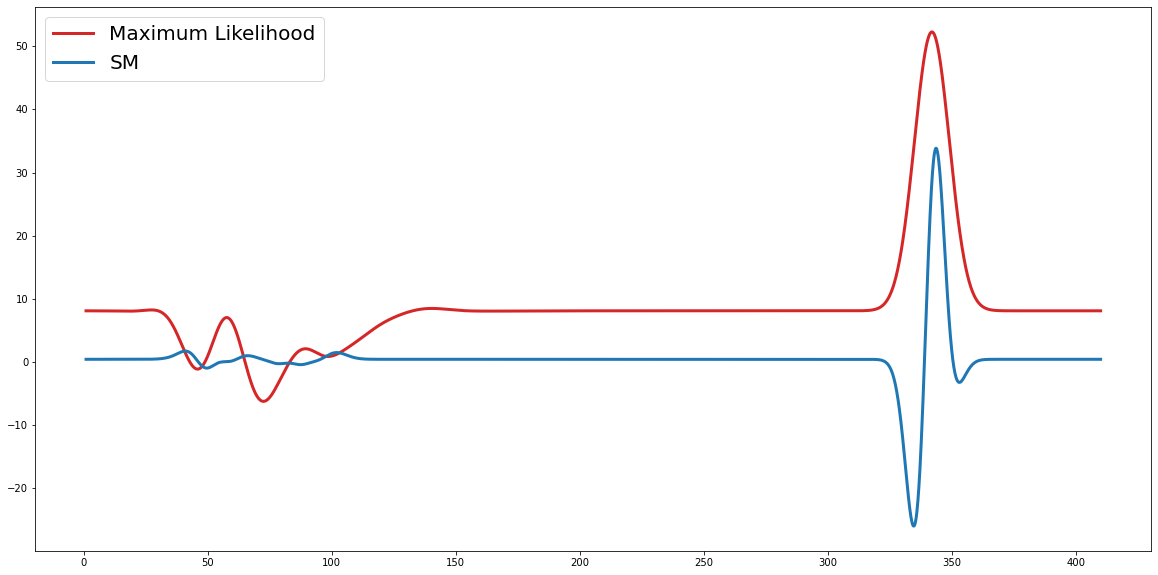

**************************************************
[346.]


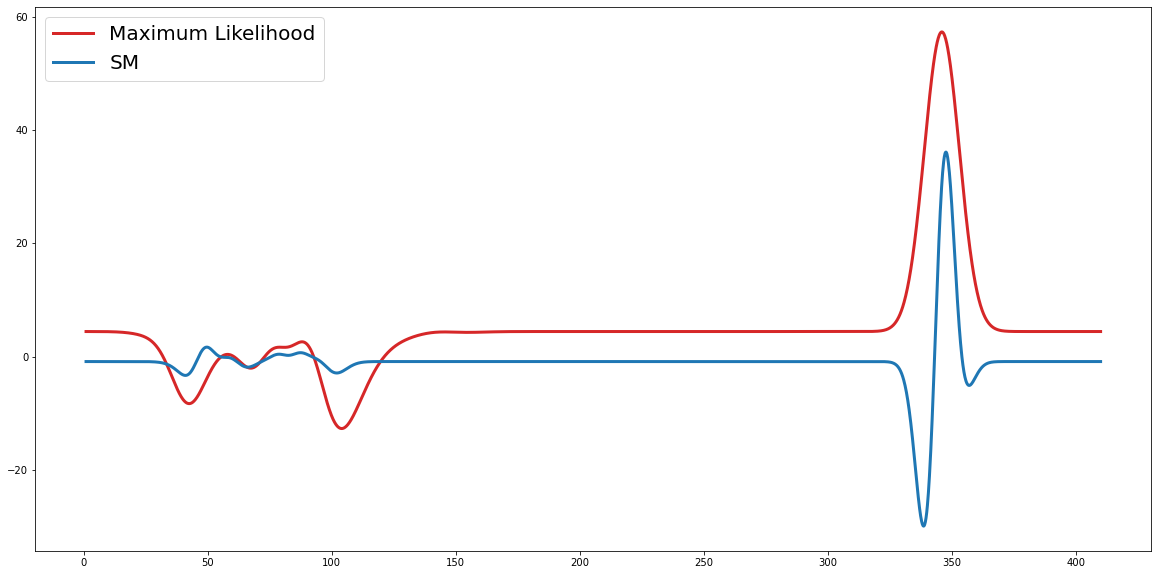

**************************************************
[350.]


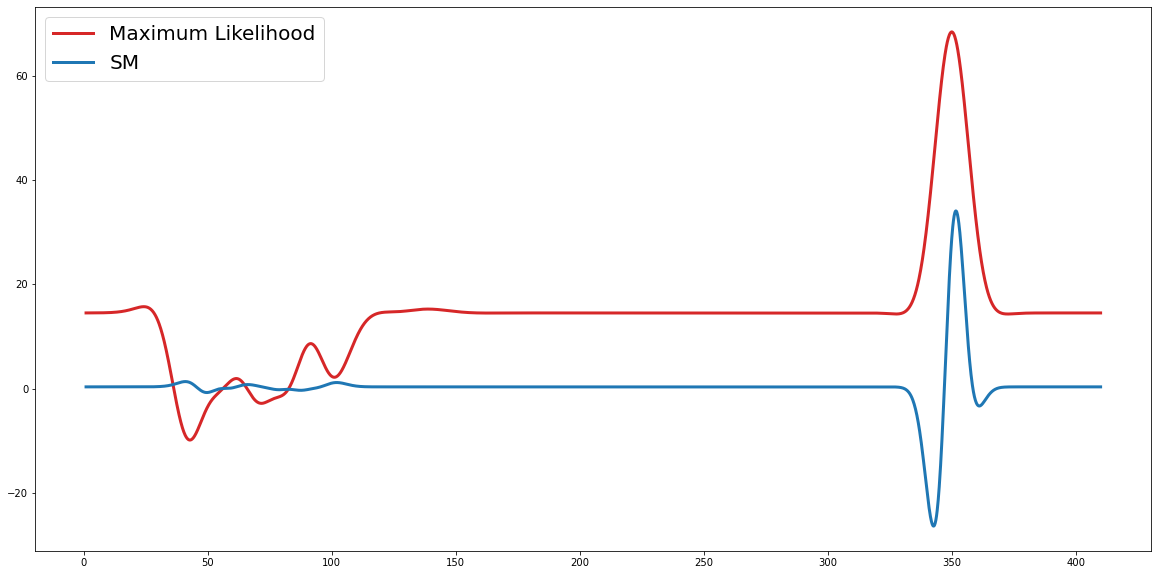

**************************************************
[354.]


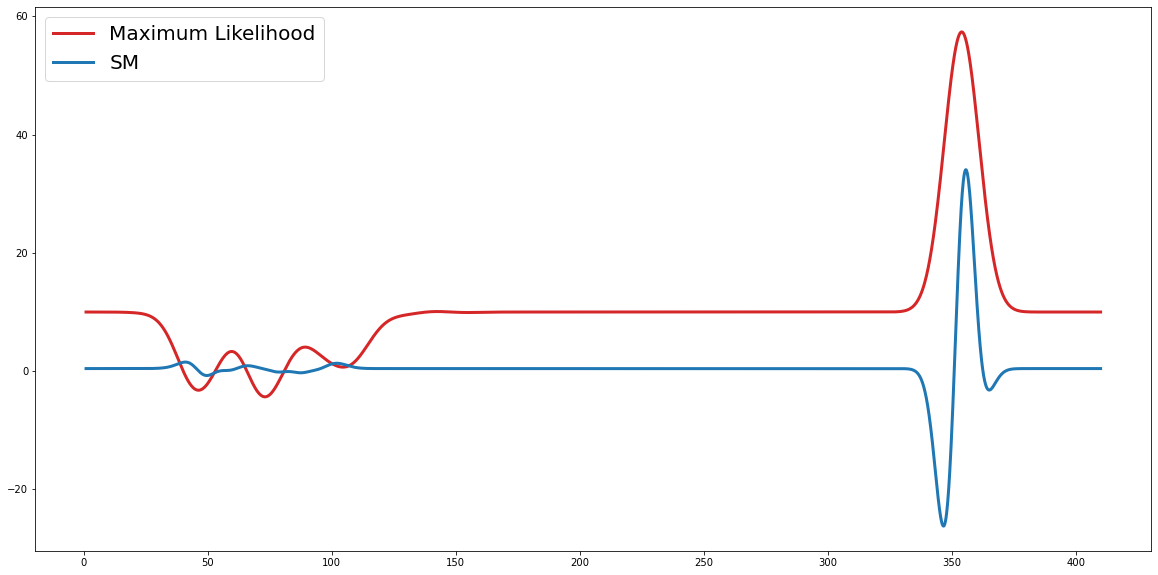

**************************************************
[358.]


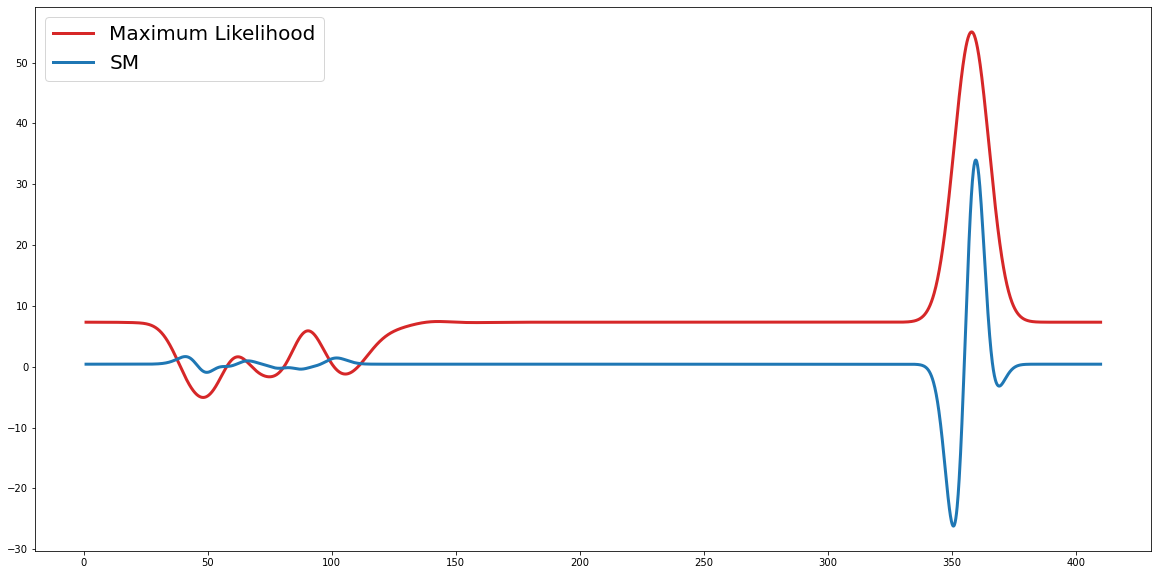

**************************************************
[362.]


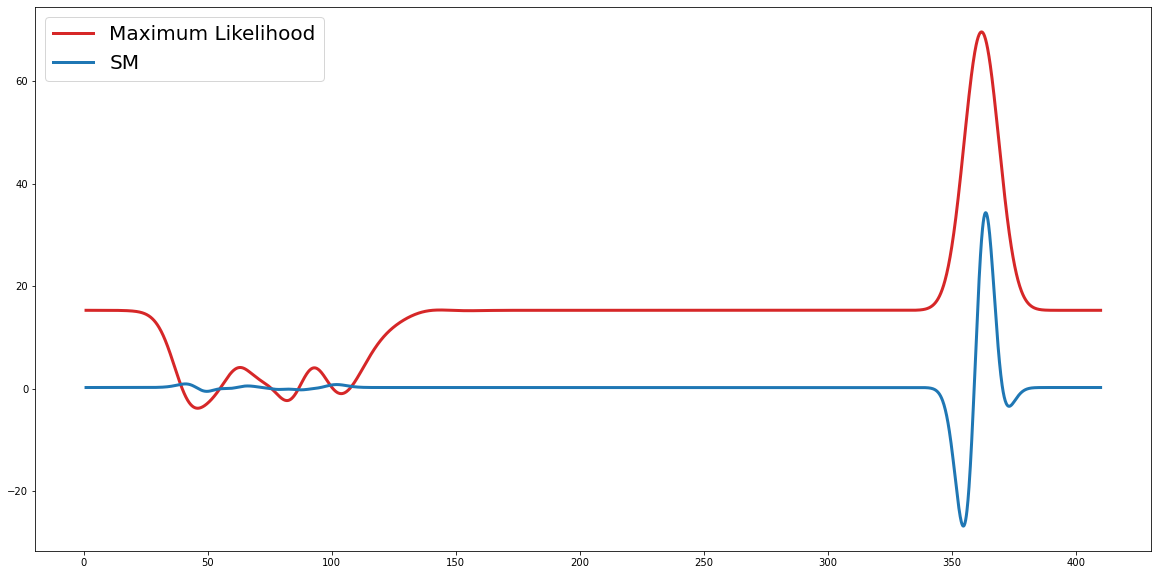

**************************************************
[366.]


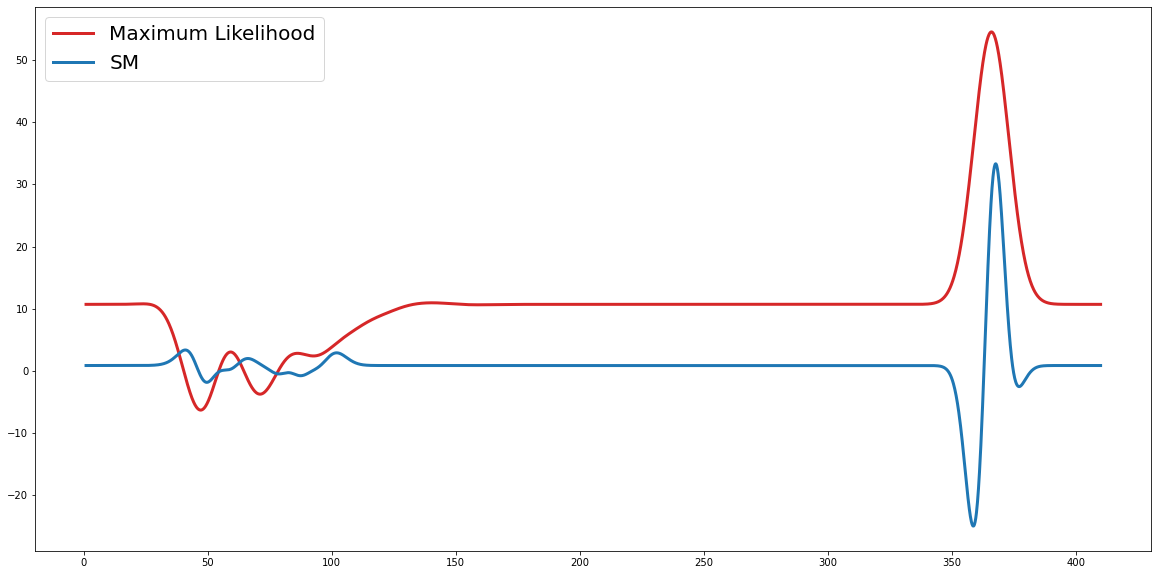

**************************************************
[370.]


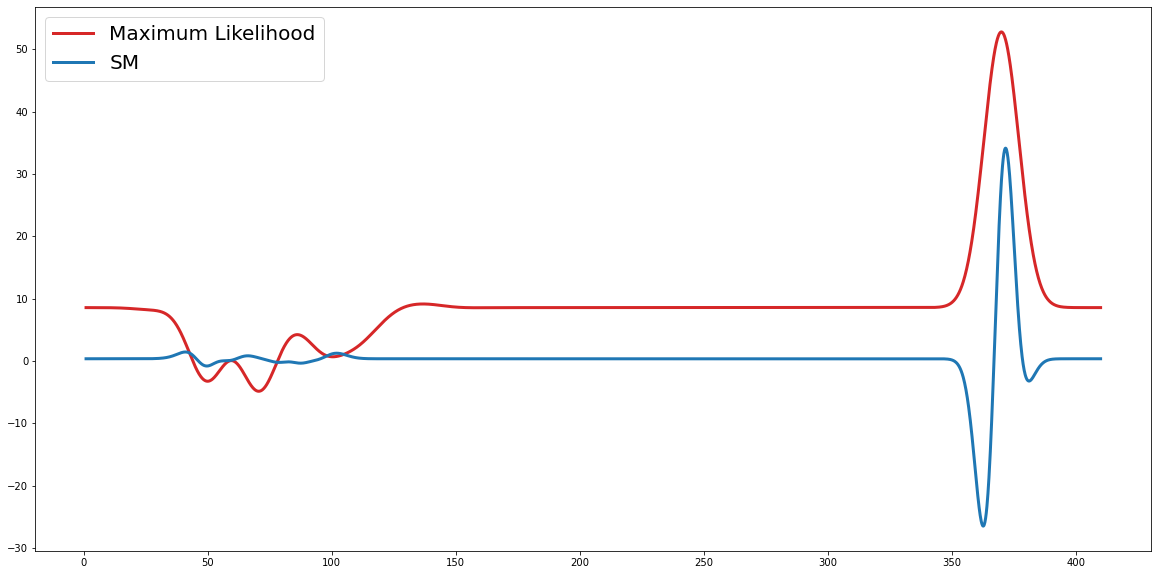

**************************************************
[374.]


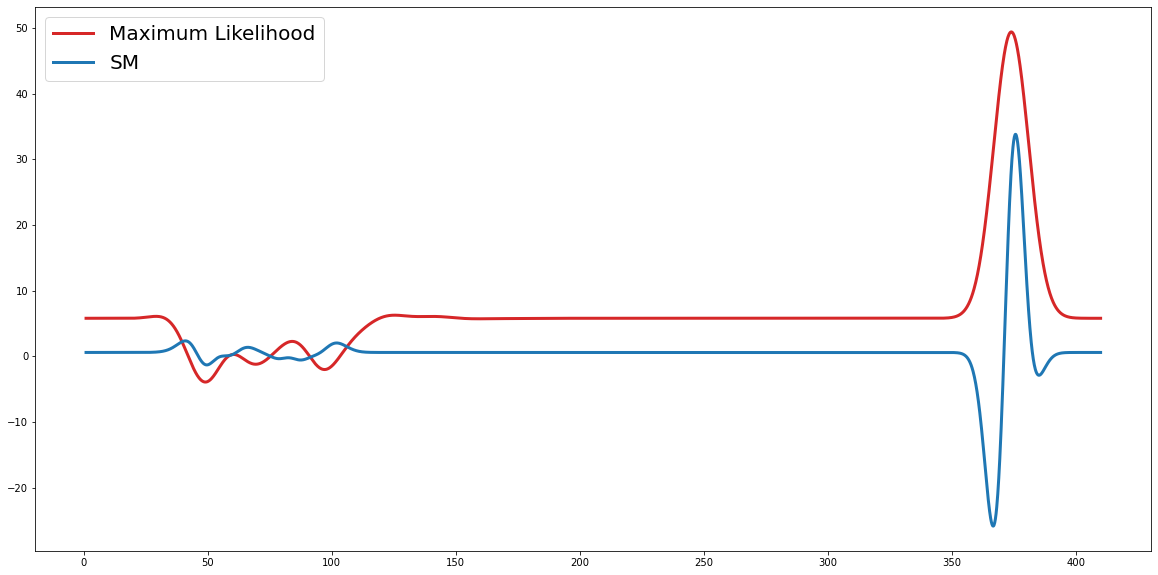

**************************************************
[378.]


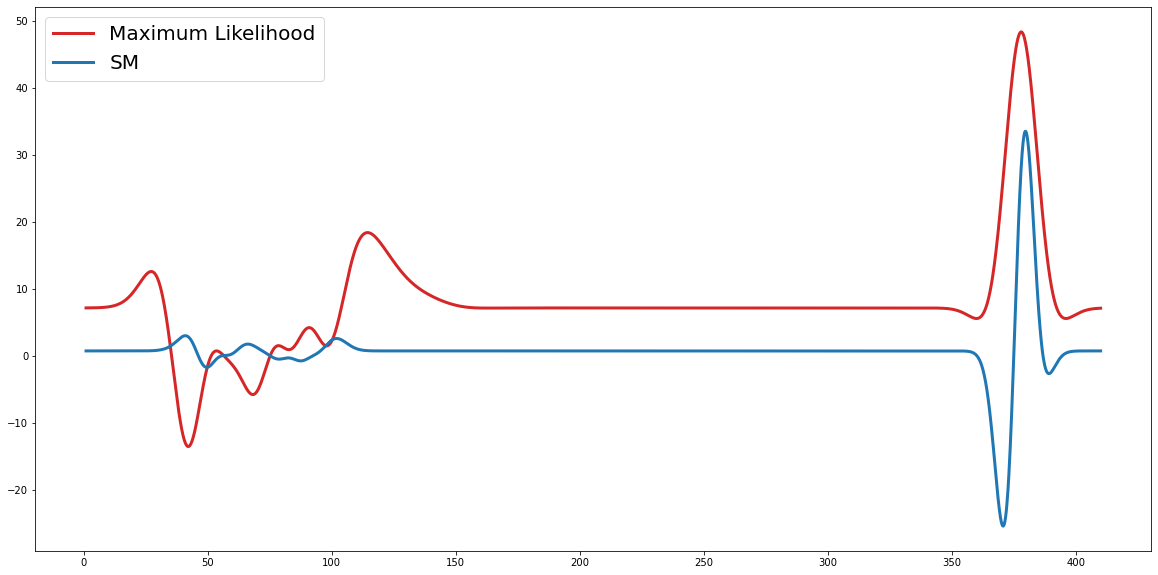

**************************************************
[382.]


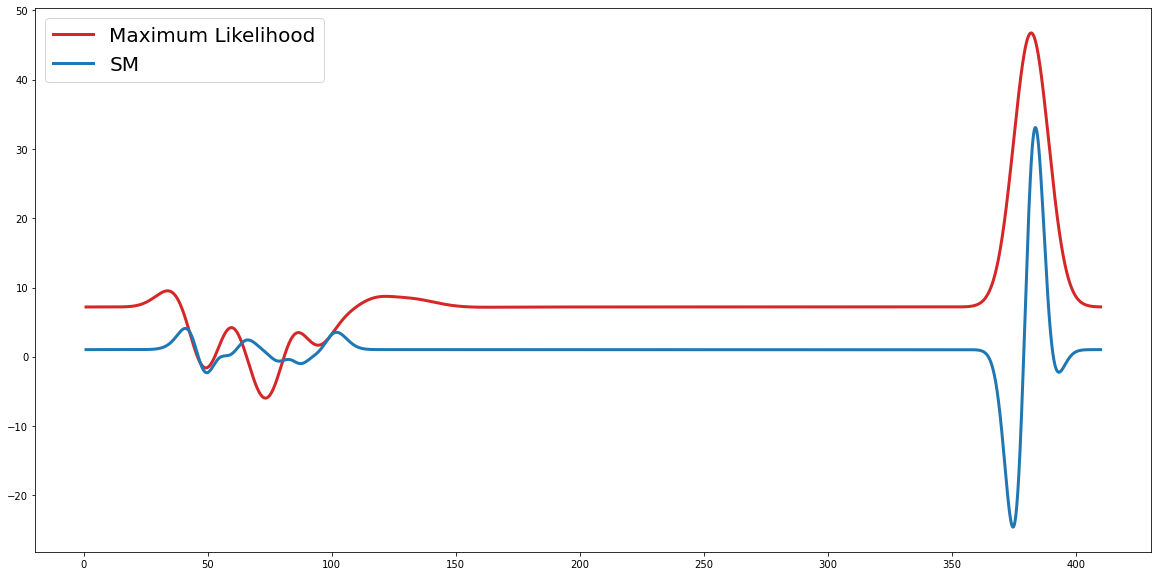

**************************************************
[386.]


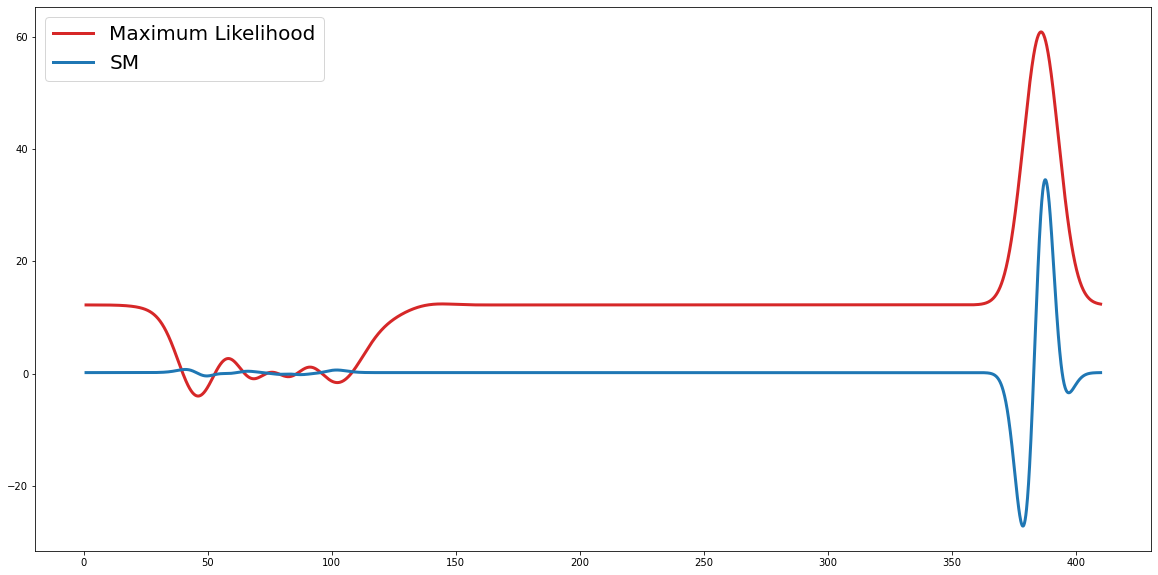

**************************************************
[390.]


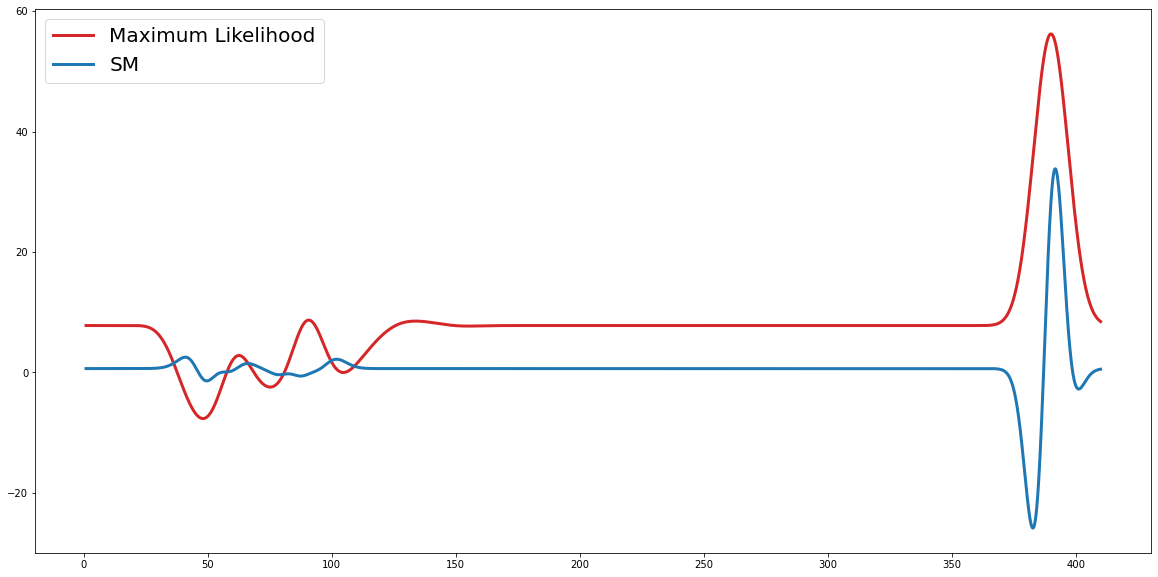

**************************************************
[394.]


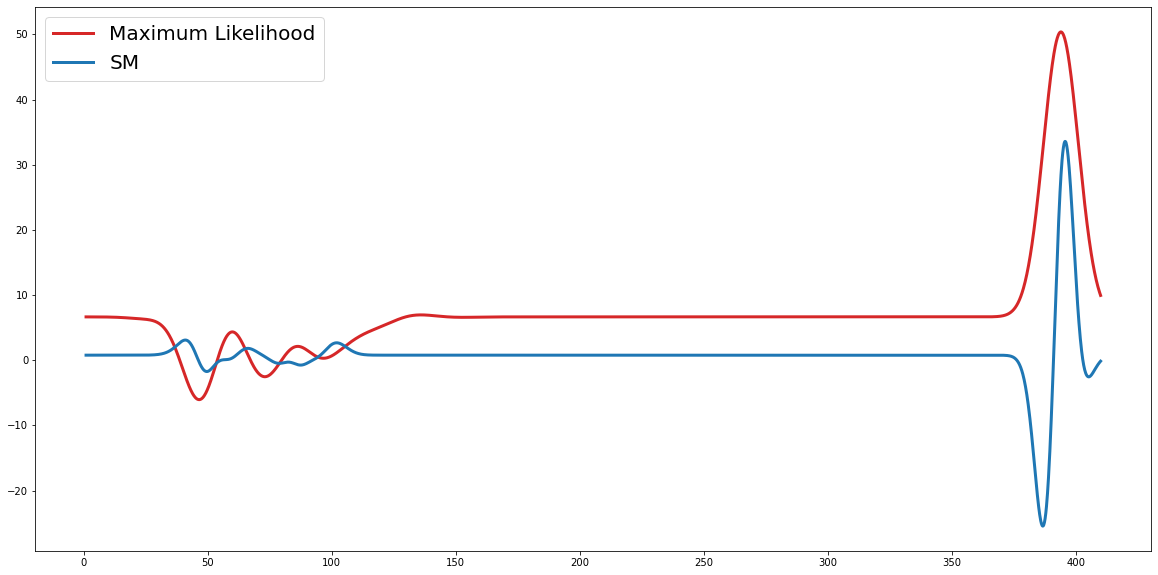

**************************************************
[398.]


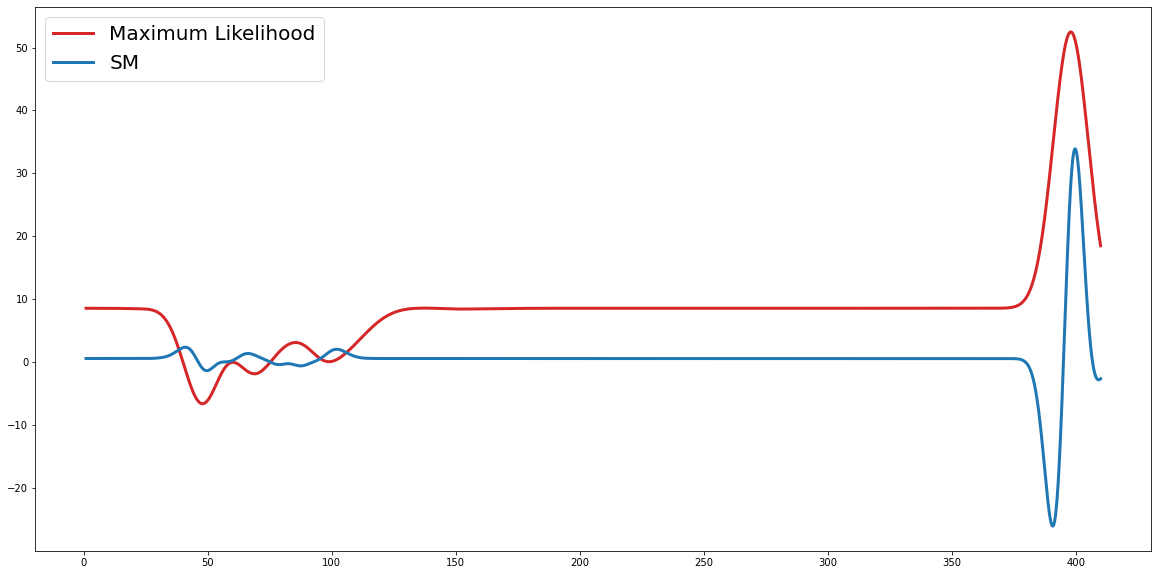

**************************************************
[402.]


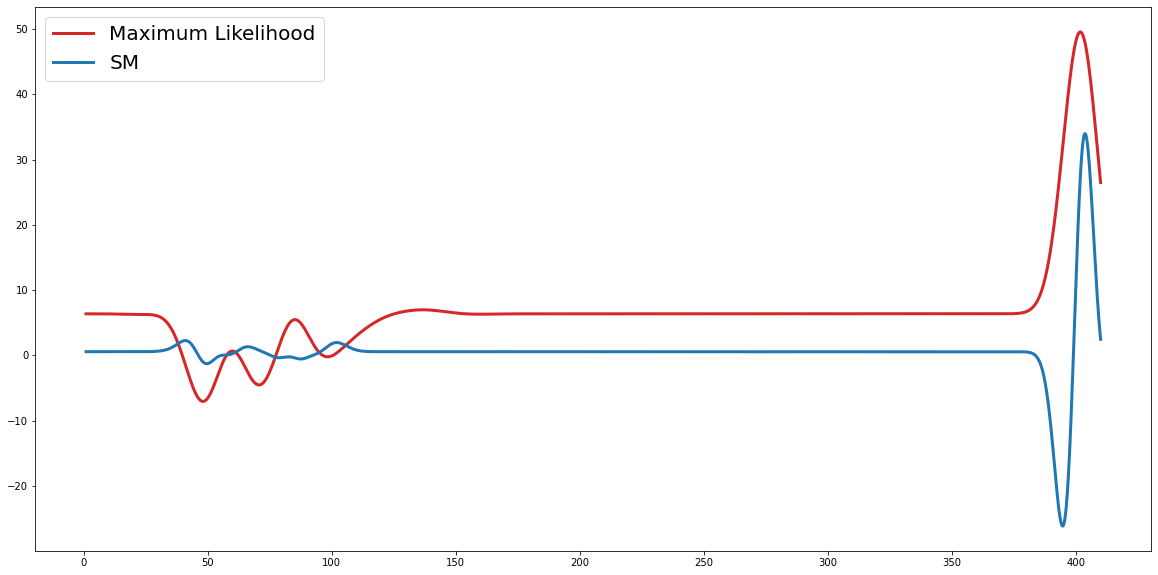

**************************************************
[406.]


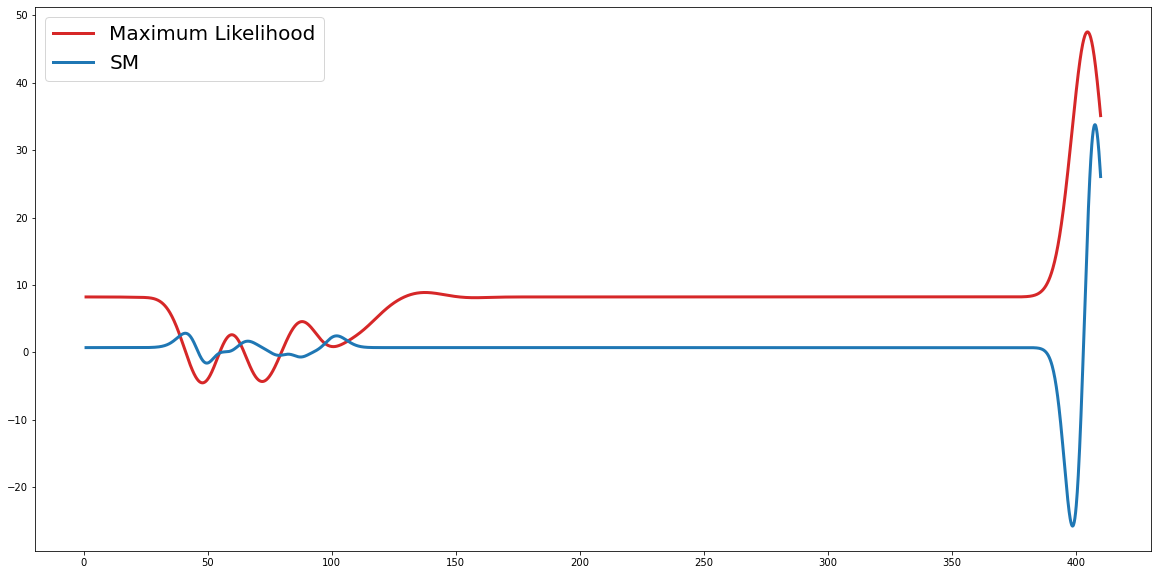

In [59]:
newx = np.linspace(1., 410., 3000)
for contam_data in contam_data_list:     
    
    print('*' *50)
    print(contam_data)
    
    # read in the ML influence function values 
    den_ml = np.load(save_dir_ml + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    den_sm = np.load(save_dir_sm + f'/contam_data={contam_data}-IF-logden-newdata.npy')
    
    plt.figure(figsize = (20, 10))

    plt.plot(newx, den_ml, color = 'tab:red', linewidth = linewidth, label = 'Maximum Likelihood')
    plt.plot(newx, den_sm, color = 'tab:blue', linewidth = linewidth, label = 'SM')
    plt.legend(fontsize = legend_fontsize)
    plt.show()


In [14]:
output_pd = pd.DataFrame(supnorm_dict)

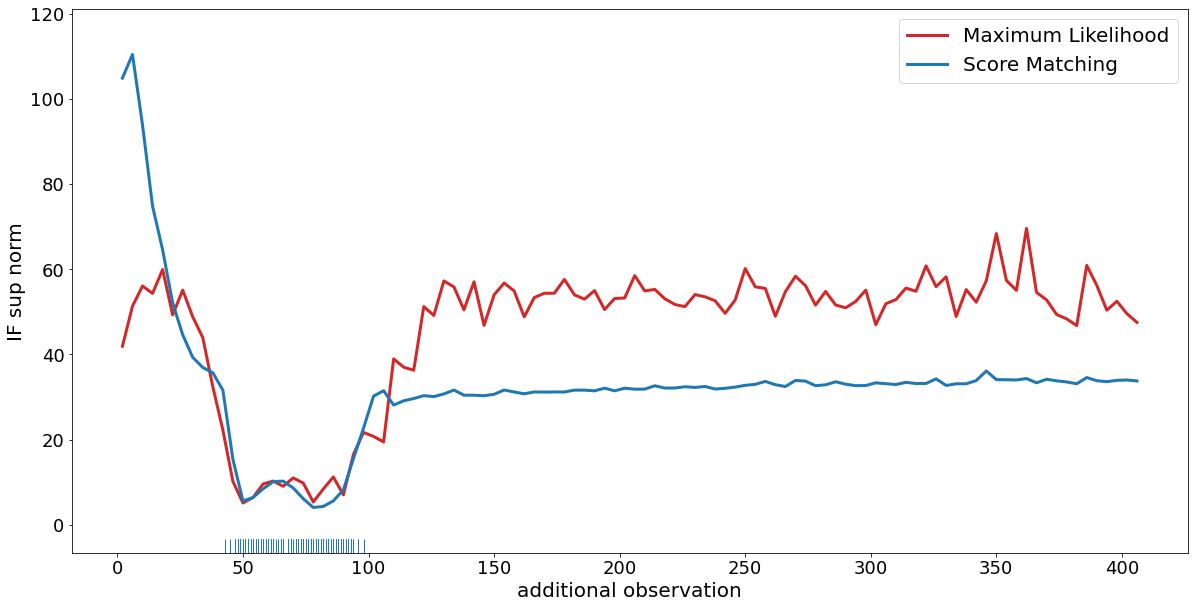

In [18]:
label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
legend_fontsize = 20
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

plt.figure(figsize = (20, 10))

plt.plot(output_pd.contam_data, output_pd.infsup_ml, color = 'tab:red', linewidth = linewidth, label = 'Maximum Likelihood')
plt.plot(output_pd.contam_data, output_pd.infsup_sm, color = 'tab:blue', linewidth = linewidth, label = 'Score Matching')
plt.legend(fontsize = legend_fontsize)

plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params('both', labelsize = tick_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.savefig('plots/ConstrainedML-CalibratedSM-IF-supnorm.pdf')
plt.show()

In [46]:
stepsize_pd = pd.DataFrame(
    {'bw': [5.0] * 3 + [7.0] * 3 + [9.0] * 3, 
     'logpen': [-8., -10., -12.] * 3, 
     'stepsize': [0.6, 1.0, 1.0, 0.4, 0.6, 0.6, 0.3, 0.4, 0.4]}
)
stepsize_pd

bw  logpen  stepsize
0  5.0    -8.0      0.50
1  5.0   -10.0      1.00
2  5.0   -12.0      1.00
3  7.0    -8.0      0.40
4  7.0   -10.0      0.60
5  7.0   -12.0      0.60
6  9.0    -8.0      0.35
7  9.0   -10.0      0.40
8  9.0   -12.0      0.40

In [48]:
# extract the supremum norm of the influence function of ML log-density 
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw_list = [5., 7., 9.]
log_pen_param_list = [-8., -10., -12.]
kernel_type = 'gaussian_poly2'
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000

output_pd_ml = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}
        stepsize = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == log_pen_param)].loc[:, 'stepsize'].item()
        
        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []
        
        dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/ML-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={0.015}-stepsize={stepsize}-seed={0}')
        
        for contam_data in contam_data_list: 
            
            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm'].append(np.max(np.abs(sub_df)))
                
        output_pd_ml = pd.concat([output_pd_ml, pd.DataFrame(sup_norm)])

output_pd_ml

bw  loglambda  contam_data  IFsupnorm
0    5.0       -8.0          2.0   5.479926
1    5.0       -8.0          6.0  10.532882
2    5.0       -8.0         10.0  28.757713
3    5.0       -8.0         14.0  42.079619
4    5.0       -8.0         18.0  42.696004
..   ...        ...          ...        ...
97   9.0      -12.0        390.0  53.655622
98   9.0      -12.0        394.0  33.499847
99   9.0      -12.0        398.0  40.994379
100  9.0      -12.0        402.0  21.394303
101  9.0      -12.0        406.0  52.021042

[918 rows x 4 columns]

In [51]:
# extract the supremum norm of the influence function of Calibrated SM log-density 
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw_list = [5., 7., 9.]
log_pen_param_list = [-8., -10., -12.]
kernel_type = 'gaussian_poly2'
contam_weight = 0.01
xlimit = (1., 410.)
plot_pts_cnt = 3000

output_pd_calism = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}
        stepsize = stepsize_pd[(stepsize_pd.bw == bw) & (stepsize_pd.logpen == log_pen_param)].loc[:, 'stepsize'].item()
        
        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['IFsupnorm'] = []
        
        dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={0.015}-stepsize={stepsize}-seed={0}')
        
        for contam_data in contam_data_list: 
            
            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['IFsupnorm'].append(np.max(np.abs(sub_df)))
                
        output_pd_calism = pd.concat([output_pd_calism, pd.DataFrame(sup_norm)])

output_pd_calism

bw  loglambda  contam_data   IFsupnorm
0    5.0       -8.0          2.0   96.277585
1    5.0       -8.0          6.0  102.578957
2    5.0       -8.0         10.0   92.023892
3    5.0       -8.0         14.0   79.597316
4    5.0       -8.0         18.0   65.744466
..   ...        ...          ...         ...
97   9.0      -12.0        390.0   46.949855
98   9.0      -12.0        394.0   37.887254
99   9.0      -12.0        398.0   41.327427
100  9.0      -12.0        402.0   31.562655
101  9.0      -12.0        406.0   47.084153

[918 rows x 4 columns]

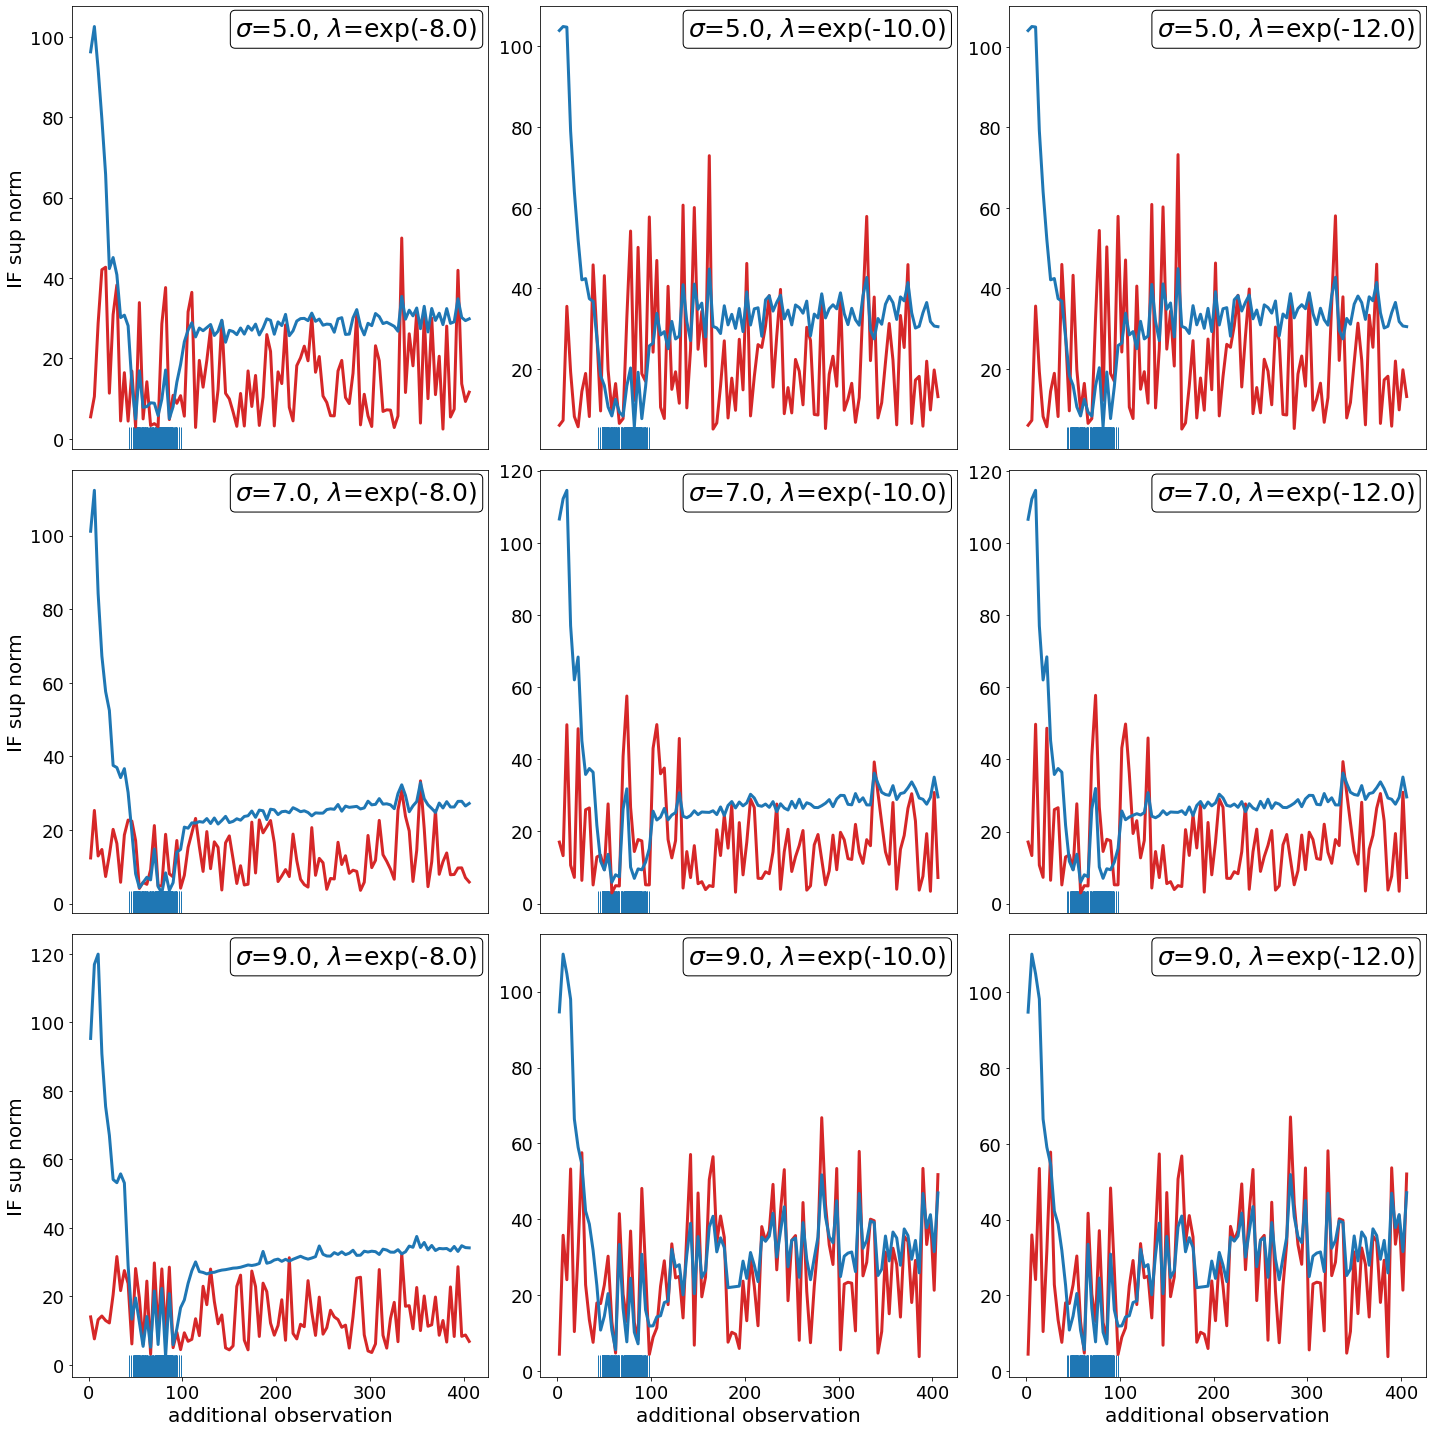

In [58]:
fig = plt.figure(constrained_layout=False)
fig.set_figheight(20)
fig.set_figwidth(20)
ncols = 3
nrows = 3

label_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'

spec = gridspec.GridSpec(ncols=ncols, nrows=nrows, figure=fig)

for i in range(nrows): 
    for j in range(ncols): 
        
        ax = fig.add_subplot(spec[i, j])
        bw, log_pen_param = bw_list[i], log_pen_param_list[j]
        
        subdf_ml = output_pd_ml[(output_pd_ml.bw == bw_list[i]) & (output_pd_ml.loglambda == log_pen_param_list[j])]
        subdf_calism = output_pd_calism[(output_pd_calism.bw == bw_list[i]) & (output_pd_calism.loglambda == log_pen_param_list[j])]

        ax.plot(subdf_ml.contam_data, subdf_ml.IFsupnorm, color = 'tab:red', linestyle = 'solid', linewidth = linewidth, label = 'Maximum Likelihood')
        ax.plot(subdf_calism.contam_data, subdf_calism.IFsupnorm, color = 'tab:blue', linestyle = 'solid', linewidth = linewidth, label = 'Score Matching')
        sns.rugplot(data_waiting.flatten(), ax = ax, color = 'tab:blue')
        
        if i == nrows - 1: 
            ax.set_xlabel(x_label, fontsize = label_fontsize)
        else: 
            ax.set_xticks([])
        if j == 0: 
            ax.set_ylabel(y_label, fontsize = label_fontsize)
        
        ax.tick_params(axis = 'both', labelsize = tick_fontsize)

        info = r"$\sigma$={bw}, $\lambda$=exp({pen})".format(bw = bw_list[i], pen = log_pen_param_list[j])
        ax.text(0.975, 0.98,
                info,
                fontsize = info_fontsize,
                multialignment = 'left',
                horizontalalignment = 'right',
                verticalalignment = 'top',
                transform = ax.transAxes,
                bbox = {'facecolor': 'none',
                        'boxstyle': 'Round, pad=0.2'})

plt.tight_layout()
plt.savefig(f'plots/ML-CaliSM-geyser-waiting-logdensity-IF-supnorm-contamweight={contam_weight}.pdf')

### Averaged Results 

In [2]:
# Method 1 - first compute sup-norm, then average 
os.chdir('/Users/chenxizhou/Dropbox/code_package/IFlogdensity')

true_data = np.load('data/geyser.npy').astype(np.float64)
df = copy.deepcopy(true_data[:, 0]).reshape(-1, 1)
data_waiting = df[df != 108.0]

xlimit = (1., 410.) 
plot_pts_cnt = 3000
newx = np.linspace(xlimit[0], xlimit[1], plot_pts_cnt)

In [3]:
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)
bw = 5.
log_pen_param = -10.
kernel_type = 'gaussian_poly2'
contam_weight = 1e-2
xlimit = (1., 410.)
plot_pts_cnt = 3000
abstol = 0.015
random_seed_list = [0, 1, 9, 8, 7, 1119, 1120, 1121, 2000, 2010]

In [5]:
for seed in random_seed_list: 
        
    dir_name = (f'data/CalibratedSM-basisn=205-bw={bw}-' + 
                f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-stepsize={1.0}-abstol={abstol}-seed={seed}')

    if seed == 0: 
        
        result = np.load(dir_name + f'/uncontam-logden-newdata.npy')

    else: 

        result += np.load(dir_name + f'/uncontam-logden-newdata.npy')

result /= len(random_seed_list)

In [7]:
dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-stepsize={1.0}-AVG')
np.save(dir_name + '/uncontam-logden-newdata.npy', result)

In [8]:
contam_data_list = np.arange(2., 410., 4).reshape(-1, 1)

for contam_data in contam_data_list: 

    for seed in random_seed_list: 
        
        dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-stepsize={1.0}-abstol={abstol}-seed={seed}')

        if seed == 0: 

            result = np.load(dir_name + f'/contam_data={contam_data}-contam-logden-newdata.npy')

        else: 

            result += np.load(dir_name + f'/contam_data={contam_data}-contam-logden-newdata.npy')

    result /= len(random_seed_list)
    
    dir_name1 = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
                 f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                 f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-stepsize={1.0}-AVG')
    
    np.save(dir_name1 + f'/contam_data={contam_data}-contam-logden-newdata', result)

In [9]:
# compute the influence function 
dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-stepsize={1.0}-AVG')

uncontam_result = np.load(dir_name + f'/uncontam-logden-newdata.npy')
for contam_data in contam_data_list: 
    
    contam_result = np.load(dir_name + f'/contam_data={contam_data}-contam-logden-newdata.npy')
    
    IF_result = (contam_result - uncontam_result) / contam_weight
    
    np.save(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy', IF_result)

In [11]:
# compute supnorm of averaged SM log density 
bw_list = [5.0]
log_pen_param_list = [-10.0]
output_pd1 = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 

        sup_norm = {}

        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['SM_IFsupnorm'] = []

        dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
                    f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                    f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-abstol={abstol}-stepsize={1.0}-AVG')

        for contam_data in contam_data_list: 

            sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
            sup_norm['SM_IFsupnorm'].append(np.max(np.abs(sub_df)))    

        output_pd1 = pd.concat([output_pd1, pd.DataFrame(sup_norm)])

# output_pd1.sort_values(['contam_data'], inplace = True)
output_pd1

bw  loglambda  contam_data  SM_IFsupnorm
0    5.0      -10.0          2.0    110.790763
1    5.0      -10.0          6.0    113.019545
2    5.0      -10.0         10.0    103.628901
3    5.0      -10.0         14.0     77.624910
4    5.0      -10.0         18.0     66.132795
..   ...        ...          ...           ...
97   5.0      -10.0        390.0     39.216326
98   5.0      -10.0        394.0     39.345060
99   5.0      -10.0        398.0     37.082735
100  5.0      -10.0        402.0     36.745112
101  5.0      -10.0        406.0     37.281737

[102 rows x 4 columns]

In [12]:
# output_pd1.to_csv('data/CalibratedSM-IF-avg-logden-first.csv')

In [35]:
avg_IF_ML = pd.read_csv('data/ML-IF-avg-logden-first.csv')
avg_IF_SM = pd.read_csv('data/CalibratedSM-IF-avg-logden-first.csv')

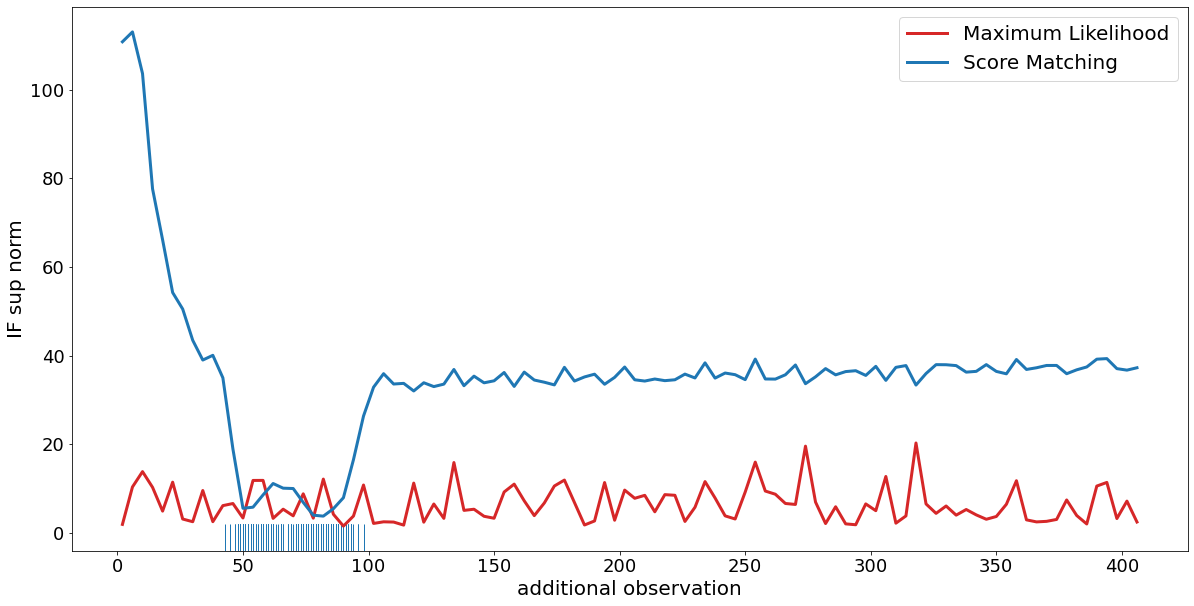

In [36]:
label_fontsize = 20
legend_fontsize = 20
info_fontsize = 25
tick_fontsize = 18
linewidth = 3.0
x_label = 'additional observation'
y_label = 'IF sup norm'


plt.figure(figsize = (20, 10))
plt.plot(avg_IF_ML.contam_data, avg_IF_ML.IFsupnorm, color = 'tab:red', linewidth = linewidth, label = 'Maximum Likelihood')
plt.plot(avg_IF_SM.contam_data, avg_IF_SM.SM_IFsupnorm, color = 'tab:blue', linewidth = linewidth, label = 'Score Matching')
plt.legend(fontsize = legend_fontsize)

plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params('both', labelsize = tick_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.savefig('plots/ML-SM-IF-supnorm-avg-logden-first.pdf')
plt.show()

In [23]:
# Method 2 - Average the IF supnorms directly 
bw_list = [5.0]
log_pen_param_list = [-10.0]
output_pd2 = pd.DataFrame()

for bw in bw_list: 
    for log_pen_param in log_pen_param_list: 
        
        sup_norm = {}

        sup_norm['bw'] = [bw] * len(contam_data_list)
        sup_norm['loglambda'] = [log_pen_param] * len(contam_data_list)
        sup_norm['contam_data'] = contam_data_list.flatten()
        sup_norm['SM_IFsupnorm'] = []
        
        for contam_data in contam_data_list: 
            
            result = 0
            for seed in random_seed_list: 
                
                dir_name = (f'/Users/chenxizhou/Dropbox/code_package/IFlogdensity/data/CalibratedSM-basisn=205-bw={bw}-' + 
                            f'kernel={kernel_type}-loglambda={log_pen_param}-contamweight={contam_weight}-' + 
                            f'plotdomain={xlimit}-plotcnts={plot_pts_cnt}-stepsize={1.0}-abstol={abstol}-seed={seed}')
                sub_df = np.load(dir_name + f'/contam_data={contam_data}-IF-logden-newdata.npy')
                result += np.max(np.abs(sub_df))
                
            sup_norm['SM_IFsupnorm'].append(result / len(random_seed_list))
        
        output_pd2 = pd.concat([output_pd2, pd.DataFrame(sup_norm)])

# output_pd2.sort_values(['contam_data'], inplace = True)
output_pd2

bw  loglambda  contam_data  SM_IFsupnorm
0    5.0      -10.0          2.0    110.790763
1    5.0      -10.0          6.0    113.019545
2    5.0      -10.0         10.0    103.628901
3    5.0      -10.0         14.0     77.630018
4    5.0      -10.0         18.0     66.317820
..   ...        ...          ...           ...
97   5.0      -10.0        390.0     39.226438
98   5.0      -10.0        394.0     39.351445
99   5.0      -10.0        398.0     37.089776
100  5.0      -10.0        402.0     36.758404
101  5.0      -10.0        406.0     37.290637

[102 rows x 4 columns]

In [24]:
output_pd2.to_csv(f'data/CalibratedSM-avg-IFsupnorm-contamweight={contam_weight}.csv')

In [26]:
avg_IFsupnorm_ML = pd.read_csv('data/ML-averaged-IF-supnorms.csv')
avg_IFsupnorm_SM = pd.read_csv(f'data/CalibratedSM-avg-IFsupnorm-contamweight={contam_weight}.csv')

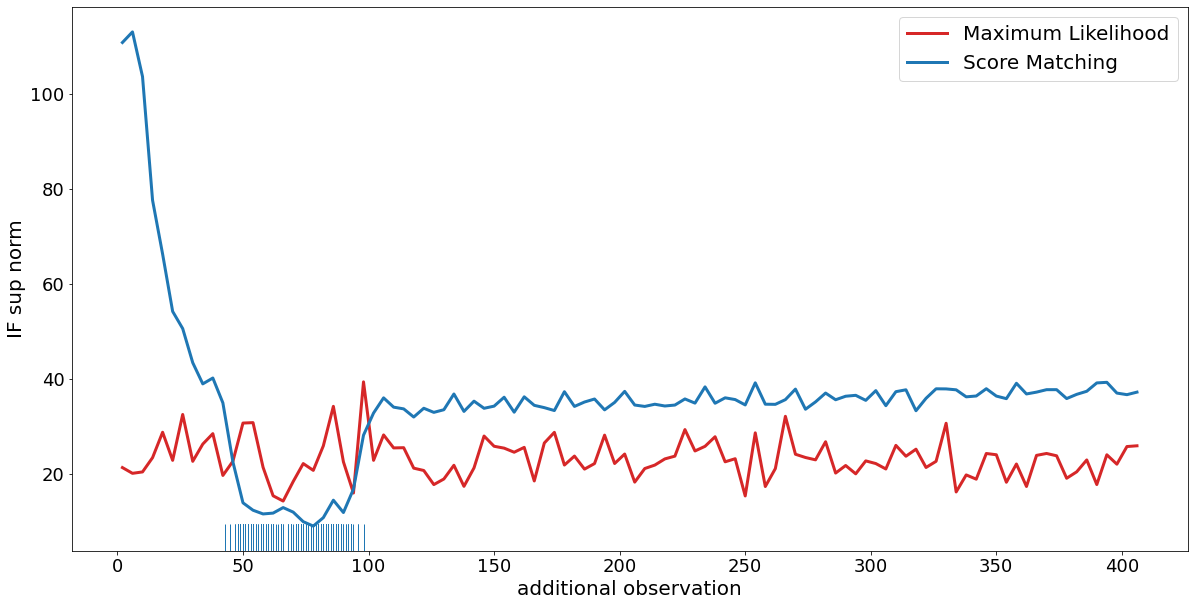

In [27]:
plt.figure(figsize = (20, 10))
plt.plot(avg_IFsupnorm_ML.contam_data, avg_IFsupnorm_ML.IFsupnorm, color = 'tab:red', linewidth = linewidth, label = 'Maximum Likelihood')
plt.plot(avg_IFsupnorm_SM.contam_data, avg_IFsupnorm_SM.SM_IFsupnorm, color = 'tab:blue', linewidth = linewidth, label = 'Score Matching')
plt.legend(fontsize = legend_fontsize)

plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params('both', labelsize = tick_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
plt.savefig('plots/ML-SM-IF-supnorm-avg-directly.pdf')
plt.show()

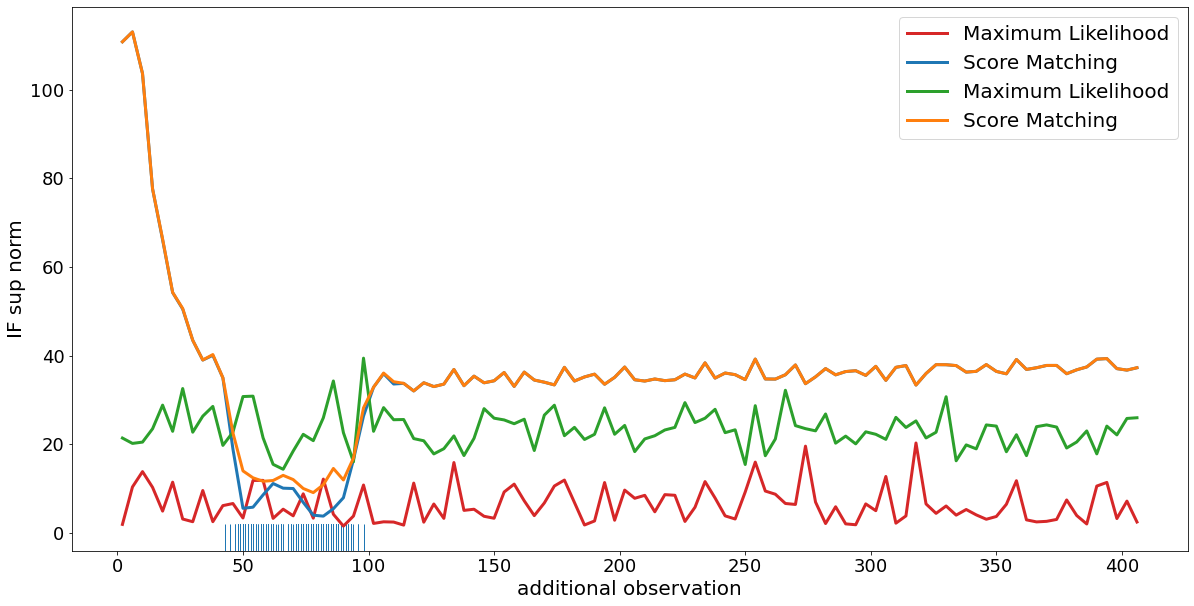

In [37]:
plt.figure(figsize = (20, 10))
plt.plot(avg_IF_ML.contam_data, avg_IF_ML.IFsupnorm, color = 'tab:red', linewidth = linewidth, label = 'Maximum Likelihood')
plt.plot(avg_IF_SM.contam_data, avg_IF_SM.SM_IFsupnorm, color = 'tab:blue', linewidth = linewidth, label = 'Score Matching')
plt.plot(avg_IFsupnorm_ML.contam_data, avg_IFsupnorm_ML.IFsupnorm, color = 'tab:green', linewidth = linewidth, label = 'Maximum Likelihood')
plt.plot(avg_IFsupnorm_SM.contam_data, avg_IFsupnorm_SM.SM_IFsupnorm, color = 'tab:orange', linewidth = linewidth, label = 'Score Matching')


plt.legend(fontsize = legend_fontsize)

plt.xlabel(x_label, fontsize = label_fontsize)
plt.ylabel(y_label, fontsize = label_fontsize)
plt.tick_params('both', labelsize = tick_fontsize)
sns.rugplot(pd.Series(data_waiting.flatten()), color = 'tab:blue')
# plt.savefig('plots/ML-SM-IF-supnorm-avg-logden-first.pdf')
plt.show()

In [38]:
output_pd = avg_IF_SM
output_sub1 = output_pd[(output_pd.contam_data >= 40.) & (output_pd.contam_data <= 100.)]
output_sub2 = output_pd[(output_pd.contam_data < 40.) | (output_pd.contam_data > 100.)]

In [45]:
scipy.stats.ks_2samp(output_sub1.SM_IFsupnorm, output_sub2.SM_IFsupnorm, 'less')

KstestResult(statistic=0.0, pvalue=1.0)

In [43]:
output_sub1.SM_IFsupnorm

10    35.010726
11    18.955843
12     5.586251
13     5.838706
14     8.607757
15    11.176115
16    10.126137
17    10.046107
18     6.918861
19     4.038248
20     3.819296
21     5.489953
22     7.974464
23    16.553982
24    26.387332
Name: SM_IFsupnorm, dtype: float64

In [44]:
output_sub2.SM_IFsupnorm

0      110.790763
1      113.019545
2      103.628901
3       77.624910
4       66.132795
          ...    
97      39.216326
98      39.345060
99      37.082735
100     36.745112
101     37.281737
Name: SM_IFsupnorm, Length: 87, dtype: float64